**1. Load libraries and functions**

In [2]:
#load libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

from scipy.stats import norm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
def drop_non_numerical_rows(dataframe, column_names):
    """
    Drop rows from a dataframe where the specified columns do not contain numerical values.

    Parameters:
    - dataframe: pandas DataFrame
    - column_names: list of str, the names of the columns to check for numerical values

    Returns:
    - pandas DataFrame with non-numerical rows dropped
    """
    for column_name in column_names:
        # Use pandas to_numeric function to convert the column to numeric values
        # and coerce errors to NaN for non-numeric values
        dataframe[column_name] = pd.to_numeric(dataframe[column_name], errors='coerce')

    # Use dropna to remove rows with NaN values in the specified columns
    dataframe.dropna(subset=column_names, inplace=True)

    return dataframe

In [4]:
#creates a heatmap
def heatmap(dataframe, index, columns, values, filter_column, filter_value, colour, interpolation, xlabel, ylabel, colourbarlabel, filepath):
    '''
    Generates a heatmap which shows how a dependent variable changes in relation to two independent variables

    :param dataframe: the pandas dataframe containing the independent variables and dependent variable
    :param index: name of independent variable 1
    :param columns: name of independent variable 2
    :param values: name of dependent variable
    :param filter_column: the column to apply the filter on
    :param filter_value: the value to filter by in the filter_column
    :param colour: colours for the heatmap (e.g., Reds, viridis)
    :param interpolation: method for interpolation (e.g., nearest)
    :param xlabel: name for the x-axis
    :param ylabel: name for the y-axis
    :param colourbarlabel: name for the colourbar
    :param filepath: the path to save the heatmap image
    :return: a heatmap of the two independent variables as the x and y axis and values of dependent variable in the table
    '''
    
    # Apply the filter on the dataframe
    filtered_dataframe = dataframe[dataframe[filter_column] == filter_value]
    
    # Create pivot table
    pivot_table = filtered_dataframe.pivot(index=index, columns=columns, values=values)
    
    # Display data as an image
    plt.imshow(pivot_table, cmap=colour, interpolation=interpolation)

    # Add title
    plt.title(f'{filter_value}', fontsize=18, fontweight="bold")
    
    # Add color bar
    plt.colorbar(label=colourbarlabel)
    
    # Set labels for x and y axis
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Set x and y ticks
    plt.yticks(np.arange(len(pivot_table.index)), pivot_table.index)
    
    # Manually set the position of x-axis labels on the top
    plt.xticks(np.arange(len(pivot_table.columns)), pivot_table.columns)
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().xaxis.set_label_position('top')
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45, ha='left')
    
    # Annotate the heatmap with values
    for i in range(len(pivot_table.index)):
        for j in range(len(pivot_table.columns)):
            value = pivot_table.iloc[i, j]
            plt.text(j, i, '' if np.isnan(value) else round(value, 2), ha='center', va='center', color='black')

    # Save file
    plt.savefig(filepath, bbox_inches='tight')
    
    # Show plot
    plt.show()

In [5]:
def combined_heatmap(dataframe, index, columns, values, filter_column, method1, method2, colour, interpolation, xlabel, ylabel, colourbarlabel, filepath):
    '''
    Generates two heatmaps side by side which show how a dependent variable changes in relation to two independent variables
    for two different methods.

    :param dataframe: the pandas dataframe containing the independent variables and dependent variable
    :param index: name of independent variable 1
    :param columns: name of independent variable 2
    :param values: name of dependent variable
    :param filter_column: the column to apply the filter on
    :param method1: the first method to filter by in the filter_column
    :param method2: the second method to filter by in the filter_column
    :param colour: colours for the heatmap (e.g., Reds, viridis)
    :param interpolation: method for interpolation (e.g., nearest)
    :param xlabel: name for the x-axis
    :param ylabel: name for the y-axis
    :param colourbarlabel: name for the colourbar
    :param filepath: the path to save the heatmap image
    '''
    
    # Apply the filter on the dataframe
    filtered_dataframe1 = dataframe[dataframe[filter_column] == method1]
    filtered_dataframe2 = dataframe[dataframe[filter_column] == method2]
    
    # Create pivot tables
    pivot_table1 = filtered_dataframe1.pivot(index=index, columns=columns, values=values)
    pivot_table2 = filtered_dataframe2.pivot(index=index, columns=columns, values=values)
    
    # Determine the common color scale
    min_value = min(pivot_table1.min().min(), pivot_table2.min().min())
    max_value = max(pivot_table1.max().max(), pivot_table2.max().max())

    # Create the figure and axes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Plot the first heatmap
    cax1 = ax1.imshow(pivot_table1, cmap=colour, interpolation=interpolation, vmin=min_value, vmax=max_value)
    ax1.set_title(f'{method1}', fontsize=20, fontweight="bold")  # Increase title size here
    ax1.set_xlabel(xlabel, fontsize=18)  # Increase x-axis label size here
    ax1.set_ylabel(ylabel, fontsize=18)  # Increase y-axis label size here
    ax1.set_xticks(np.arange(len(pivot_table1.columns)))
    ax1.set_xticklabels(pivot_table1.columns, fontsize=12)  # Increase x-axis tick label size here
    ax1.set_yticks(np.arange(len(pivot_table1.index)))
    ax1.set_yticklabels(pivot_table1.index, fontsize=12)  # Increase y-axis tick label size here
    ax1.xaxis.set_ticks_position('top')
    ax1.xaxis.set_label_position('top')
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='left')

    # Annotate the heatmap with values
    for i in range(len(pivot_table1.index)):
        for j in range(len(pivot_table1.columns)):
            value = pivot_table1.iloc[i, j]
            ax1.text(j, i, '' if np.isnan(value) else round(value, 2), ha='center', va='center', color='black', fontsize=14)  # Increase annotation font size here

    # Plot the second heatmap
    cax2 = ax2.imshow(pivot_table2, cmap=colour, interpolation=interpolation, vmin=min_value, vmax=max_value)
    ax2.set_title(f'{method2}', fontsize=20, fontweight="bold")  # Increase title size here
    ax2.set_xlabel(xlabel, fontsize=18)  # Increase x-axis label size here
    ax2.set_ylabel(ylabel, fontsize=18)  # Increase y-axis label size here
    ax2.set_xticks(np.arange(len(pivot_table2.columns)))
    ax2.set_xticklabels(pivot_table2.columns, fontsize=12)  # Increase x-axis tick label size here
    ax2.set_yticks(np.arange(len(pivot_table2.index)))
    ax2.set_yticklabels(pivot_table2.index, fontsize=12)  # Increase y-axis tick label size here
    ax2.xaxis.set_ticks_position('top')
    ax2.xaxis.set_label_position('top')
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='left')

    # Annotate the heatmap with values
    for i in range(len(pivot_table2.index)):
        for j in range(len(pivot_table2.columns)):
            value = pivot_table2.iloc[i, j]
            ax2.text(j, i, '' if np.isnan(value) else round(value, 2), ha='center', va='center', color='black', fontsize=14)  # Increase annotation font size here

    # Add a colorbar
    cbar = fig.colorbar(cax1, ax=[ax1, ax2], orientation='vertical', fraction=0.02, pad=0.02)
    cbar.set_label(colourbarlabel, fontsize=18)  # Increase colorbar label size here
    cbar.ax.tick_params(labelsize=12)  # Increase colorbar tick label size here

    # Save file
    plt.savefig(filepath, bbox_inches='tight')
    
    # Show plot
    plt.show()

In [6]:
#runs a regression inclusive of VIF (requires drop_column_using_vif function)
def regression_and_VIF(dataframe, todrop, dependent):
    '''
    Runs a regression model and drops dependent variables using VIF function

    :param dataframe: the pandas dataframe containing the independent variable and dependent variables
    :param todrop: list of dependent variables to drop
    :param dependent: name of dependent variable
    :return: a regression model with a summary of results
    '''
    # drop all except independent variables
    variables = dataframe.drop(todrop, axis=1)
    
    # using VIF on the dataset
    variables_VIF = drop_column_using_vif_(variables.drop([dependent], axis=1))
    # note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
    print("The columns remaining after VIF selection are:")
    print(variables_VIF.columns)

    # create regression model
    regressionmodel = sm.OLS(endog=variables[[dependent]], exog=sm.add_constant(variables_VIF)).fit()
    regressionmodel
    
    # generate summary
    summary = regressionmodel.summary()
    print(summary)

    # Plot the regression line along with other diagnostic plots
    fig = plt.figure(figsize=(12, 8))
    
    # Plot fitted values against the actual values
    sn.regplot(x=regressionmodel.fittedvalues, y=variables[dependent], lowess=True, line_kws={'color': 'red'})
    
    # Add labels and title
    plt.xlabel('Fitted Values')
    plt.ylabel('Actual Values')
    plt.title('Fitted Values vs Actual Values')
    
    # Show the plot
    plt.show()

In [7]:
def scatter(dataframe, control, independent, dependent, filter_column, filter_value, xlabel, ylabel, filepath):
    '''
    creates a scatterplot of independent vs. dependent, controlled for one independent variable
    :param dataframe: the pandas dataframe containing the independent variables and dependent variables
    :param control: independent variable to control
    :param independent: name of independent variable
    :param dependent: name of dependent variable
    :param filter_column: the column to apply the filter on
    :param filter_value: the value to filter by in the filter_column
    :param xlabel: label for x-axis
    :param ylabel: label for y-axis
    :param filepath: the path to save the scatter plot image
    :return: None
    '''
    
    #apply the filter on the dataframe
    filtered_dataframe = dataframe[dataframe[filter_column] == filter_value]
    
    #sort the unique values of control in ascending order
    unique_sorted = sorted(filtered_dataframe[control].unique())
    
    #calculate the number of unique values for control
    num_unique = len(unique_sorted)
    
    #set up the figure and axes
    num_columns = num_unique
    fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(5 * num_columns, 5))
    
    #loop through sorted unique values of control
    for i, value in enumerate(unique_sorted):
        #filter data for the current independent variable
        subset_data = filtered_dataframe[filtered_dataframe[control] == value]
        
        #scatterplot for independent vs. dependent
        sn.scatterplot(x=independent, y=dependent, data=subset_data, ax=axes[i])
        
        #set title
        axes[i].set_title(f'{control} = {value}')
        
        #set labels
        axes[i].set_xlabel(xlabel)
        axes[i].set_ylabel(ylabel)
    
    #adjust layout
    plt.tight_layout()

    #save file
    plt.savefig(filepath, bbox_inches='tight')
    
    #show plot
    plt.show()

In [8]:
def boxplot(dataframe, control, independent, dependent, filter_column=None, filter_value=None, xlabel=None, ylabel=None, filepath=None):
    """
    Creates boxplots of independent vs. dependent, controlled for one independent variable,
    on a single figure, and returns a summary of statistics in a DataFrame with one row per boxplot.
    """
    # Filtering
    if filter_column and filter_value:
        dataframe = dataframe[dataframe[filter_column] == filter_value]
    
    unique_sorted = sorted(dataframe[control].unique())
    num_unique = len(unique_sorted)

    # Determine the number of rows and columns dynamically
    num_cols = min(5, num_unique) # Ensure no more than 5 columns
    num_rows = (num_unique + num_cols - 1) // num_cols
    
    # Create subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5 * num_cols, 5 * num_rows))

    # Handle 1D axes array when num_rows is 1
    if num_rows == 1:
        axes = [axes]  # Convert to a list of axes

    summary_df = pd.DataFrame(columns=[control, independent, 'min', '25%', '50%', '75%', 'max', 'mean', 'range', 'IQR'])
    
    plot_index = 0
    for control_value in unique_sorted:
        # Filter by control value
        df_control_value = dataframe[dataframe[control] == control_value]

        # Unique values for independent within control value
        independent_values = df_control_value[independent].unique()
        # Filter the data for the independent values
        data_to_plot = [df_control_value[df_control_value[independent] == val][dependent] for val in independent_values]

        # Determine subplot location
        row_idx = plot_index // num_cols
        col_idx = plot_index % num_cols

        # Boxplot creation 
        bp = axes[row_idx][col_idx].boxplot(data_to_plot, positions=range(len(independent_values)), widths=0.6)  
        
        # Set up axes labels and title
        axes[row_idx][col_idx].set_xticklabels(independent_values)
        axes[row_idx][col_idx].set_title(f'{control} = {control_value}')
        axes[row_idx][col_idx].set_xlabel(xlabel or independent)
        axes[row_idx][col_idx].set_ylabel(ylabel or dependent)

        # Calculate and store summary statistics
        for i, independent_value in enumerate(independent_values):
            subset_data = df_control_value[df_control_value[independent] == independent_value]
            
            if not subset_data.empty:
                summary = subset_data[dependent].describe()
                new_row = pd.DataFrame({
                    control: [control_value],
                    independent: [independent_value],
                    'min': [summary['min']],
                    '25%': [summary['25%']],
                    '50%': [summary['50%']],
                    '75%': [summary['75%']],
                    'max': [summary['max']],
                    'mean': [summary['mean']],    
                    'range': [summary['max'] - summary['min']],
                    'IQR': [summary['75%'] - summary['25%']]  
                })
                summary_df = pd.concat([summary_df, new_row], ignore_index=True)
        
        # Increase plot index
        plot_index += 1        

    # Turn off any unused subplots
    for i in range(plot_index, num_rows * num_cols):
        row_idx = i // num_cols
        col_idx = i % num_cols
        axes[row_idx][col_idx].axis('off')

    # Show the plot
    plt.tight_layout()
    if filepath:
        plt.savefig(filepath, bbox_inches='tight')
    plt.show()
 
    return summary_df

**2. Read in files**

In [10]:
#read in simulation runs
simulation1 = pd.read_csv("Raw Data/SimulationResults_20240718_114501.csv")
simulation2 = pd.read_csv("Raw Data/SimulationResults_20240718_213827.csv")
simulation3 = pd.read_csv("Raw Data/SimulationResults_20240719_071740.csv")
simulation4 = pd.read_csv("Raw Data/SimulationResults_20240719_131541.csv")
simulation5 = pd.read_csv("Raw Data/SimulationResults_20240720_053523.csv")
simulation6 = pd.read_csv("Raw Data/SimulationResults_20240720_163715.csv")

In [11]:
#concatenate the individual simulation results
simulation_results = pd.concat([simulation1, simulation2, simulation3, simulation4, simulation5, simulation6], ignore_index=True)

In [12]:
#drop Encounters as it is the same as UniqueDrones
simulation_results.drop(['SuccessfulNoBottlenecks_Encounters', 'SuccessfulBottlenecks_Encounters', 
                         'UnsuccessfulNoBottlenecks_Encounters', 'UnsuccessfulBottlenecks_Encounters'], axis=1, inplace = True)

In [13]:
#calculate additional metrics (1. AverageUniqueDroneEncounter, 2. AverageAvoidanceManeuvers, 3. PercentageTimeHorizontalProximity, 
#4. PercentageTimeVerticalProximity) for each category of drone

#Category: SuccessfulNoBottlenecks
simulation_results['SuccessfulNoBottlenecks_AverageUniqueDroneEncounter'] = (simulation_results['SuccessfulNoBottlenecks_UniqueDrones'] / 
                                                                             simulation_results['SuccessfulNoBottlenecks_Count'])
simulation_results['SuccessfulNoBottlenecks_AverageAvoidanceManeuvers'] = (simulation_results['SuccessfulNoBottlenecks_AvoidanceManeuvers'] / 
                                                                             simulation_results['SuccessfulNoBottlenecks_Count'])
simulation_results['SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity'] = (simulation_results['SuccessfulNoBottlenecks_FlightTimeHorizontalProximity'] / 
                                                                             simulation_results['SuccessfulNoBottlenecks_FlightTime'] * 100)
simulation_results['SuccessfulNoBottlenecks_PercentageTimeVerticalProximity'] = (simulation_results['SuccessfulNoBottlenecks_FlightTimeVerticalProximity'] / 
                                                                             simulation_results['SuccessfulNoBottlenecks_FlightTimeVertical'] * 100)

#Category: SuccessfulBottlenecks
simulation_results['SuccessfulBottlenecks_AverageUniqueDroneEncounter'] = (simulation_results['SuccessfulBottlenecks_UniqueDrones'] / 
                                                                             simulation_results['SuccessfulBottlenecks_Count'])
simulation_results['SuccessfulBottlenecks_AverageAvoidanceManeuvers'] = (simulation_results['SuccessfulBottlenecks_AvoidanceManeuvers'] / 
                                                                             simulation_results['SuccessfulBottlenecks_Count'])
simulation_results['SuccessfulBottlenecks_PercentageTimeHorizontalProximity'] = (simulation_results['SuccessfulBottlenecks_FlightTimeHorizontalProximity'] / 
                                                                             simulation_results['SuccessfulBottlenecks_FlightTime'] * 100)
simulation_results['SuccessfulBottlenecks_PercentageTimeVerticalProximity'] = (simulation_results['SuccessfulBottlenecks_FlightTimeVerticalProximity'] / 
                                                                             simulation_results['SuccessfulBottlenecks_FlightTimeVertical'] * 100)

#Category: UnsuccessfulNoBottlenecks
simulation_results['UnsuccessfulNoBottlenecks_AverageUniqueDroneEncounter'] = (simulation_results['UnsuccessfulNoBottlenecks_UniqueDrones'] / 
                                                                             simulation_results['UnsuccessfulNoBottlenecks_Count'])
simulation_results['UnsuccessfulNoBottlenecks_AverageAvoidanceManeuvers'] = (simulation_results['UnsuccessfulNoBottlenecks_AvoidanceManeuvers'] / 
                                                                             simulation_results['UnsuccessfulNoBottlenecks_Count'])
simulation_results['UnsuccessfulNoBottlenecks_PercentageTimeHorizontalProximity'] = (simulation_results['UnsuccessfulNoBottlenecks_FlightTimeHorizontalProximity'] / 
                                                                             simulation_results['UnsuccessfulNoBottlenecks_FlightTime'] * 100)
simulation_results['UnsuccessfulNoBottlenecks_PercentageTimeVerticalProximity'] = (simulation_results['UnsuccessfulNoBottlenecks_FlightTimeVerticalProximity'] / 
                                                                             simulation_results['UnsuccessfulNoBottlenecks_FlightTimeVertical'] * 100)

#Category: UnsuccessfulBottlenecks
simulation_results['UnsuccessfulBottlenecks_AverageUniqueDroneEncounter'] = (simulation_results['UnsuccessfulBottlenecks_UniqueDrones'] / 
                                                                             simulation_results['UnsuccessfulBottlenecks_Count'])
simulation_results['UnsuccessfulBottlenecks_AverageAvoidanceManeuvers'] = (simulation_results['UnsuccessfulBottlenecks_AvoidanceManeuvers'] / 
                                                                             simulation_results['UnsuccessfulBottlenecks_Count'])
simulation_results['UnsuccessfulBottlenecks_PercentageTimeHorizontalProximity'] = (simulation_results['UnsuccessfulBottlenecks_FlightTimeHorizontalProximity'] / 
                                                                             simulation_results['UnsuccessfulBottlenecks_FlightTime'] * 100)
simulation_results['UnsuccessfulBottlenecks_PercentageTimeVerticalProximity'] = (simulation_results['UnsuccessfulBottlenecks_FlightTimeVerticalProximity'] / 
                                                                             simulation_results['UnsuccessfulBottlenecks_FlightTimeVertical'] * 100)

In [14]:
#calculate additional metrics (percentage of drones in each category)
simulation_results['SuccessfulNoBottlenecks_Percentage'] = (simulation_results['SuccessfulNoBottlenecks_Count'] / 
                                                                             simulation_results['TotalDrones'] * 100)

simulation_results['SuccessfulBottlenecks_Percentage'] = (simulation_results['SuccessfulBottlenecks_Count'] / 
                                                                             simulation_results['TotalDrones'] * 100)

simulation_results['UnsuccessfulNoBottlenecks_Percentage'] = (simulation_results['UnsuccessfulNoBottlenecks_Count'] / 
                                                                             simulation_results['TotalDrones'] * 100)

simulation_results['UnsuccessfulBottlenecks_Percentage'] = (simulation_results['UnsuccessfulBottlenecks_Count'] / 
                                                                             simulation_results['TotalDrones'] * 100)

In [15]:
simulation_results.to_csv('simulation_results.csv')

In [16]:
simulation_results_avg = simulation_results.groupby(['TotalTrucks','TotalDrones','Method'], as_index=False).mean()

In [17]:
simulation_results_avg.to_csv('simulation_results_avg.csv', index=False)

**3ai. Scatterplot/Boxplot (category of drones = SuccessfulNoBottlenecks, filter = K-Means, control = TotalTrucks, independent = TotalDrones)**

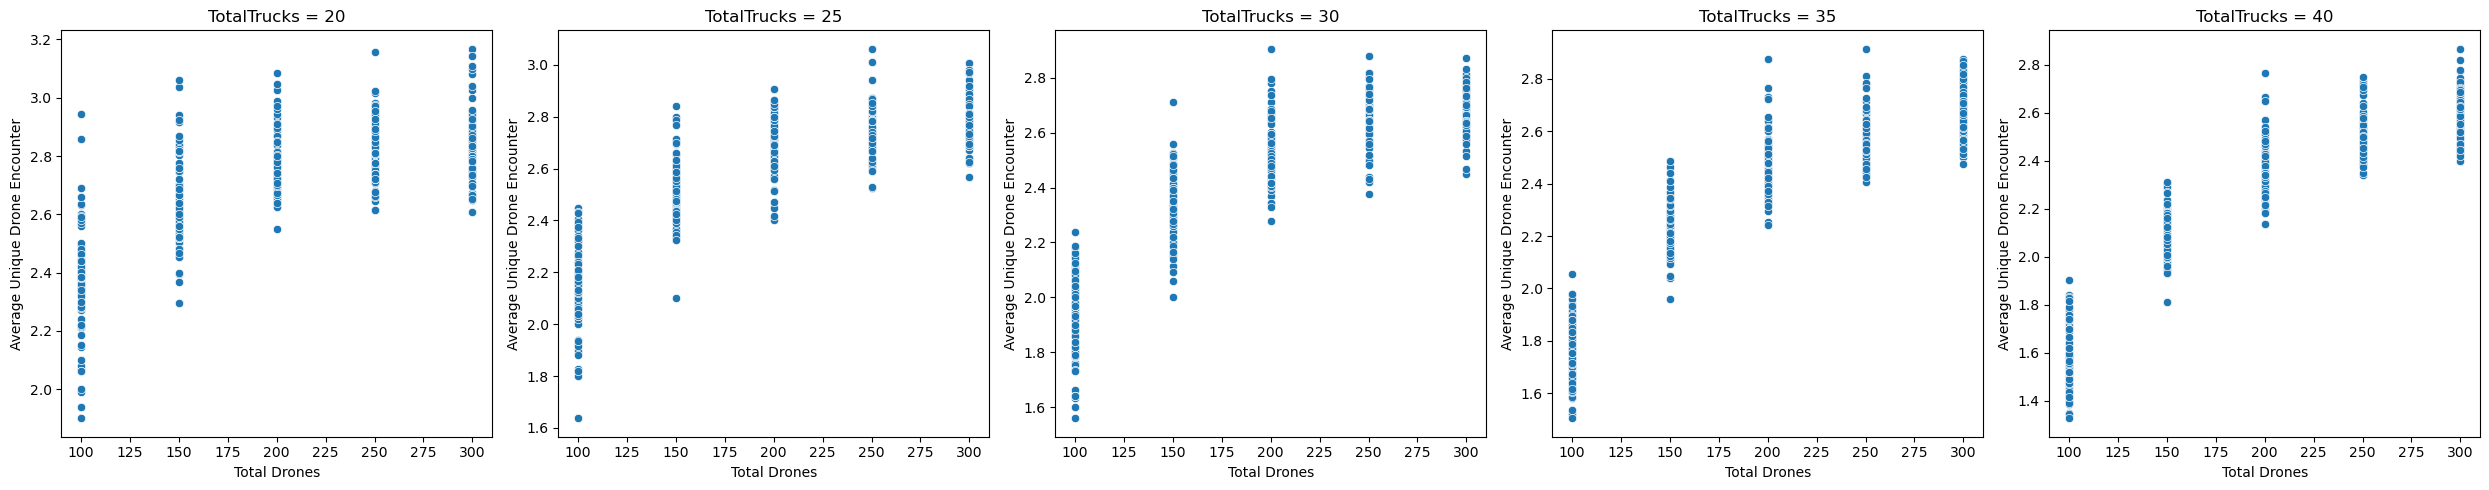

In [19]:
#scatterplot for total drones vs. average unique drone encounter
scatter(simulation_results, 'TotalTrucks', 'TotalDrones', 'SuccessfulNoBottlenecks_AverageUniqueDroneEncounter', 
        'Method', 'KMeans', 'Total Drones', 'Average Unique Drone Encounter', 'Images/KMeans/KScatterDronesUniqueEncounters.png')

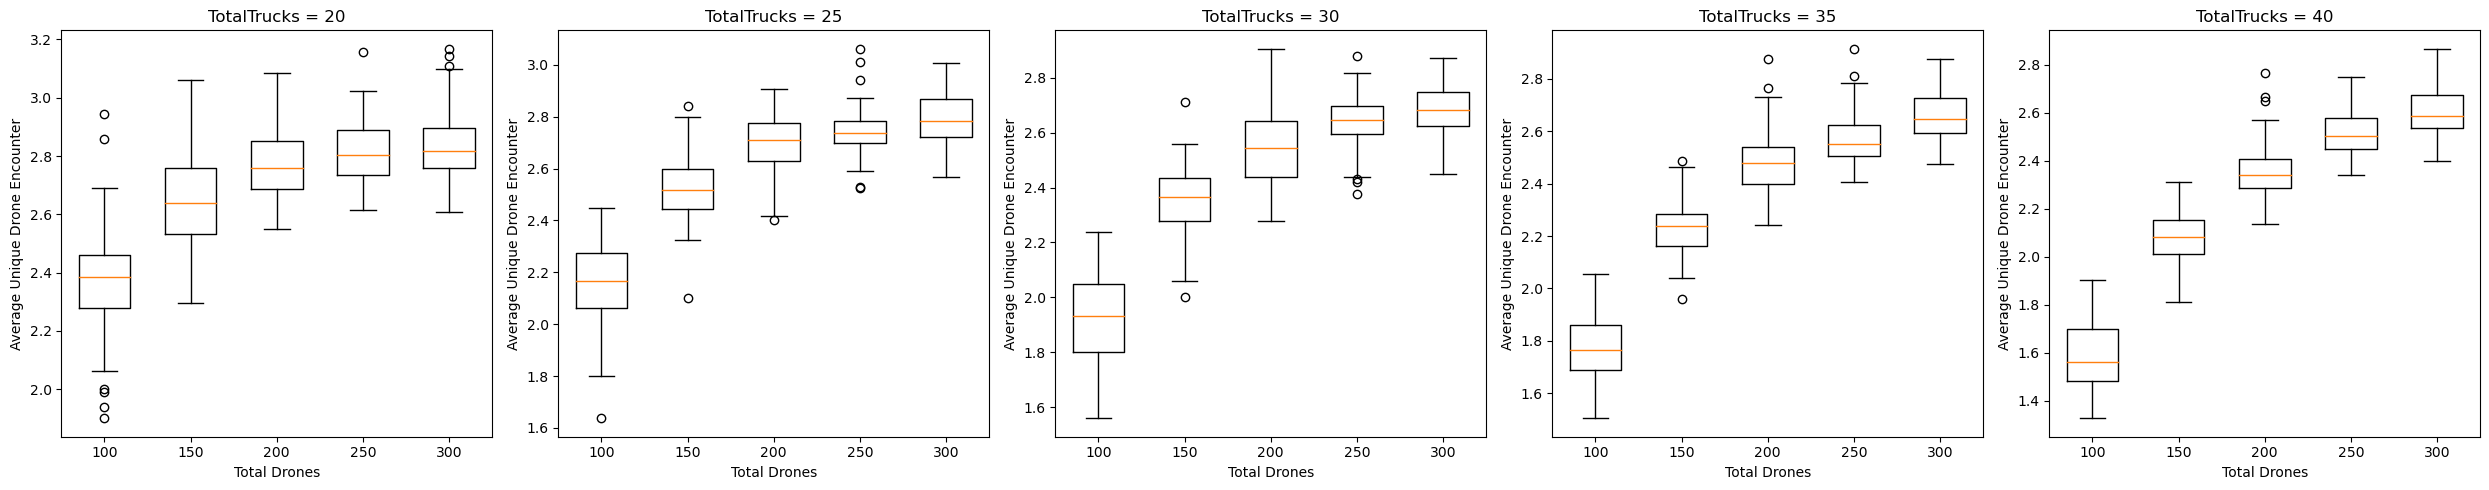

TotalTrucks TotalDrones       min       25%       50%       75%       max  \
0           20         100  1.900000  2.279535  2.383838  2.461183  2.945055   
1           20         150  2.295302  2.531767  2.637584  2.759690  3.060606   
2           20         200  2.550000  2.686530  2.757732  2.850734  3.085427   
3           20         250  2.614458  2.736220  2.802469  2.888220  3.157258   
4           20         300  2.606667  2.758602  2.818493  2.896851  3.167910   
5           25         100  1.637363  2.060612  2.164948  2.273721  2.446809   
6           25         150  2.100671  2.445556  2.517986  2.597824  2.841379   
7           25         200  2.400000  2.628272  2.710000  2.774662  2.907104   
8           25         250  2.524272  2.699268  2.736000  2.785262  3.061983   
9           25         300  2.567376  2.722851  2.783582  2.867497  3.007194   
10          30         100  1.560000  1.801042  1.931818  2.050408  2.236559   
11          30         150  2.000000  2.278889  2.366906  2.435362  2.711409   
12          30         200  2.279793  2.440238  2.543590  2.643473  2.905263   
13          30         250  2.376106  2.593937  2.647059  2.696936  2.878661   
14          30         300  2.448980  2.624781  2.683673  2.748262  2.872852   
15          35         100  1.505051  1.690000  1.765306  1.860108  2.053763   
16          35         150  1.960000  2.160153  2.237762  2.284097  2.484848   
17          35         200  2.241758  2.398461  2.480000  2.541357  2.877005   
18          35         250  2.408000  2.506098  2.550607  2.625253  2.914163   
19          35         300  2.476190  2.592653  2.647482  2.725229  2.875000   
20          40         100  1.326531  1.482055  1.561224  1.697826  1.901099   
21          40         150  1.810811  2.010136  2.080292  2.152896  2.312500   
22          40         200  2.135000  2.285000  2.340659  2.408662  2.763819   
23          40         250  2.340249  2.447429  2.504098  2.577362  2.748918   
24          40         300  2.397260  2.534457  2.587189  2.674288  2.866438   

        mean     range       IQR  
0   2.368959  1.045055  0.181648  
1   2.650555  0.765304  0.227923  
2   2.775375  0.535427  0.164204  
3   2.814899  0.542800  0.152000  
4   2.833627  0.561244  0.138249  
5   2.152871  0.809446  0.213109  
6   2.528978  0.740708  0.152268  
7   2.697638  0.507104  0.146389  
8   2.743094  0.537712  0.085995  
9   2.790685  0.439818  0.144646  
10  1.924585  0.676559  0.249366  
11  2.349875  0.711409  0.156473  
12  2.545008  0.625470  0.203235  
13  2.645416  0.502555  0.102999  
14  2.683049  0.423873  0.123481  
15  1.768048  0.548713  0.170108  
16  2.231097  0.524848  0.123945  
17  2.479201  0.635247  0.142895  
18  2.572129  0.506163  0.119155  
19  2.661418  0.398810  0.132576  
20  1.581246  0.574568  0.215771  
21  2.085954  0.501689  0.142760  
22  2.357566  0.628819  0.123662  
23  2.515144  0.408669  0.129933  
24  2.598822  0.469178  0.139831

In [20]:
#boxplot for total drones vs. average unique drone encounter
boxplot(dataframe=simulation_results, control='TotalTrucks', independent='TotalDrones', dependent='SuccessfulNoBottlenecks_AverageUniqueDroneEncounter', 
                           filter_column='Method', filter_value='KMeans', xlabel='Total Drones', ylabel='Average Unique Drone Encounter', filepath='Images/KMeans/KBoxDronesUniqueEncounters')

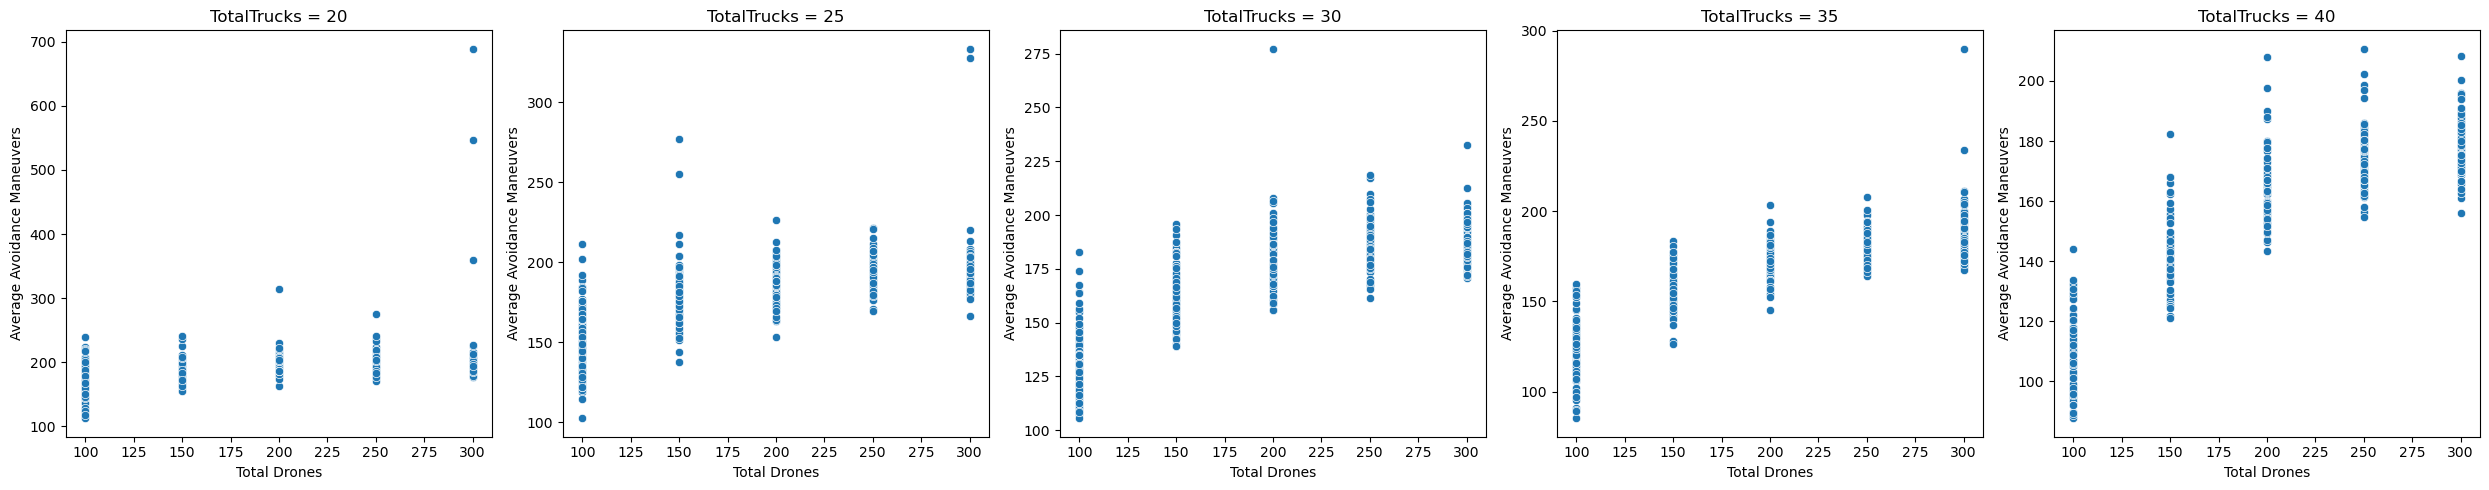

In [21]:
#scatterplot for total drones vs. average avoidance maneuvers
scatter(simulation_results, 'TotalTrucks', 'TotalDrones', 'SuccessfulNoBottlenecks_AverageAvoidanceManeuvers', 
        'Method', 'KMeans', 'Total Drones', 'Average Avoidance Maneuvers', 'Images/KMeans/KScatterDronesAvoidance.png')

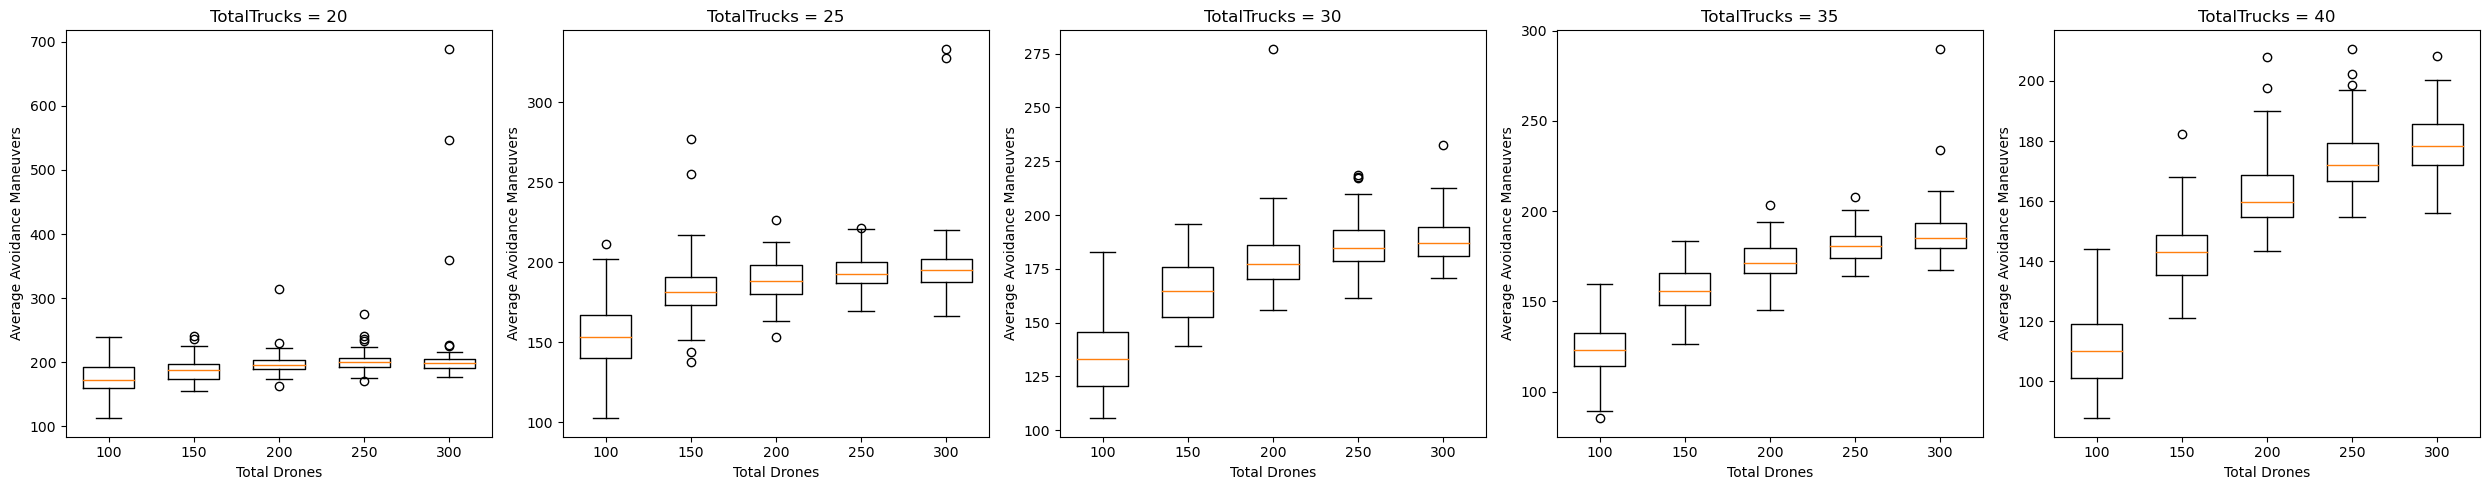

TotalTrucks TotalDrones         min         25%         50%         75%  \
0           20         100  112.617978  159.262626  171.686869  192.151111   
1           20         150  155.727273  174.604646  187.171233  197.721049   
2           20         200  163.105000  188.902500  196.252525  203.747634   
3           20         250  171.460000  192.269706  200.032000  206.057703   
4           20         300  176.556667  191.555167  198.336700  204.895931   
5           25         100  102.622222  140.226429  153.510638  166.975166   
6           25         150  137.872340  173.240256  181.605634  190.800620   
7           25         200  153.185000  180.306443  188.619289  198.189605   
8           25         250  169.934272  186.942219  192.820000  200.552167   
9           25         300  166.791506  187.943064  195.106897  202.180339   
10          30         100  105.577320  120.430000  133.020000  145.485258   
11          30         150  139.084507  152.748639  164.686131  175.802381   
12          30         200  155.934673  170.129156  177.378531  186.141361   
13          30         250  161.308000  178.486013  184.544000  193.213817   
14          30         300  170.922807  180.894080  187.127090  194.570417   
15          35         100   85.247423  114.035000  123.280000  132.606064   
16          35         150  126.340000  148.155781  155.698630  165.462515   
17          35         200  145.126374  165.670722  171.335052  179.525306   
18          35         250  163.852000  173.871017  180.545064  186.402741   
19          35         300  167.604096  179.364168  184.877698  193.203276   
20          40         100   87.750000  101.254691  110.250000  119.034536   
21          40         150  120.986577  135.564047  143.104895  148.606970   
22          40         200  143.473404  154.707623  159.753846  168.854495   
23          40         250  154.846809  166.841114  172.089431  179.304243   
24          40         300  156.103333  172.126467  178.236667  185.643101   

           max        mean       range        IQR  
0   240.160000  173.533992  127.542022  32.888485  
1   240.666667  187.564755   84.939394  23.116403  
2   313.650888  198.159797  150.545888  14.845134  
3   275.323651  200.729752  103.863651  13.787997  
4   689.039855  211.660805  512.483188  13.340763  
5   211.850000  153.270624  109.227778  26.748737  
6   276.967213  181.699927  139.094873  17.560364  
7   226.485000  188.670398   73.300000  17.883162  
8   221.638655  193.646682   51.704383  13.609949  
9   333.559701  197.765538  166.768196  14.237275  
10  183.021739  134.009428   77.444420  25.055258  
11  195.800000  164.786354   56.715493  23.053741  
12  277.237838  179.777943  121.303164  16.012205  
13  218.692946  185.814897   57.384946  14.727804  
14  232.318182  188.077651   61.395375  13.676337  
15  159.478723  122.916465   74.231301  18.571064  
16  183.335664  156.825296   56.995664  17.306735  
17  203.603175  172.123164   58.476801  13.854583  
18  208.023256  180.911613   44.171256  12.531724  
19  289.937500  188.054001  122.333404  13.839107  
20  144.200000  110.718341   56.450000  17.779845  
21  182.496183  143.117996   61.509606  13.042923  
22  207.839196  163.408764   64.365792  14.146872  
23  210.688889  173.767418   55.842080  12.463128  
24  208.164384  179.193815   52.061050  13.516634

In [22]:
#boxplot for total drones vs. average avoidance maneuvers
boxplot(dataframe=simulation_results, control='TotalTrucks', independent='TotalDrones', dependent='SuccessfulNoBottlenecks_AverageAvoidanceManeuvers', 
                           filter_column='Method', filter_value='KMeans', xlabel='Total Drones', ylabel='Average Avoidance Maneuvers', filepath='Images/KMeans/KBoxDronesAvoidance')

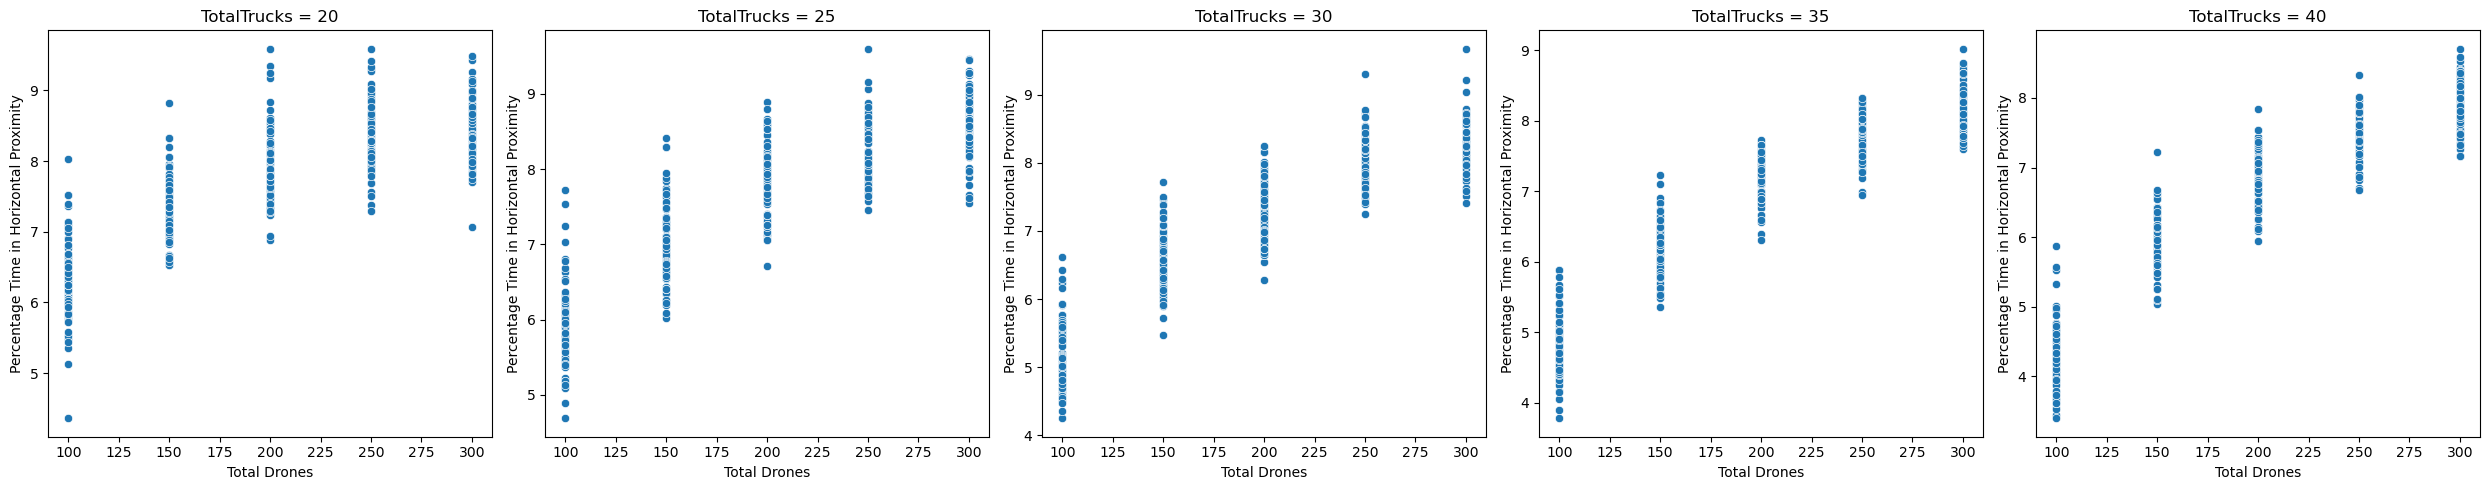

In [23]:
#scatterplot for total drones vs. percentage time horizontal proximity
scatter(simulation_results, 'TotalTrucks', 'TotalDrones', 'SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity', 
        'Method', 'KMeans', 'Total Drones', 'Percentage Time in Horizontal Proximity', 'Images/KMeans/KScatterDronesHorizontalProximity.png')

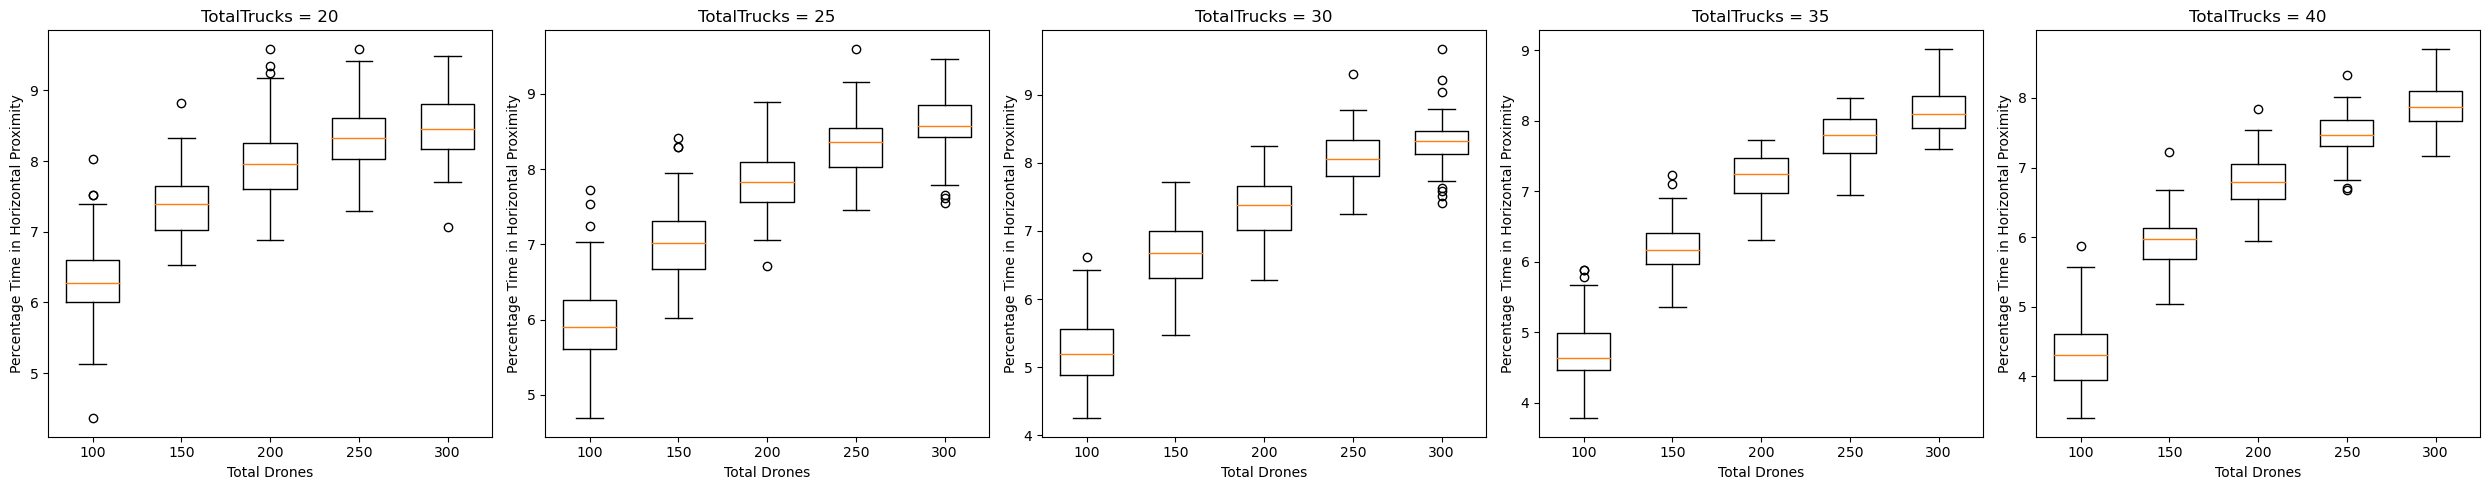

TotalTrucks TotalDrones       min       25%       50%       75%       max  \
0           20         100  4.361510  6.000895  6.280666  6.600681  8.029520   
1           20         150  6.529195  7.019962  7.391525  7.646020  8.829950   
2           20         200  6.891170  7.608143  7.963883  8.253869  9.589963   
3           20         250  7.291591  8.031784  8.331995  8.617336  9.587802   
4           20         300  7.073550  8.171777  8.455474  8.807184  9.489905   
5           25         100  4.690684  5.615085  5.897303  6.266203  7.720862   
6           25         150  6.024394  6.670137  7.013209  7.314627  8.415584   
7           25         200  6.713630  7.560550  7.823836  8.095149  8.893597   
8           25         250  7.462902  8.027669  8.365767  8.543826  9.600502   
9           25         300  7.550689  8.424332  8.580841  8.856953  9.469134   
10          30         100  4.250487  4.887307  5.195988  5.563739  6.621385   
11          30         150  5.478605  6.305138  6.679068  6.991023  7.723013   
12          30         200  6.285068  7.005372  7.372617  7.657095  8.240408   
13          30         250  7.249628  7.809703  8.058294  8.335495  9.297282   
14          30         300  7.405273  8.123889  8.319263  8.458536  9.671053   
15          35         100  3.781031  4.462768  4.639782  4.989269  5.882981   
16          35         150  5.358926  5.964485  6.171633  6.406631  7.236844   
17          35         200  6.304087  6.980010  7.239221  7.472385  7.718994   
18          35         250  6.945042  7.547637  7.792355  8.023210  8.314935   
19          35         300  7.601614  7.896424  8.101361  8.354863  9.018945   
20          40         100  3.399520  3.954560  4.310761  4.611203  5.872404   
21          40         150  5.039496  5.681925  5.972586  6.137948  7.219019   
22          40         200  5.942588  6.543922  6.798107  7.046122  7.834959   
23          40         250  6.673343  7.305530  7.467731  7.683326  8.326937   
24          40         300  7.160732  7.666092  7.875202  8.102608  8.705835   

        mean     range       IQR  
0   6.320746  3.668009  0.599786  
1   7.372752  2.300755  0.626058  
2   7.975975  2.698794  0.645726  
3   8.367560  2.296211  0.585552  
4   8.490932  2.416355  0.635407  
5   5.947090  3.030178  0.651118  
6   7.022724  2.391190  0.644491  
7   7.832474  2.179968  0.534599  
8   8.308652  2.137600  0.516157  
9   8.596178  1.918445  0.432621  
10  5.249197  2.370899  0.676432  
11  6.651804  2.244408  0.685884  
12  7.344454  1.955340  0.651723  
13  8.072485  2.047654  0.525792  
14  8.314824  2.265780  0.334647  
15  4.746792  2.101950  0.526500  
16  6.189327  1.877917  0.442146  
17  7.198362  1.414907  0.492375  
18  7.773963  1.369893  0.475573  
19  8.144244  1.417331  0.458438  
20  4.336666  2.472884  0.656643  
21  5.929605  2.179523  0.456023  
22  6.825923  1.892371  0.502200  
23  7.454943  1.653594  0.377796  
24  7.885748  1.545103  0.436516

In [24]:
#boxplot for total drones vs. percentage time horizontal proximity
boxplot(dataframe=simulation_results, control='TotalTrucks', independent='TotalDrones', dependent='SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity', 
                           filter_column='Method', filter_value='KMeans', xlabel='Total Drones', ylabel='Percentage Time in Horizontal Proximity', filepath='Images/KMeans/KBoxDronesHorizontalProximity')

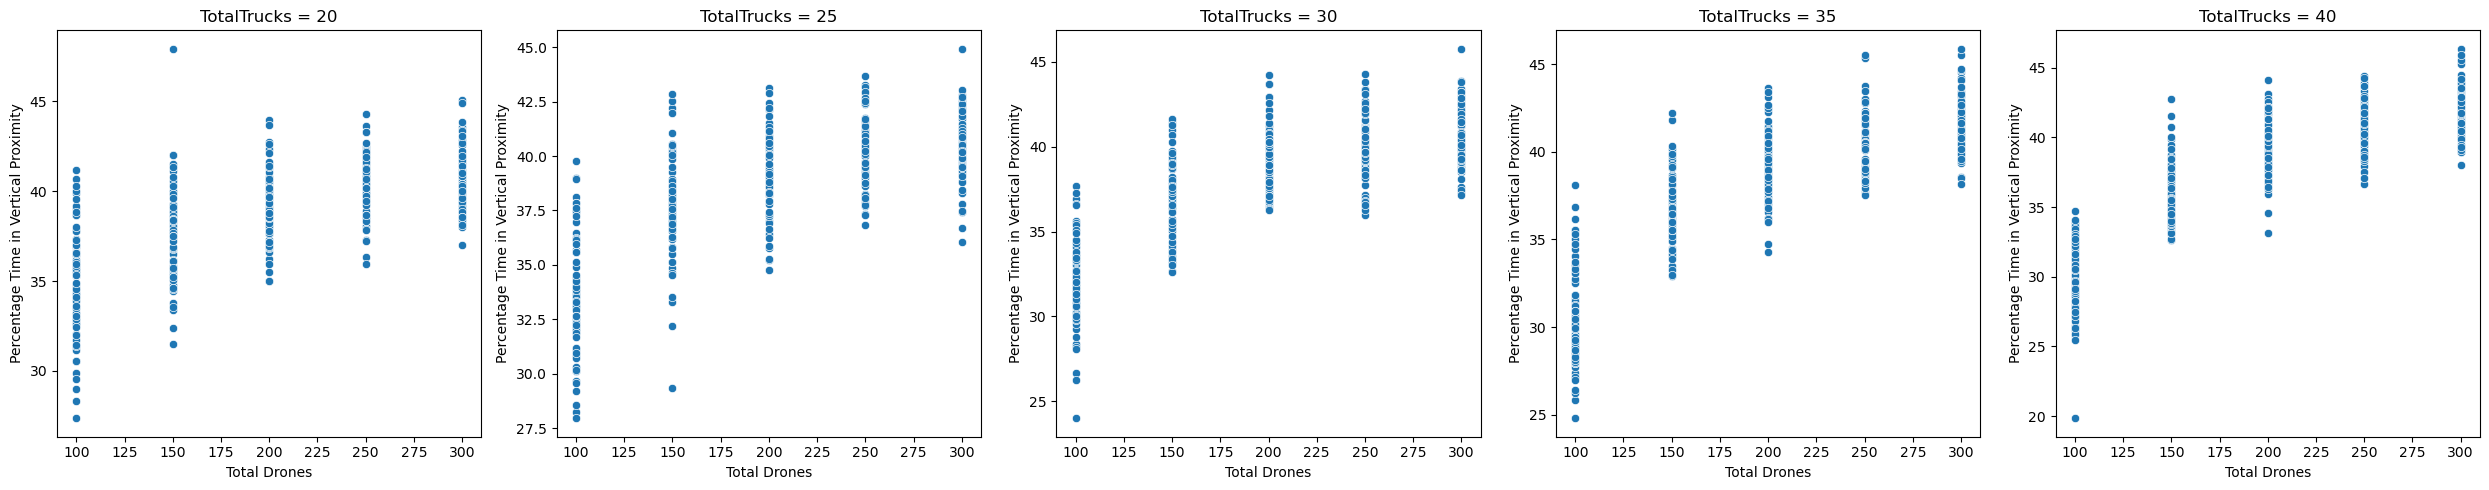

In [25]:
#scatterplot for total drones vs. percentage time vertial proximity
scatter(simulation_results, 'TotalTrucks', 'TotalDrones', 'SuccessfulNoBottlenecks_PercentageTimeVerticalProximity', 
        'Method', 'KMeans', 'Total Drones', 'Percentage Time in Vertical Proximity', 'Images/KMeans/KScatterDronesVerticalProximity.png')

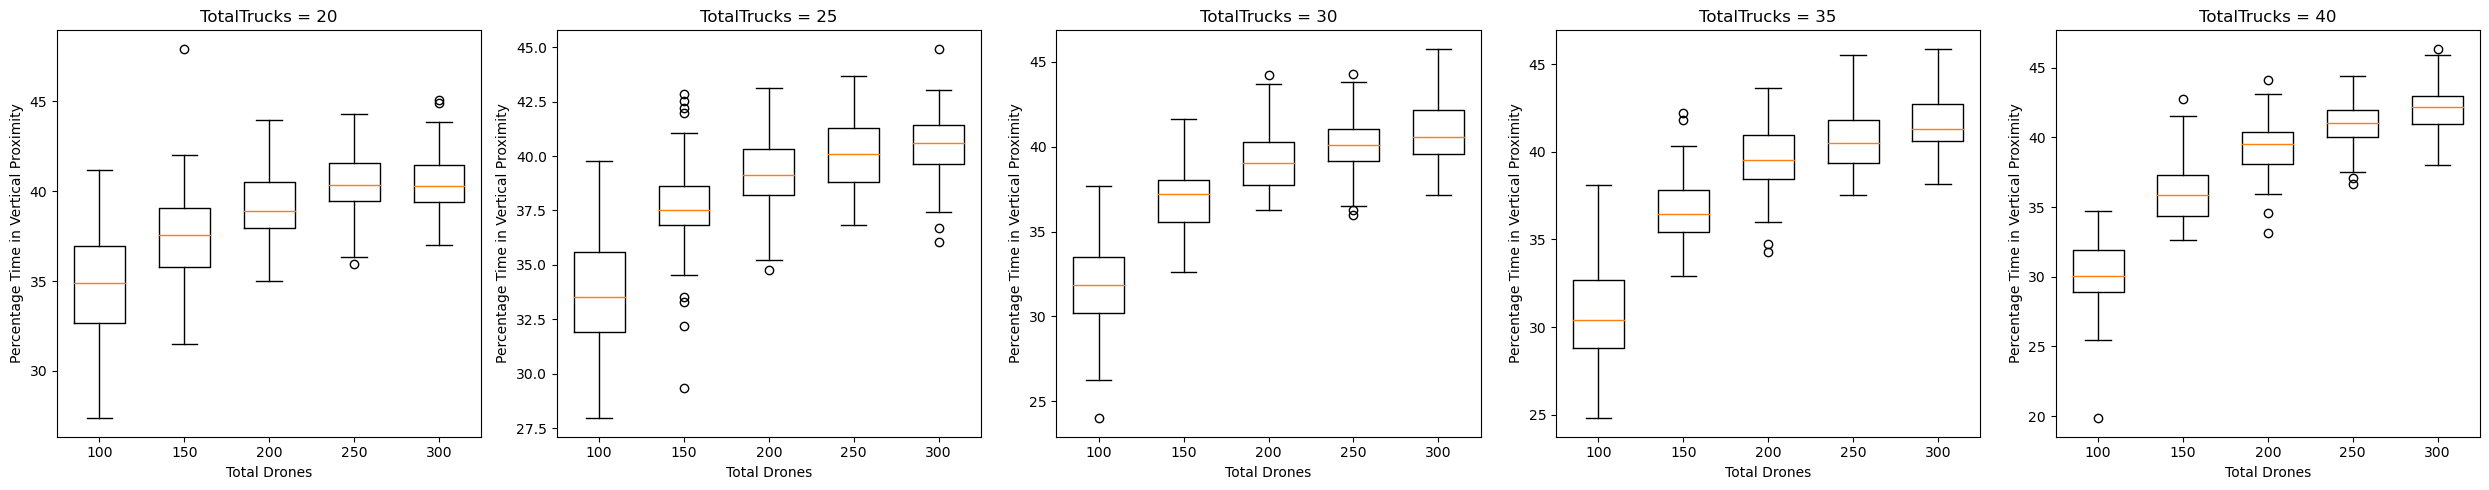

TotalTrucks TotalDrones        min        25%        50%        75%  \
0           20         100  27.360942  32.650124  34.889741  36.974483   
1           20         150  31.493299  35.766723  37.563498  39.047082   
2           20         200  34.974111  37.974032  38.880260  40.503225   
3           20         250  35.929251  39.452080  40.359086  41.556706   
4           20         300  37.003446  39.415322  40.298562  41.463912   
5           25         100  27.954845  31.916282  33.521305  35.578847   
6           25         150  29.342413  36.838702  37.530652  38.644621   
7           25         200  34.768635  38.228795  39.114415  40.327567   
8           25         250  36.850466  38.807872  40.085620  41.285687   
9           25         300  36.043114  39.650174  40.608390  41.432153   
10          30         100  23.993641  30.222140  31.842688  33.481663   
11          30         150  32.593964  35.573744  37.195268  38.018437   
12          30         200  36.271455  37.769416  39.026148  40.277081   
13          30         250  35.971267  39.173482  40.124847  41.050558   
14          30         300  37.143144  39.579463  40.564144  42.173058   
15          35         100  24.795326  28.790171  30.407225  32.708593   
16          35         150  32.911091  35.446416  36.444362  37.819417   
17          35         200  34.300445  38.469508  39.535356  40.940430   
18          35         250  37.548755  39.350626  40.483873  41.840516   
19          35         300  38.149424  40.650101  41.313492  42.751995   
20          40         100  19.844409  28.908794  30.031295  31.911387   
21          40         150  32.672726  34.378786  35.873979  37.293860   
22          40         200  33.161979  38.117273  39.507800  40.400754   
23          40         250  36.644729  40.056475  41.009240  41.963182   
24          40         300  37.992849  40.987884  42.199903  43.010410   

          max       mean      range       IQR  
0   41.202037  34.903772  13.841096  4.324359  
1   47.924572  37.598471  16.431273  3.280359  
2   43.940604  39.155370   8.966493  2.529192  
3   44.292161  40.359513   8.362910  2.104626  
4   45.055179  40.506609   8.051733  2.048590  
5   39.755554  33.549581  11.800709  3.662564  
6   42.845898  37.704808  13.503485  1.805919  
7   43.143136  39.120663   8.374501  2.098771  
8   43.680536  40.104776   6.830070  2.477815  
9   44.928944  40.533375   8.885830  1.781979  
10  37.663734  31.958843  13.670093  3.259523  
11  41.637097  36.996640   9.043133  2.444692  
12  44.245533  39.210242   7.974078  2.507664  
13  44.260360  39.995332   8.289093  1.877076  
14  45.773997  40.763141   8.630854  2.593595  
15  38.136291  30.781380  13.340965  3.918422  
16  42.245675  36.720550   9.334585  2.373001  
17  43.624555  39.537362   9.324109  2.470923  
18  45.535033  40.643670   7.986279  2.489890  
19  45.886265  41.696562   7.736841  2.101895  
20  34.745761  30.071417  14.901352  3.002593  
21  42.755263  36.081461  10.082537  2.915075  
22  44.154142  39.329012  10.992164  2.283481  
23  44.380296  40.966938   7.735567  1.906707  
24  46.363177  42.077085   8.370329  2.022526

In [26]:
#boxplot for total drones vs. percentage time vertical proximity
boxplot(dataframe=simulation_results, control='TotalTrucks', independent='TotalDrones', dependent='SuccessfulNoBottlenecks_PercentageTimeVerticalProximity', 
                           filter_column='Method', filter_value='KMeans', xlabel='Total Drones', ylabel='Percentage Time in Vertical Proximity', filepath='Images/KMeans/KBoxDronesVerticalProximity')

**3aii. Scatterplot (category of drones = SuccessfulBottlenecks, filter = K-Means, control = TotalDrones, independent = TotalTrucks)**

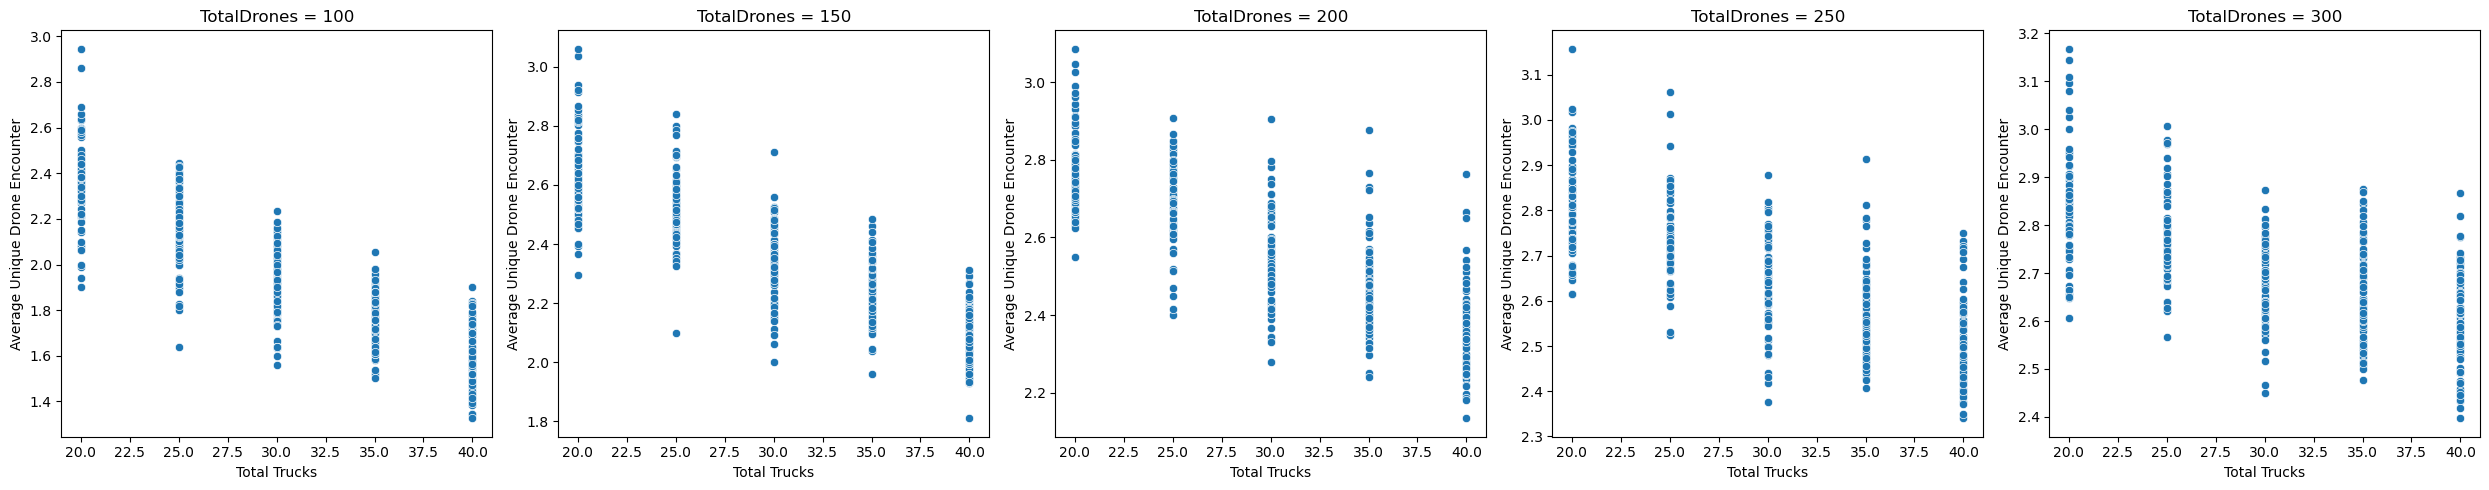

In [28]:
#scatterplot for total trucks vs. average unique drone encounter
scatter(simulation_results, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_AverageUniqueDroneEncounter', 
        'Method', 'KMeans', 'Total Trucks', 'Average Unique Drone Encounter', 'Images/KMeans/KScatterTrucksUniqueEncounters.png')

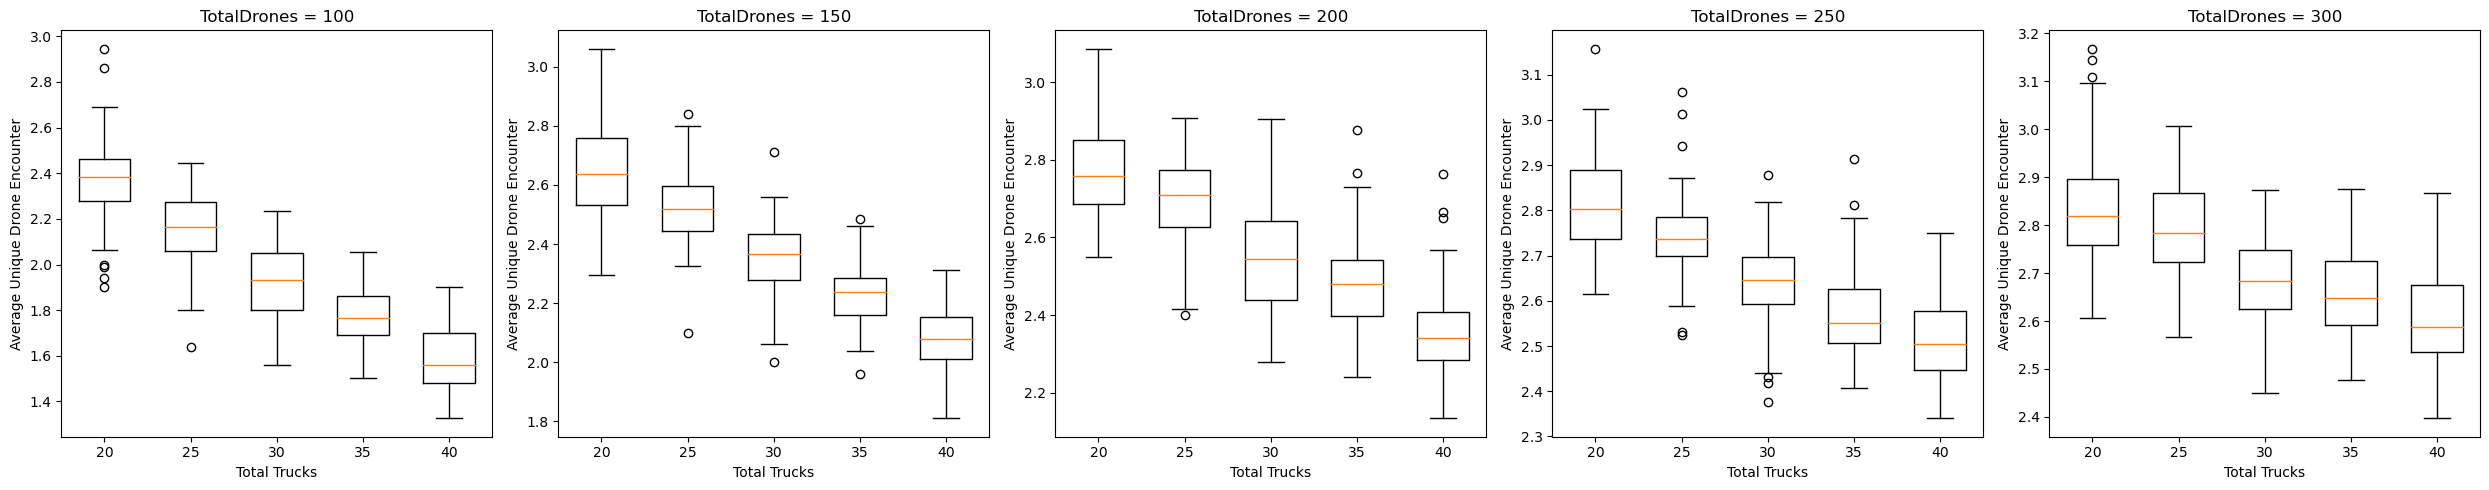

TotalDrones TotalTrucks       min       25%       50%       75%       max  \
0          100          20  1.900000  2.279535  2.383838  2.461183  2.945055   
1          100          25  1.637363  2.060612  2.164948  2.273721  2.446809   
2          100          30  1.560000  1.801042  1.931818  2.050408  2.236559   
3          100          35  1.505051  1.690000  1.765306  1.860108  2.053763   
4          100          40  1.326531  1.482055  1.561224  1.697826  1.901099   
5          150          20  2.295302  2.531767  2.637584  2.759690  3.060606   
6          150          25  2.100671  2.445556  2.517986  2.597824  2.841379   
7          150          30  2.000000  2.278889  2.366906  2.435362  2.711409   
8          150          35  1.960000  2.160153  2.237762  2.284097  2.484848   
9          150          40  1.810811  2.010136  2.080292  2.152896  2.312500   
10         200          20  2.550000  2.686530  2.757732  2.850734  3.085427   
11         200          25  2.400000  2.628272  2.710000  2.774662  2.907104   
12         200          30  2.279793  2.440238  2.543590  2.643473  2.905263   
13         200          35  2.241758  2.398461  2.480000  2.541357  2.877005   
14         200          40  2.135000  2.285000  2.340659  2.408662  2.763819   
15         250          20  2.614458  2.736220  2.802469  2.888220  3.157258   
16         250          25  2.524272  2.699268  2.736000  2.785262  3.061983   
17         250          30  2.376106  2.593937  2.647059  2.696936  2.878661   
18         250          35  2.408000  2.506098  2.550607  2.625253  2.914163   
19         250          40  2.340249  2.447429  2.504098  2.577362  2.748918   
20         300          20  2.606667  2.758602  2.818493  2.896851  3.167910   
21         300          25  2.567376  2.722851  2.783582  2.867497  3.007194   
22         300          30  2.448980  2.624781  2.683673  2.748262  2.872852   
23         300          35  2.476190  2.592653  2.647482  2.725229  2.875000   
24         300          40  2.397260  2.534457  2.587189  2.674288  2.866438   

        mean     range       IQR  
0   2.368959  1.045055  0.181648  
1   2.152871  0.809446  0.213109  
2   1.924585  0.676559  0.249366  
3   1.768048  0.548713  0.170108  
4   1.581246  0.574568  0.215771  
5   2.650555  0.765304  0.227923  
6   2.528978  0.740708  0.152268  
7   2.349875  0.711409  0.156473  
8   2.231097  0.524848  0.123945  
9   2.085954  0.501689  0.142760  
10  2.775375  0.535427  0.164204  
11  2.697638  0.507104  0.146389  
12  2.545008  0.625470  0.203235  
13  2.479201  0.635247  0.142895  
14  2.357566  0.628819  0.123662  
15  2.814899  0.542800  0.152000  
16  2.743094  0.537712  0.085995  
17  2.645416  0.502555  0.102999  
18  2.572129  0.506163  0.119155  
19  2.515144  0.408669  0.129933  
20  2.833627  0.561244  0.138249  
21  2.790685  0.439818  0.144646  
22  2.683049  0.423873  0.123481  
23  2.661418  0.398810  0.132576  
24  2.598822  0.469178  0.139831

In [29]:
#boxplot for total drones vs. average unique drone encounter
boxplot(dataframe=simulation_results, control='TotalDrones', independent='TotalTrucks', dependent='SuccessfulNoBottlenecks_AverageUniqueDroneEncounter', 
                           filter_column='Method', filter_value='KMeans', xlabel='Total Trucks', ylabel='Average Unique Drone Encounter', filepath='Images/KMeans/KBoxTrucksUniqueEncounters')

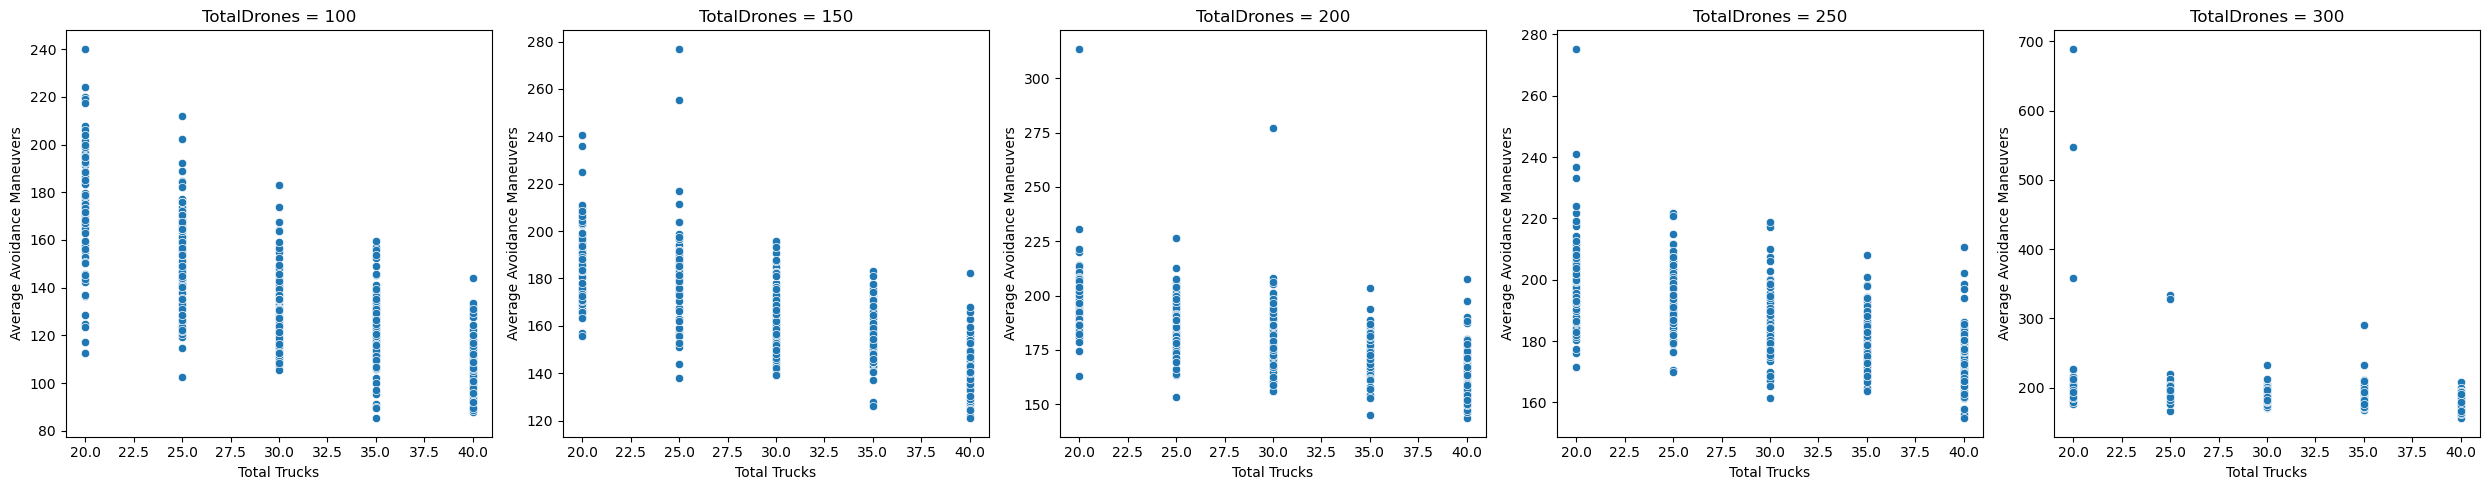

In [30]:
#scatterplot for total trucks vs. average avoidance maneuvers
scatter(simulation_results, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_AverageAvoidanceManeuvers', 
        'Method', 'KMeans', 'Total Trucks', 'Average Avoidance Maneuvers', 'Images/KMeans/KScatterTrucksAvoidance.png')

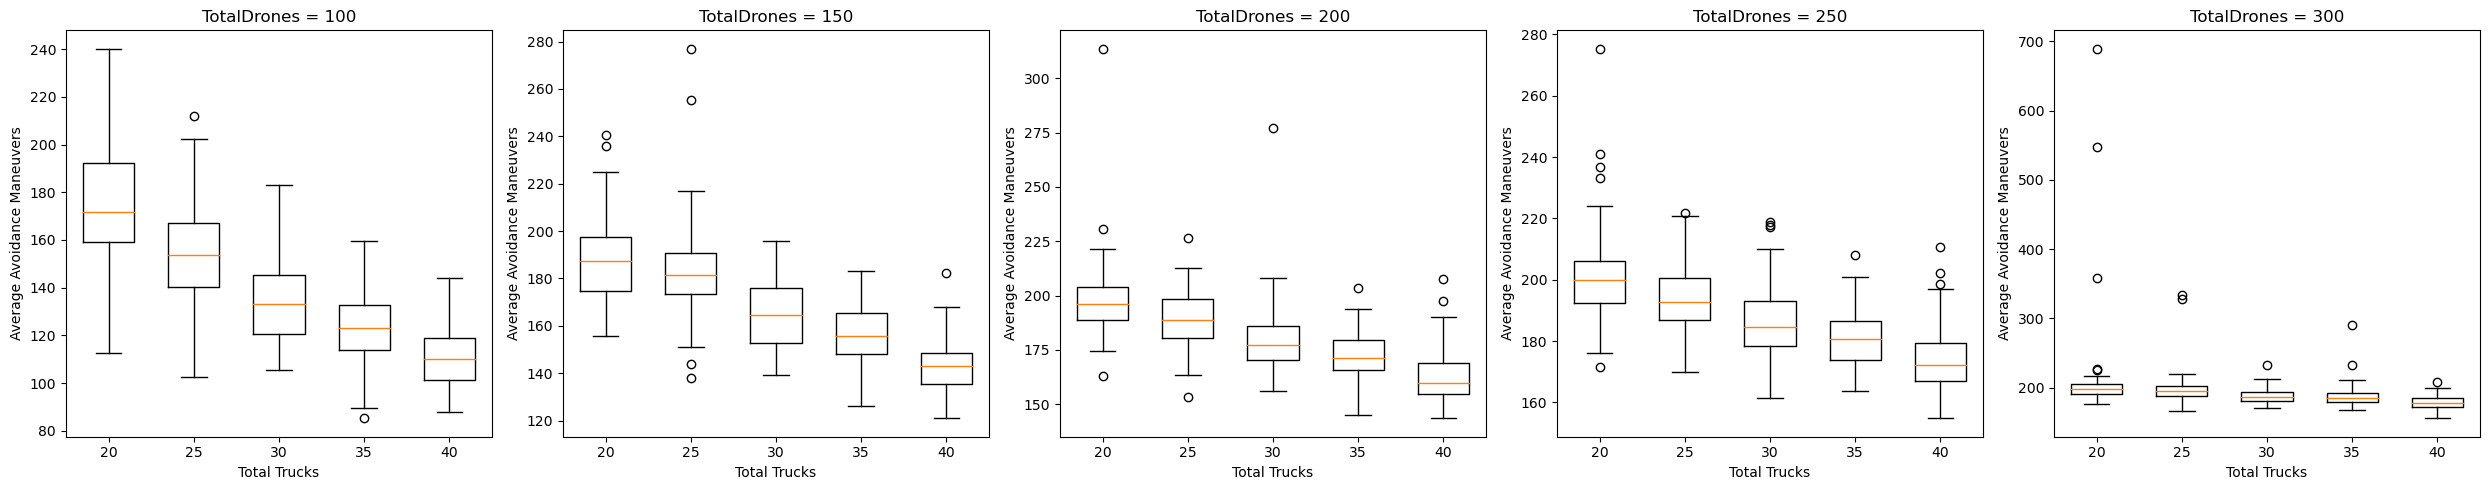

TotalDrones TotalTrucks         min         25%         50%         75%  \
0          100          20  112.617978  159.262626  171.686869  192.151111   
1          100          25  102.622222  140.226429  153.510638  166.975166   
2          100          30  105.577320  120.430000  133.020000  145.485258   
3          100          35   85.247423  114.035000  123.280000  132.606064   
4          100          40   87.750000  101.254691  110.250000  119.034536   
5          150          20  155.727273  174.604646  187.171233  197.721049   
6          150          25  137.872340  173.240256  181.605634  190.800620   
7          150          30  139.084507  152.748639  164.686131  175.802381   
8          150          35  126.340000  148.155781  155.698630  165.462515   
9          150          40  120.986577  135.564047  143.104895  148.606970   
10         200          20  163.105000  188.902500  196.252525  203.747634   
11         200          25  153.185000  180.306443  188.619289  198.189605   
12         200          30  155.934673  170.129156  177.378531  186.141361   
13         200          35  145.126374  165.670722  171.335052  179.525306   
14         200          40  143.473404  154.707623  159.753846  168.854495   
15         250          20  171.460000  192.269706  200.032000  206.057703   
16         250          25  169.934272  186.942219  192.820000  200.552167   
17         250          30  161.308000  178.486013  184.544000  193.213817   
18         250          35  163.852000  173.871017  180.545064  186.402741   
19         250          40  154.846809  166.841114  172.089431  179.304243   
20         300          20  176.556667  191.555167  198.336700  204.895931   
21         300          25  166.791506  187.943064  195.106897  202.180339   
22         300          30  170.922807  180.894080  187.127090  194.570417   
23         300          35  167.604096  179.364168  184.877698  193.203276   
24         300          40  156.103333  172.126467  178.236667  185.643101   

           max        mean       range        IQR  
0   240.160000  173.533992  127.542022  32.888485  
1   211.850000  153.270624  109.227778  26.748737  
2   183.021739  134.009428   77.444420  25.055258  
3   159.478723  122.916465   74.231301  18.571064  
4   144.200000  110.718341   56.450000  17.779845  
5   240.666667  187.564755   84.939394  23.116403  
6   276.967213  181.699927  139.094873  17.560364  
7   195.800000  164.786354   56.715493  23.053741  
8   183.335664  156.825296   56.995664  17.306735  
9   182.496183  143.117996   61.509606  13.042923  
10  313.650888  198.159797  150.545888  14.845134  
11  226.485000  188.670398   73.300000  17.883162  
12  277.237838  179.777943  121.303164  16.012205  
13  203.603175  172.123164   58.476801  13.854583  
14  207.839196  163.408764   64.365792  14.146872  
15  275.323651  200.729752  103.863651  13.787997  
16  221.638655  193.646682   51.704383  13.609949  
17  218.692946  185.814897   57.384946  14.727804  
18  208.023256  180.911613   44.171256  12.531724  
19  210.688889  173.767418   55.842080  12.463128  
20  689.039855  211.660805  512.483188  13.340763  
21  333.559701  197.765538  166.768196  14.237275  
22  232.318182  188.077651   61.395375  13.676337  
23  289.937500  188.054001  122.333404  13.839107  
24  208.164384  179.193815   52.061050  13.516634

In [31]:
#boxplot for total drones vs. average avoidance maneuvers
boxplot(dataframe=simulation_results, control='TotalDrones', independent='TotalTrucks', dependent='SuccessfulNoBottlenecks_AverageAvoidanceManeuvers', 
                           filter_column='Method', filter_value='KMeans', xlabel='Total Trucks', ylabel='Average Avoidance Maneuvers', filepath='Images/KMeans/KBoxTrucksAvoidance')

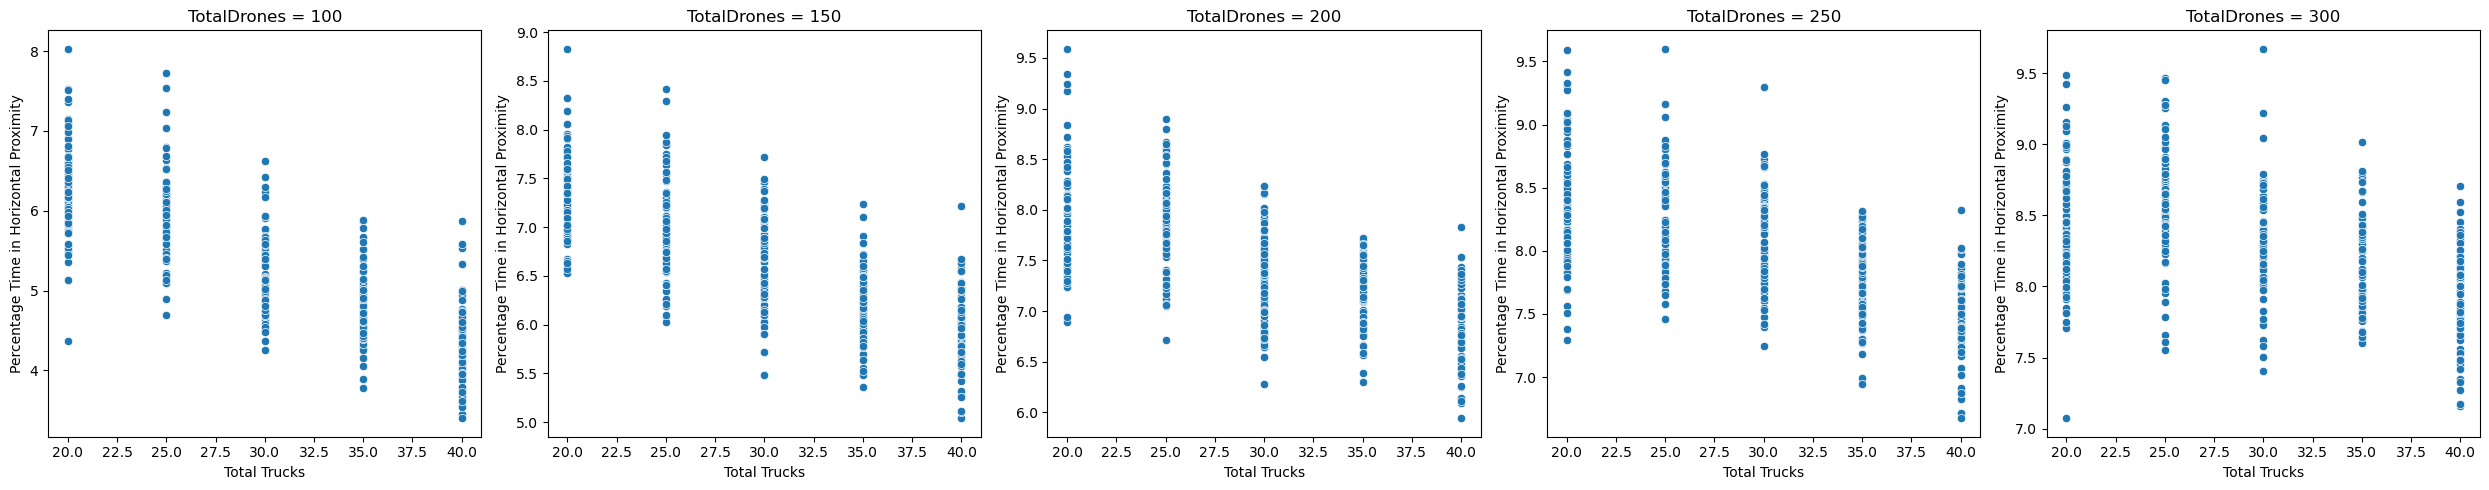

In [32]:
#scatterplot for total trucks vs. percentage time horizontal proximity
scatter(simulation_results, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity', 
        'Method', 'KMeans', 'Total Trucks', 'Percentage Time in Horizontal Proximity', 'Images/KMeans/KScatterTrucksHorizontalProximity.png')

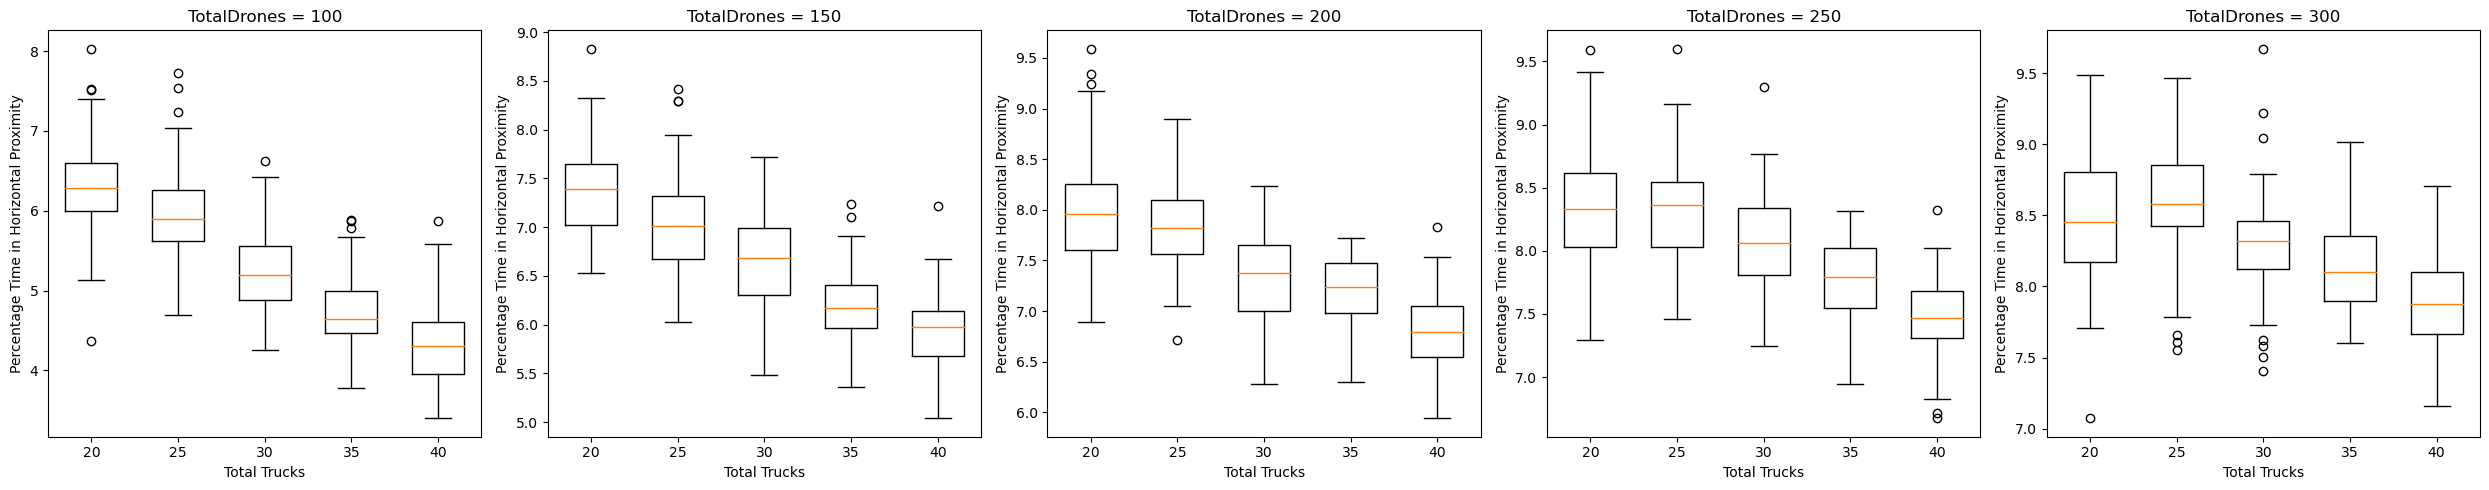

TotalDrones TotalTrucks       min       25%       50%       75%       max  \
0          100          20  4.361510  6.000895  6.280666  6.600681  8.029520   
1          100          25  4.690684  5.615085  5.897303  6.266203  7.720862   
2          100          30  4.250487  4.887307  5.195988  5.563739  6.621385   
3          100          35  3.781031  4.462768  4.639782  4.989269  5.882981   
4          100          40  3.399520  3.954560  4.310761  4.611203  5.872404   
5          150          20  6.529195  7.019962  7.391525  7.646020  8.829950   
6          150          25  6.024394  6.670137  7.013209  7.314627  8.415584   
7          150          30  5.478605  6.305138  6.679068  6.991023  7.723013   
8          150          35  5.358926  5.964485  6.171633  6.406631  7.236844   
9          150          40  5.039496  5.681925  5.972586  6.137948  7.219019   
10         200          20  6.891170  7.608143  7.963883  8.253869  9.589963   
11         200          25  6.713630  7.560550  7.823836  8.095149  8.893597   
12         200          30  6.285068  7.005372  7.372617  7.657095  8.240408   
13         200          35  6.304087  6.980010  7.239221  7.472385  7.718994   
14         200          40  5.942588  6.543922  6.798107  7.046122  7.834959   
15         250          20  7.291591  8.031784  8.331995  8.617336  9.587802   
16         250          25  7.462902  8.027669  8.365767  8.543826  9.600502   
17         250          30  7.249628  7.809703  8.058294  8.335495  9.297282   
18         250          35  6.945042  7.547637  7.792355  8.023210  8.314935   
19         250          40  6.673343  7.305530  7.467731  7.683326  8.326937   
20         300          20  7.073550  8.171777  8.455474  8.807184  9.489905   
21         300          25  7.550689  8.424332  8.580841  8.856953  9.469134   
22         300          30  7.405273  8.123889  8.319263  8.458536  9.671053   
23         300          35  7.601614  7.896424  8.101361  8.354863  9.018945   
24         300          40  7.160732  7.666092  7.875202  8.102608  8.705835   

        mean     range       IQR  
0   6.320746  3.668009  0.599786  
1   5.947090  3.030178  0.651118  
2   5.249197  2.370899  0.676432  
3   4.746792  2.101950  0.526500  
4   4.336666  2.472884  0.656643  
5   7.372752  2.300755  0.626058  
6   7.022724  2.391190  0.644491  
7   6.651804  2.244408  0.685884  
8   6.189327  1.877917  0.442146  
9   5.929605  2.179523  0.456023  
10  7.975975  2.698794  0.645726  
11  7.832474  2.179968  0.534599  
12  7.344454  1.955340  0.651723  
13  7.198362  1.414907  0.492375  
14  6.825923  1.892371  0.502200  
15  8.367560  2.296211  0.585552  
16  8.308652  2.137600  0.516157  
17  8.072485  2.047654  0.525792  
18  7.773963  1.369893  0.475573  
19  7.454943  1.653594  0.377796  
20  8.490932  2.416355  0.635407  
21  8.596178  1.918445  0.432621  
22  8.314824  2.265780  0.334647  
23  8.144244  1.417331  0.458438  
24  7.885748  1.545103  0.436516

In [33]:
#boxplot for total drones vs. percentage time horizontal proximity
boxplot(dataframe=simulation_results, control='TotalDrones', independent='TotalTrucks', dependent='SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity', 
                           filter_column='Method', filter_value='KMeans', xlabel='Total Trucks', ylabel='Percentage Time in Horizontal Proximity', filepath='Images/KMeans/KBoxTrucksHorizontalProximity')

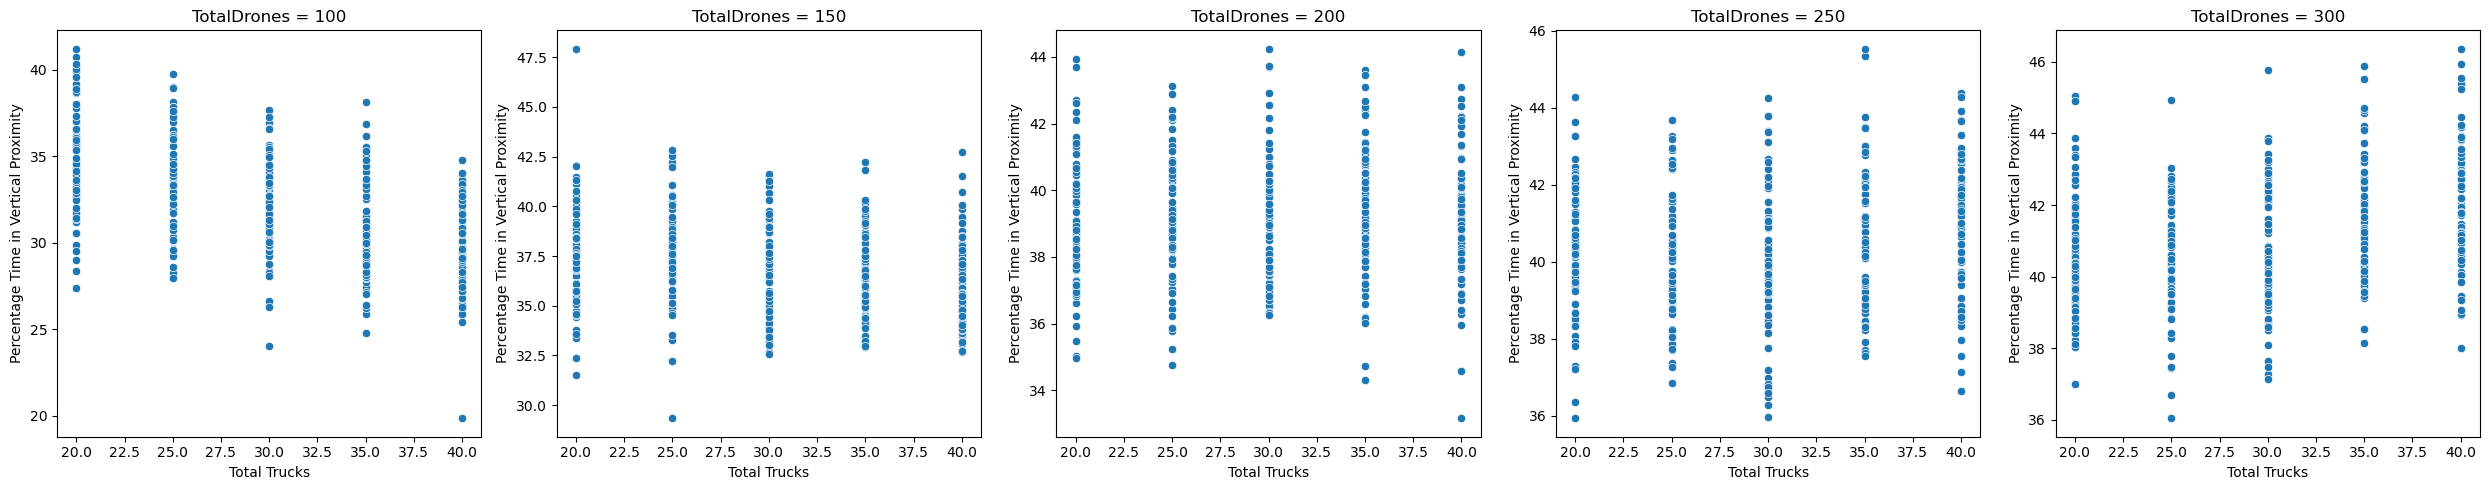

In [34]:
#scatterplot for total trucks vs. percentage time vertial proximity
scatter(simulation_results, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_PercentageTimeVerticalProximity', 
        'Method', 'KMeans', 'Total Trucks', 'Percentage Time in Vertical Proximity', 'Images/KMeans/KScatterTrucksVerticalProximity.png')

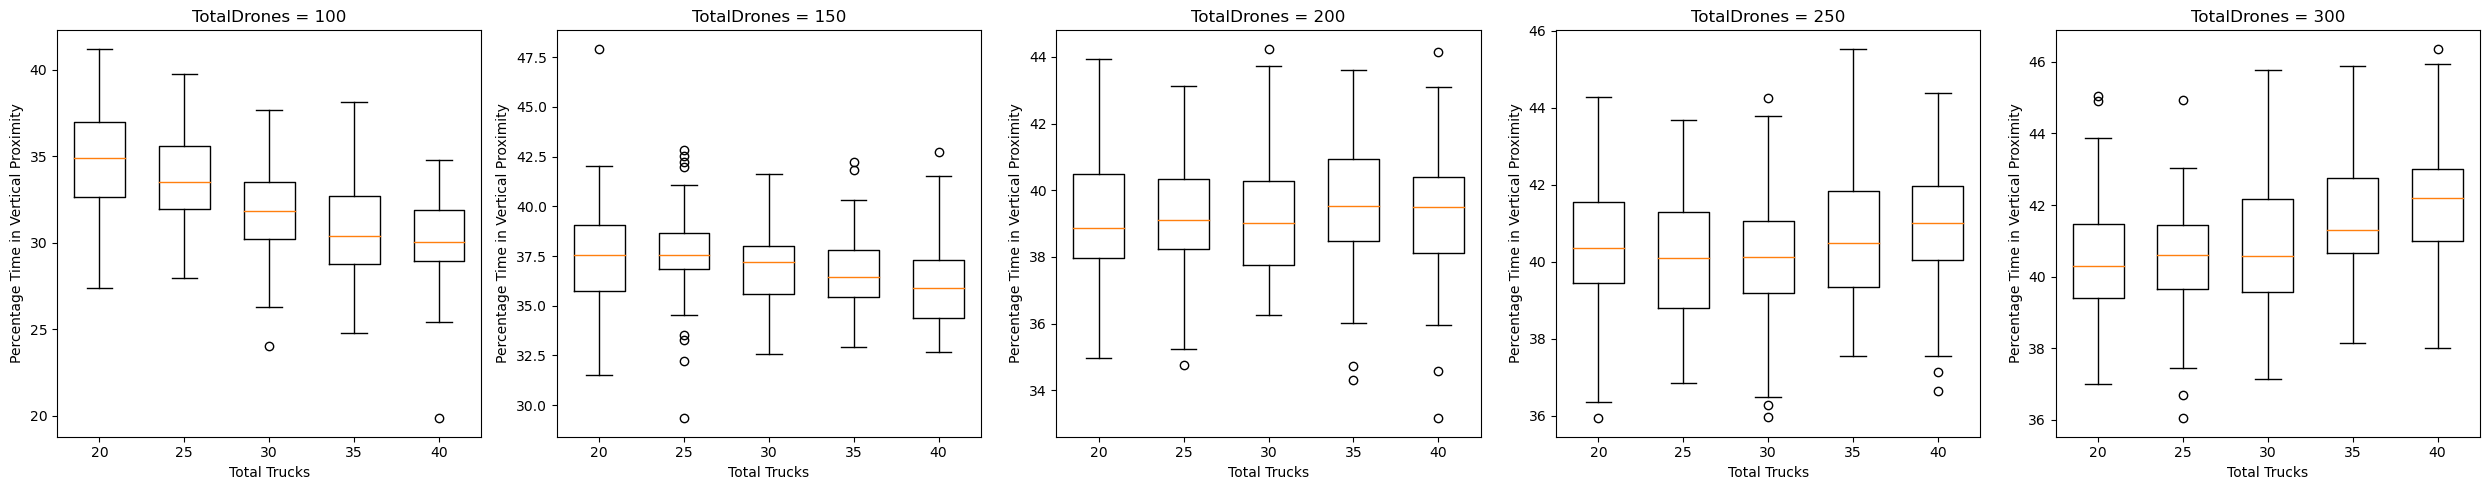

TotalDrones TotalTrucks        min        25%        50%        75%  \
0          100          20  27.360942  32.650124  34.889741  36.974483   
1          100          25  27.954845  31.916282  33.521305  35.578847   
2          100          30  23.993641  30.222140  31.842688  33.481663   
3          100          35  24.795326  28.790171  30.407225  32.708593   
4          100          40  19.844409  28.908794  30.031295  31.911387   
5          150          20  31.493299  35.766723  37.563498  39.047082   
6          150          25  29.342413  36.838702  37.530652  38.644621   
7          150          30  32.593964  35.573744  37.195268  38.018437   
8          150          35  32.911091  35.446416  36.444362  37.819417   
9          150          40  32.672726  34.378786  35.873979  37.293860   
10         200          20  34.974111  37.974032  38.880260  40.503225   
11         200          25  34.768635  38.228795  39.114415  40.327567   
12         200          30  36.271455  37.769416  39.026148  40.277081   
13         200          35  34.300445  38.469508  39.535356  40.940430   
14         200          40  33.161979  38.117273  39.507800  40.400754   
15         250          20  35.929251  39.452080  40.359086  41.556706   
16         250          25  36.850466  38.807872  40.085620  41.285687   
17         250          30  35.971267  39.173482  40.124847  41.050558   
18         250          35  37.548755  39.350626  40.483873  41.840516   
19         250          40  36.644729  40.056475  41.009240  41.963182   
20         300          20  37.003446  39.415322  40.298562  41.463912   
21         300          25  36.043114  39.650174  40.608390  41.432153   
22         300          30  37.143144  39.579463  40.564144  42.173058   
23         300          35  38.149424  40.650101  41.313492  42.751995   
24         300          40  37.992849  40.987884  42.199903  43.010410   

          max       mean      range       IQR  
0   41.202037  34.903772  13.841096  4.324359  
1   39.755554  33.549581  11.800709  3.662564  
2   37.663734  31.958843  13.670093  3.259523  
3   38.136291  30.781380  13.340965  3.918422  
4   34.745761  30.071417  14.901352  3.002593  
5   47.924572  37.598471  16.431273  3.280359  
6   42.845898  37.704808  13.503485  1.805919  
7   41.637097  36.996640   9.043133  2.444692  
8   42.245675  36.720550   9.334585  2.373001  
9   42.755263  36.081461  10.082537  2.915075  
10  43.940604  39.155370   8.966493  2.529192  
11  43.143136  39.120663   8.374501  2.098771  
12  44.245533  39.210242   7.974078  2.507664  
13  43.624555  39.537362   9.324109  2.470923  
14  44.154142  39.329012  10.992164  2.283481  
15  44.292161  40.359513   8.362910  2.104626  
16  43.680536  40.104776   6.830070  2.477815  
17  44.260360  39.995332   8.289093  1.877076  
18  45.535033  40.643670   7.986279  2.489890  
19  44.380296  40.966938   7.735567  1.906707  
20  45.055179  40.506609   8.051733  2.048590  
21  44.928944  40.533375   8.885830  1.781979  
22  45.773997  40.763141   8.630854  2.593595  
23  45.886265  41.696562   7.736841  2.101895  
24  46.363177  42.077085   8.370329  2.022526

In [35]:
#boxplot for total drones vs. percentage time vertical proximity
boxplot(dataframe=simulation_results, control='TotalDrones', independent='TotalTrucks', dependent='SuccessfulNoBottlenecks_PercentageTimeVerticalProximity', 
                           filter_column='Method', filter_value='KMeans', xlabel='Total Trucks', ylabel='Percentage Time in Vertical Proximity', filepath='Images/KMeans/KBoxTrucksVerticalProximity')

**3bi. Scatterplot (category of drones = SuccessfulBottlenecks, filter = Random, control = TotalTrucks, independent = TotalDrones)**

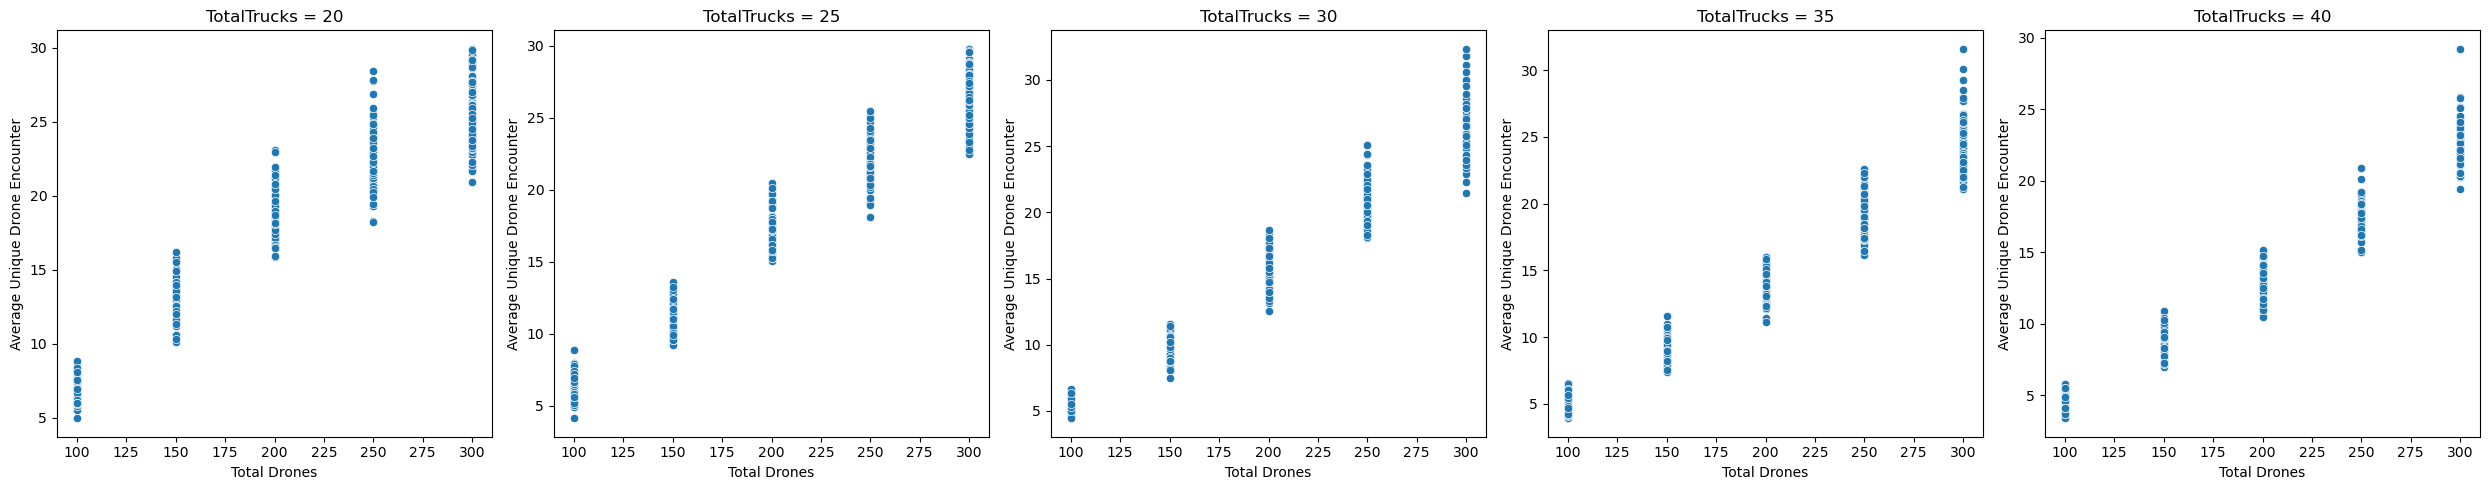

In [37]:
#scatterplot for total drones vs. average unique drone encounter
scatter(simulation_results, 'TotalTrucks', 'TotalDrones', 'SuccessfulNoBottlenecks_AverageUniqueDroneEncounter', 
        'Method', 'Random', 'Total Drones', 'Average Unique Drone Encounter', 'Images/Random/RScatterDronesUniqueEncounters.png')

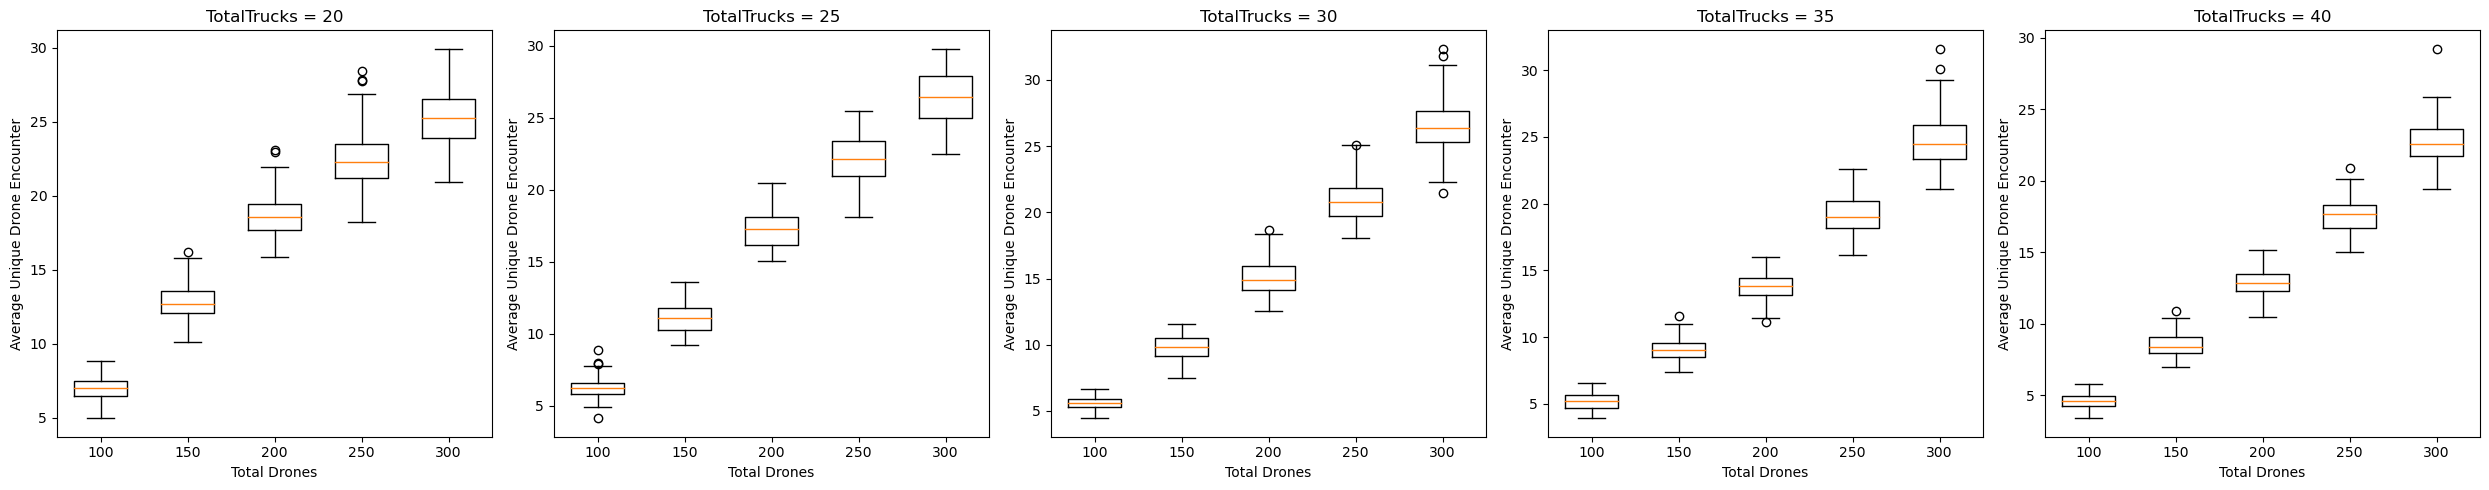

TotalTrucks TotalDrones        min        25%        50%        75%  \
0           20         100   4.979592   6.451399   6.990000   7.505051   
1           20         150  10.099291  12.087126  12.702128  13.586569   
2           20         200  15.860825  17.719932  18.575269  19.476287   
3           20         250  18.267490  21.242433  22.284000  23.504629   
4           20         300  20.960000  23.904466  25.236667  26.559326   
5           25         100   4.120000   5.791667   6.220000   6.581978   
6           25         150   9.226027  10.273288  11.082192  11.796656   
7           25         200  15.065327  16.194436  17.295000  18.085859   
8           25         250  18.108000  20.976606  22.148760  23.364380   
9           25         300  22.476510  24.991611  26.456667  27.899494   
10          30         100   4.450000   5.315000   5.597938   5.939085   
11          30         150   7.500000   9.129862   9.793103  10.489963   
12          30         200  12.585106  14.168718  14.901042  15.948906   
13          30         250  18.061983  19.702095  20.743802  21.852578   
14          30         300  21.454849  25.302030  26.371528  27.647355   
15          35         100   3.910000   4.710979   5.200000   5.639610   
16          35         150   7.369128   8.498066   9.040000   9.587248   
17          35         200  11.108247  13.158043  13.852041  14.440641   
18          35         250  16.174797  18.168095  18.979339  20.216508   
19          35         300  21.108772  23.306519  24.440141  25.898837   
20          40         100   3.397849   4.260417   4.570000   4.934082   
21          40         150   7.006757   7.942012   8.408451   9.050476   
22          40         200  10.497436  12.297436  12.827411  13.500000   
23          40         250  14.991968  16.720119  17.673729  18.280244   
24          40         300  19.439189  21.719178  22.586207  23.652397   

          max       mean      range       IQR  
0    8.880000   7.002114   3.900408  1.053651  
1   16.233333  12.854642   6.134043  1.499442  
2   23.136364  18.690251   7.275539  1.756355  
3   28.419355  22.533336  10.151865  2.262196  
4   29.942446  25.381412   8.982446  2.654860  
5    8.870000   6.259270   4.750000  0.790311  
6   13.616438  11.095688   4.390411  1.523368  
7   20.479592  17.327418   5.414265  1.891423  
8   25.464000  22.112160   7.356000  2.387774  
9   29.795139  26.439051   7.318629  2.907883  
10   6.642105   5.586238   2.192105  0.624085  
11  11.554795   9.786297   4.054795  1.360102  
12  18.637363  15.179100   6.052256  1.780188  
13  25.097166  20.959569   7.035183  2.150483  
14  32.343750  26.408416  10.888901  2.345325  
15   6.542553   5.149423   2.632553  0.928631  
16  11.576389   9.081731   4.207261  1.089182  
17  15.989950  13.815761   4.881702  1.282598  
18  22.558704  19.181095   6.383908  2.048414  
19  31.604167  24.672518  10.495395  2.592317  
20   5.820000   4.613984   2.422151  0.673665  
21  10.925170   8.541227   3.918413  1.108464  
22  15.135000  12.902092   4.637564  1.202564  
23  20.876033  17.579037   5.884065  1.560125  
24  29.226027  22.755410   9.786838  1.933219

In [38]:
#boxplot for total drones vs. average unique drone encounter
boxplot(dataframe=simulation_results, control='TotalTrucks', independent='TotalDrones', dependent='SuccessfulNoBottlenecks_AverageUniqueDroneEncounter', 
                           filter_column='Method', filter_value='Random', xlabel='Total Drones', ylabel='Average Unique Drone Encounter', filepath='Images/Random/RBoxDronesUniqueEncounters')

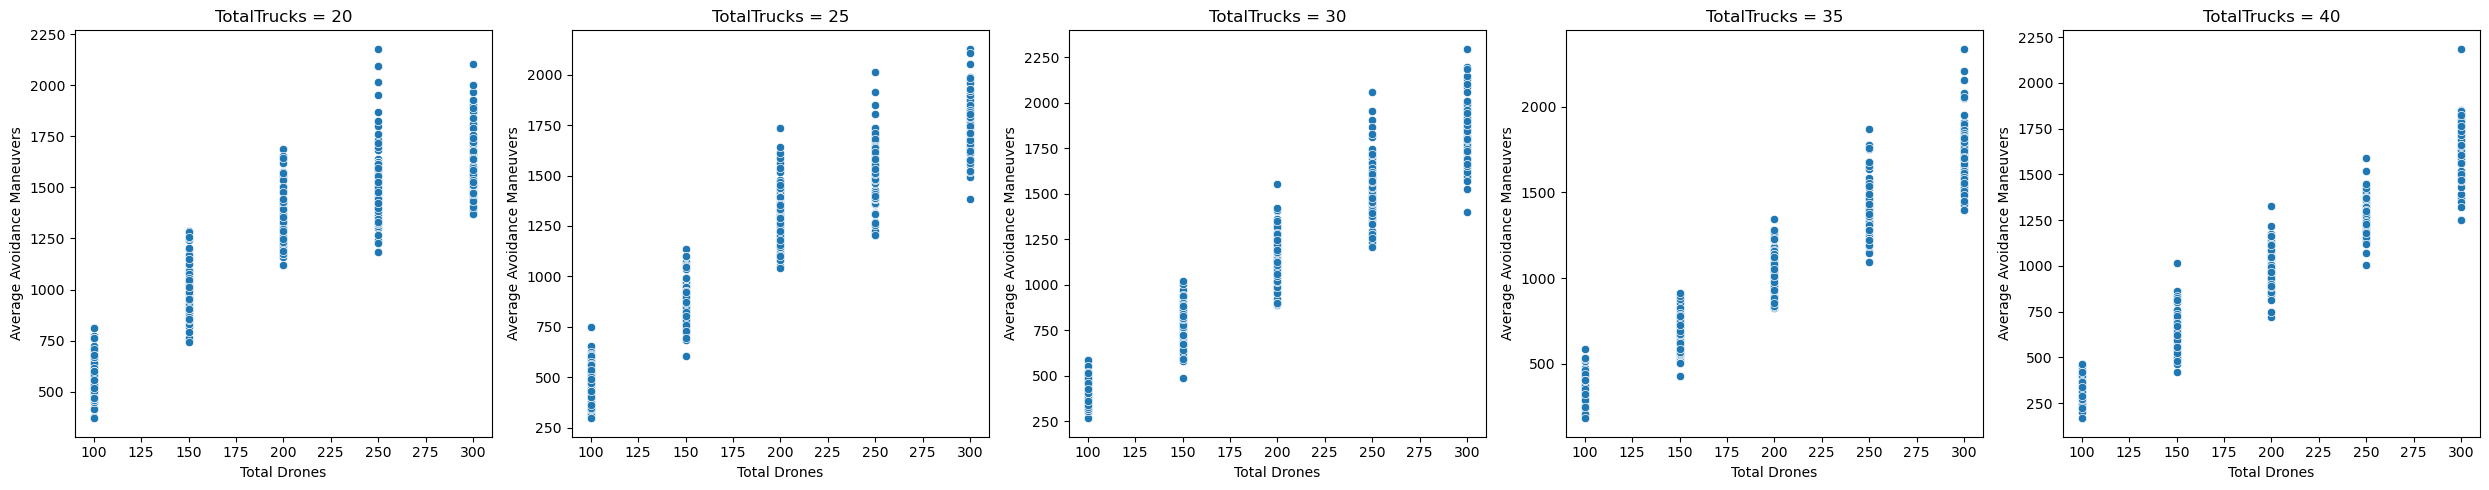

In [39]:
#scatterplot for total drones vs. average avoidance maneuvers
scatter(simulation_results, 'TotalTrucks', 'TotalDrones', 'SuccessfulNoBottlenecks_AverageAvoidanceManeuvers', 
        'Method', 'Random', 'Total Drones', 'Average Avoidance Maneuvers', 'Images/Random/RScatterDronesAvoidance.png')

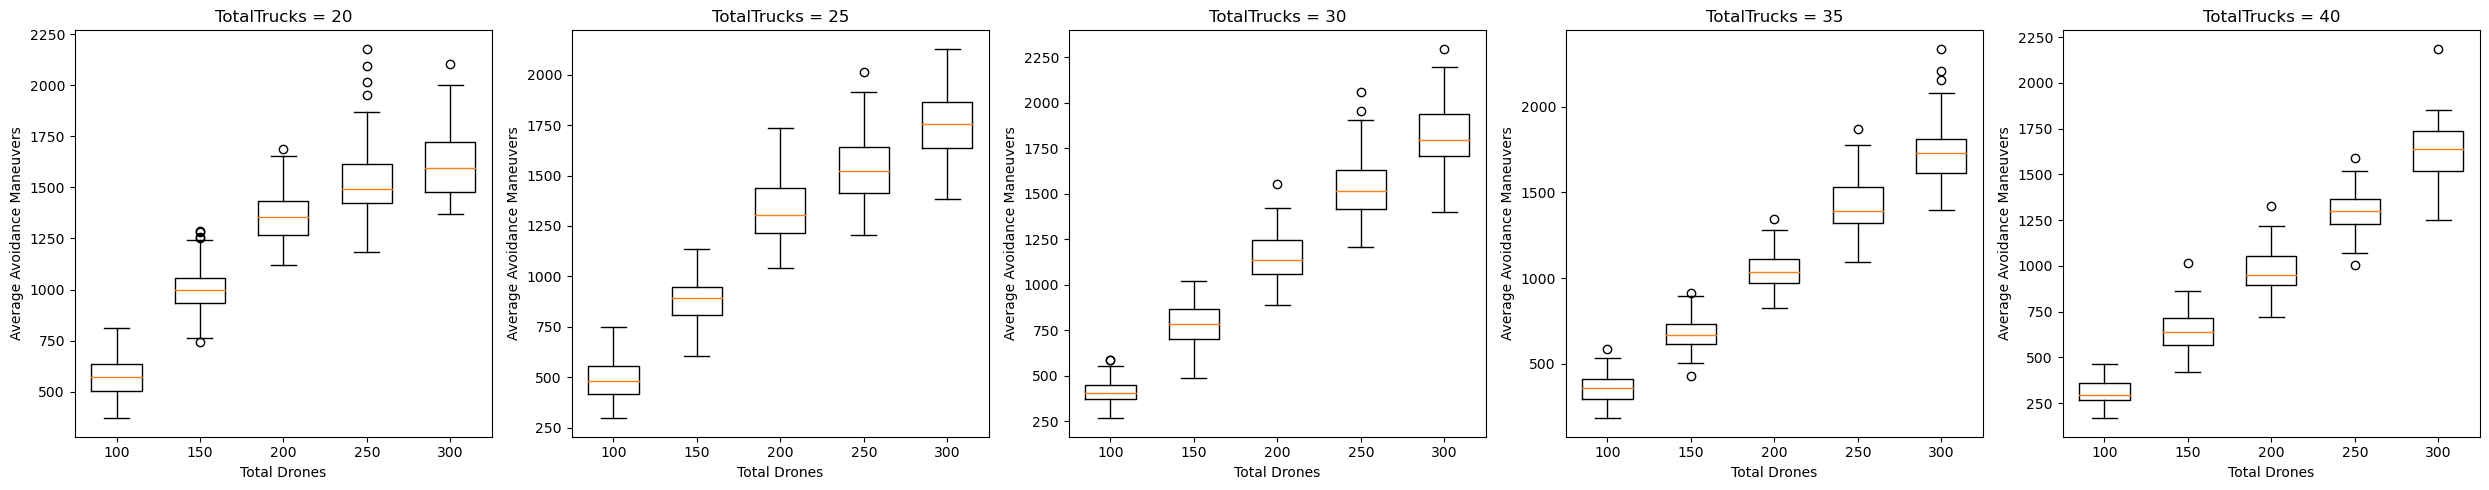

TotalTrucks TotalDrones          min          25%          50%  \
0           20         100   370.907216   503.257732   570.767677   
1           20         150   743.283688   932.451145   999.840000   
2           20         200  1119.420513  1267.746194  1355.326531   
3           20         250  1181.683128  1423.379439  1490.028112   
4           20         300  1368.605351  1479.170159  1592.430000   
5           25         100   296.000000   416.536959   481.156250   
6           25         150   606.554054   806.197987   890.358621   
7           25         200  1043.214286  1215.932323  1302.610000   
8           25         250  1205.396000  1413.134594  1522.280000   
9           25         300  1381.683099  1638.319978  1754.582492   
10          30         100   267.510417   375.712121   407.830000   
11          30         150   486.452703   702.933050   783.421429   
12          30         200   887.505000  1059.468449  1137.453125   
13          30         250  1208.886555  1414.494874  1517.880851   
14          30         300  1400.142373  1710.303318  1794.298932   
15          35         100   181.360000   295.409039   358.298969   
16          35         150   426.355705   615.326469   668.866667   
17          35         200   824.200000   971.653910  1032.649215   
18          35         250  1091.808943  1324.240898  1391.634855   
19          35         300  1400.357388  1611.615772  1730.466443   
20          40         100   167.826531   266.230825   294.500000   
21          40         150   417.849315   569.345638   640.633333   
22          40         200   722.793478   895.708436   949.290155   
23          40         250  1004.493827  1230.637943  1300.843220   
24          40         300  1250.237458  1517.597594  1636.904255   

            75%          max         mean       range         IQR  
0    638.410000   813.580000   575.383972  442.672784  135.152268  
1   1057.492215  1287.217687  1004.675848  543.933999  125.041069  
2   1433.386237  1687.393782  1366.341968  567.973270  165.640043  
3   1613.661616  2177.604545  1523.727919  995.921418  190.282178  
4   1723.822725  2105.165468  1619.924503  736.560116  244.652566  
5    555.967487   748.310000   482.769566  452.310000  139.430529  
6    948.820476  1137.593333   885.364369  531.039279  142.622490  
7   1438.148061  1737.424242  1320.915927  694.209957  222.215738  
8   1642.719979  2012.544355  1534.685118  807.148355  229.585385  
9   1863.609570  2128.975694  1754.269290  747.292596  225.289593  
10   451.892374   589.580000   414.311411  322.069583   76.180253  
11   865.226058  1019.527397   781.312525  533.074695  162.293008  
12  1245.623037  1554.203209  1153.971128  666.698209  186.154588  
13  1628.195700  2059.068670  1535.158705  850.182115  213.700826  
14  1939.417859  2296.429066  1821.223899  896.286693  229.114541  
15   412.400000   588.636364   355.543086  407.276364  116.990961  
16   729.695638   910.846667   676.575496  484.490962  114.369169  
17  1114.311108  1342.155779  1042.678054  517.955779  142.657198  
18  1530.797763  1869.032922  1426.679393  777.223979  206.556865  
19  1809.503818  2338.986111  1733.555533  938.628723  197.888046  
20   360.200126   466.051546   312.420660  298.225016   93.969302  
21   713.731036  1014.442953   649.684700  596.593638  144.385398  
22  1051.995393  1329.815000   972.242892  607.021522  156.286956  
23  1364.430482  1589.225941  1296.842162  584.732114  133.792539  
24  1737.859492  2185.856164  1632.494626  935.618706  220.261898

In [40]:
#boxplot for total drones vs. average avoidance maneuvers
boxplot(dataframe=simulation_results, control='TotalTrucks', independent='TotalDrones', dependent='SuccessfulNoBottlenecks_AverageAvoidanceManeuvers', 
                           filter_column='Method', filter_value='Random', xlabel='Total Drones', ylabel='Average Avoidance Maneuvers', filepath='Images/Random/RBoxDronesAvoidance')

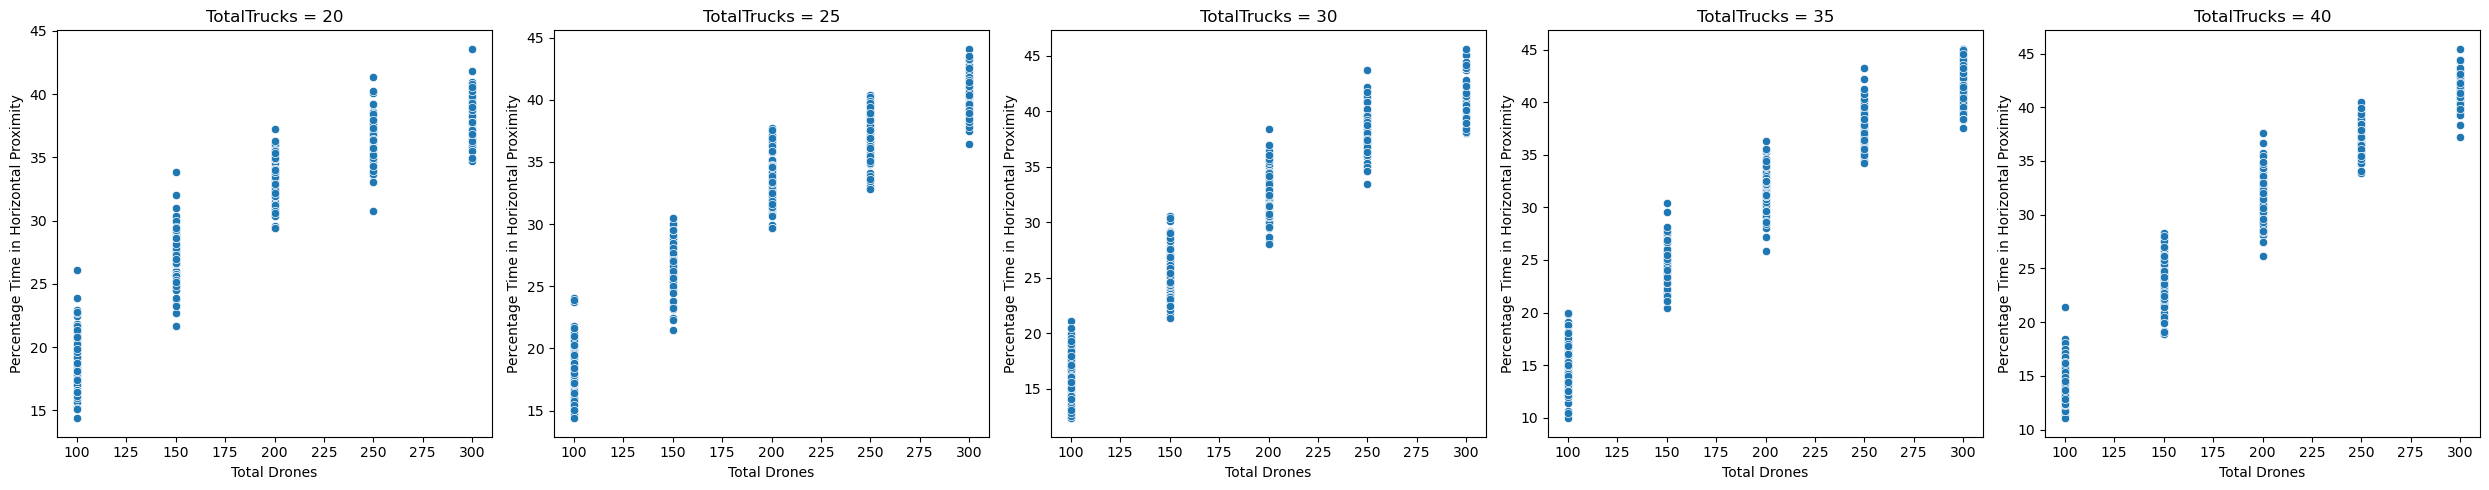

In [41]:
#scatterplot for total drones vs. percentage time horizontal proximity
scatter(simulation_results, 'TotalTrucks', 'TotalDrones', 'SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity', 
        'Method', 'Random', 'Total Drones', 'Percentage Time in Horizontal Proximity', 'Images/Random/RScatterDronesHorizontalProximity.png')

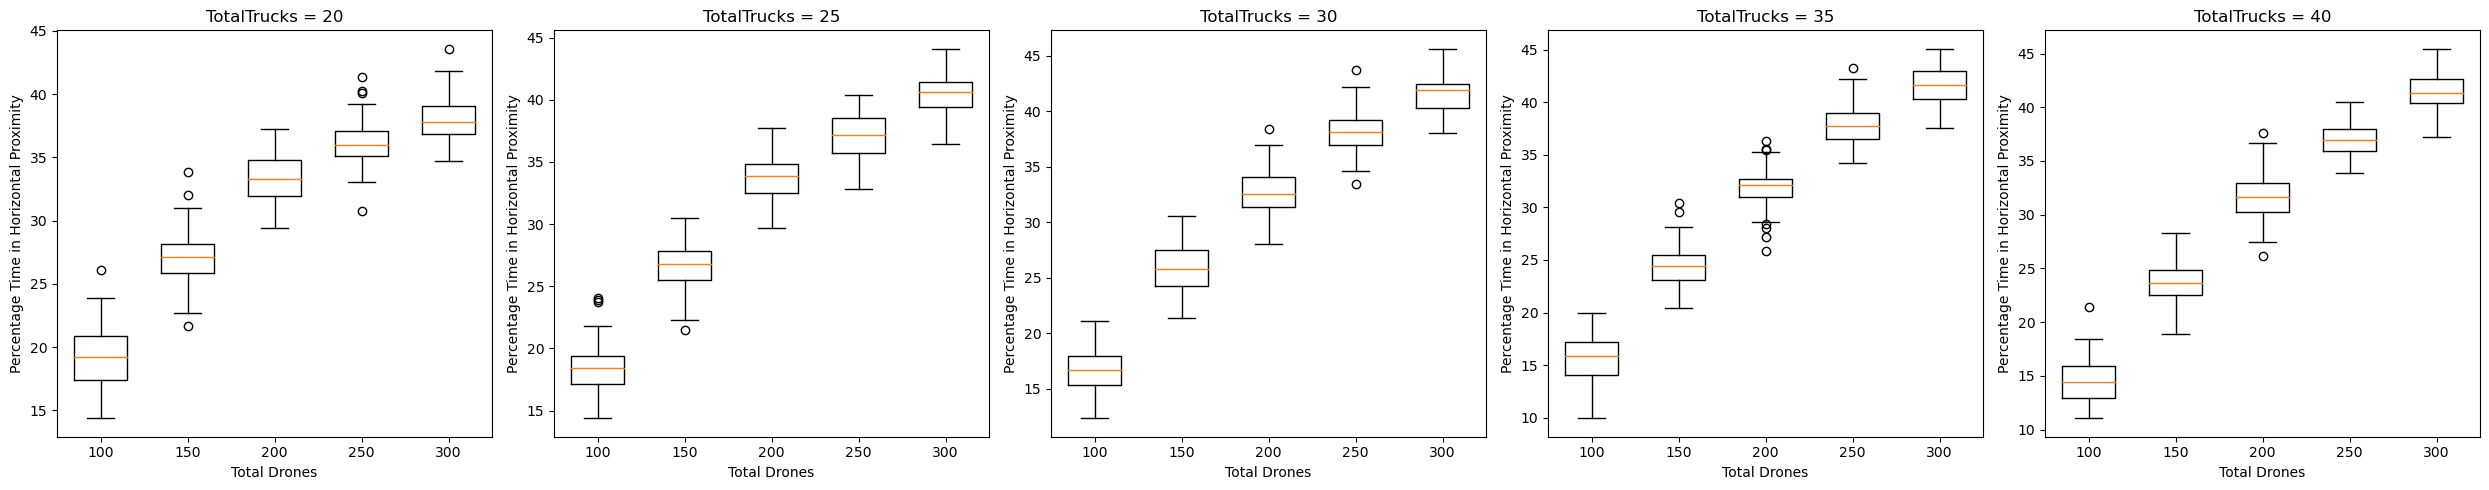

TotalTrucks TotalDrones        min        25%        50%        75%  \
0           20         100  14.387079  17.436536  19.217170  20.848645   
1           20         150  21.697128  25.868097  27.137420  28.178018   
2           20         200  29.441491  31.956755  33.331473  34.826042   
3           20         250  30.802816  35.081484  36.014039  37.051605   
4           20         300  34.715508  36.848397  37.803563  39.069225   
5           25         100  14.378535  17.131079  18.393934  19.417498   
6           25         150  21.476564  25.490477  26.765601  27.810192   
7           25         200  29.654534  32.489793  33.905587  34.846553   
8           25         250  32.829046  35.738418  37.193162  38.553218   
9           25         300  36.462401  39.446957  40.595192  41.437261   
10          30         100  12.366780  15.374106  16.742711  17.991443   
11          30         150  21.399200  24.262545  25.757602  27.517037   
12          30         200  28.067342  31.385340  32.576805  34.114536   
13          30         250  33.465584  36.983014  38.096403  39.163165   
14          30         300  38.012215  40.268223  41.854364  42.474341   
15          35         100   9.946261  14.055713  15.841430  17.202283   
16          35         150  20.450357  23.093644  24.454637  25.464318   
17          35         200  25.881383  31.031230  32.127309  32.739424   
18          35         250  34.264962  36.496251  37.740286  39.022137   
19          35         300  37.528945  40.301823  41.634760  42.935431   
20          40         100  11.063247  12.909208  14.408728  15.956669   
21          40         150  18.946550  22.488908  23.602661  24.885872   
22          40         200  26.119405  30.260511  31.655789  32.992335   
23          40         250  33.854358  35.900373  36.908568  37.974757   
24          40         300  37.230852  40.414923  41.285146  42.629558   

          max       mean      range       IQR  
0   26.098590  19.133625  11.711510  3.412110  
1   33.858675  27.171222  12.161547  2.309921  
2   37.280165  33.230429   7.838674  2.869287  
3   41.321026  36.160532  10.518210  1.970120  
4   43.587638  37.988336   8.872130  2.220828  
5   24.024022  18.299852   9.645486  2.286419  
6   30.464268  26.612950   8.987703  2.319716  
7   37.722591  33.801388   8.068057  2.356760  
8   40.405300  37.122441   7.576254  2.814800  
9   44.100466  40.453199   7.638065  1.990304  
10  21.110162  16.643664   8.743382  2.617337  
11  30.577666  25.786126   9.178466  3.254492  
12  38.422941  32.707074  10.355599  2.729196  
13  43.667429  38.173468  10.201845  2.180152  
14  45.605071  41.612218   7.592856  2.206118  
15  20.003517  15.521214  10.057256  3.146571  
16  30.405408  24.496804   9.955052  2.370674  
17  36.300319  31.840436  10.418937  1.708194  
18  43.285138  37.850182   9.020177  2.525886  
19  45.087558  41.649781   7.558613  2.633609  
20  21.436473  14.528744  10.373226  3.047461  
21  28.309770  23.669718   9.363219  2.396964  
22  37.645353  31.708610  11.525948  2.731824  
23  40.525239  36.938362   6.670881  2.074383  
24  45.439053  41.537168   8.208201  2.214635

In [42]:
#boxplot for total drones vs. percentage time horizontal proximity
boxplot(dataframe=simulation_results, control='TotalTrucks', independent='TotalDrones', dependent='SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity', 
                           filter_column='Method', filter_value='Random', xlabel='Total Drones', ylabel='Percentage Time in Horizontal Proximity', filepath='Images/Random/RBoxDronesHorizontalProximity')

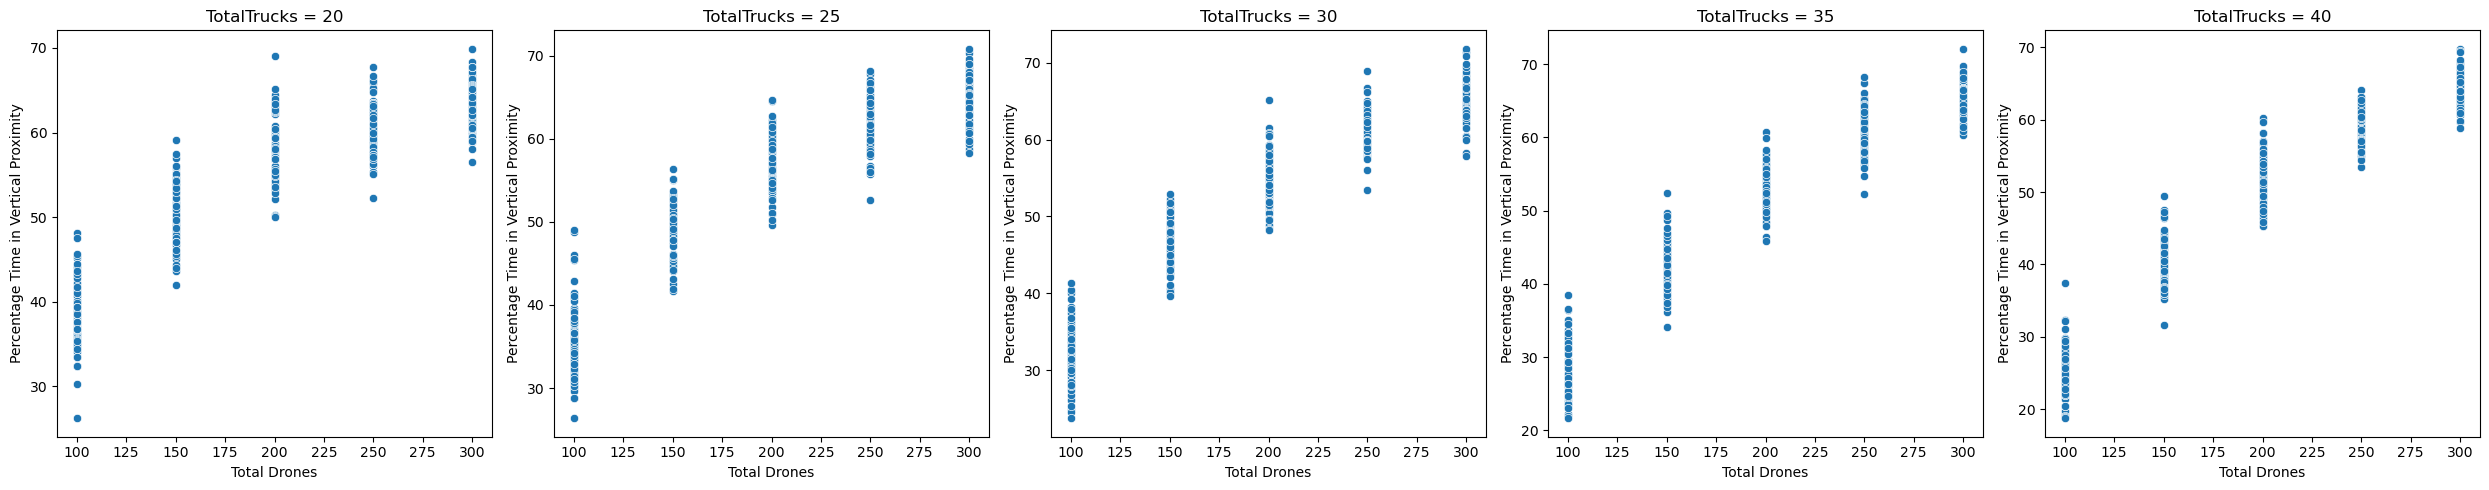

In [43]:
#scatterplot for total drones vs. percentage time vertial proximity
scatter(simulation_results, 'TotalTrucks', 'TotalDrones', 'SuccessfulNoBottlenecks_PercentageTimeVerticalProximity', 
        'Method', 'Random', 'Total Drones', 'Percentage Time in Vertical Proximity', 'Images/Random/RScatterDronesVerticalProximity.png')

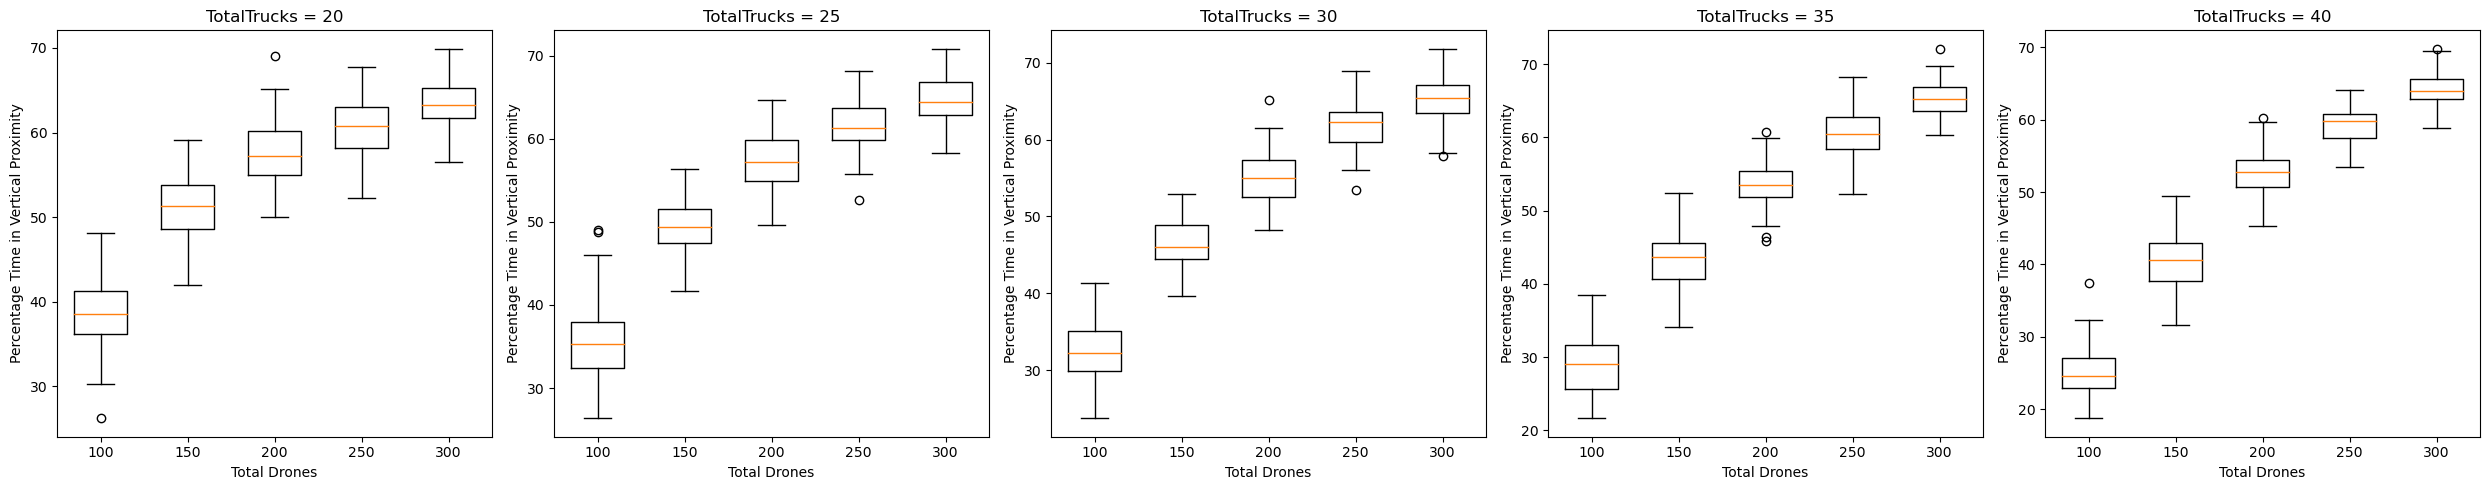

TotalTrucks TotalDrones        min        25%        50%        75%  \
0           20         100  26.231445  36.197218  38.589593  41.298400   
1           20         150  41.967594  48.616859  51.354136  53.820808   
2           20         200  50.037243  54.964382  57.234762  60.195545   
3           20         250  52.286920  58.228225  60.774773  63.025865   
4           20         300  56.470526  61.681429  63.293145  65.321729   
5           25         100  26.373141  32.378868  35.329820  37.942168   
6           25         150  41.731024  47.411051  49.330586  51.582413   
7           25         200  49.667389  54.932668  57.195431  59.842420   
8           25         250  52.594318  59.889805  61.242053  63.666670   
9           25         300  58.334663  62.840905  64.425033  66.814755   
10          30         100  23.741315  29.854779  32.218740  35.138236   
11          30         150  39.664867  44.398633  46.007246  48.903752   
12          30         200  48.292400  52.551016  55.015233  57.393702   
13          30         250  53.408069  59.738959  62.275596  63.522797   
14          30         300  57.863193  63.477858  65.386831  67.151831   
15          35         100  21.662151  25.720149  28.998434  31.647907   
16          35         150  34.077079  40.657589  43.668232  45.525697   
17          35         200  45.816291  51.851334  53.538760  55.356376   
18          35         250  52.306415  58.454825  60.498747  62.782854   
19          35         300  60.307751  63.622580  65.252233  66.881716   
20          40         100  18.774421  22.966776  24.670888  27.055227   
21          40         150  31.663795  37.724968  40.625176  43.007793   
22          40         200  45.268226  50.711168  52.826190  54.408794   
23          40         250  53.454310  57.447308  59.786124  60.797159   
24          40         300  58.816273  62.902517  63.960107  65.640613   

          max       mean      range       IQR  
0   48.071476  38.753518  21.840031  5.101183  
1   59.068736  50.933450  17.101142  5.203949  
2   69.010107  57.835343  18.972864  5.231162  
3   67.797681  60.710016  15.510761  4.797640  
4   69.897166  63.376847  13.426640  3.640300  
5   49.006882  35.628896  22.633740  5.563299  
6   56.357604  49.189189  14.626581  4.171362  
7   64.686947  57.332848  15.019558  4.909752  
8   68.142497  61.490724  15.548179  3.776865  
9   70.822789  64.572607  12.488126  3.973850  
10  41.350304  32.311417  17.608988  5.283457  
11  52.851193  46.467340  13.186327  4.505119  
12  65.196723  55.003768  16.904323  4.842686  
13  68.941280  61.709348  15.533211  3.783838  
14  71.798566  65.302370  13.935373  3.673973  
15  38.416945  28.760016  16.754794  5.927758  
16  52.383949  43.017025  18.306869  4.868108  
17  60.687183  53.465407  14.870893  3.505041  
18  68.194080  60.700470  15.887665  4.328029  
19  72.084952  65.278606  11.777202  3.259137  
20  37.495826  25.074437  18.721406  4.088452  
21  49.503452  40.589361  17.839657  5.282825  
22  60.237166  52.499658  14.968940  3.697626  
23  64.061506  59.196279  10.607197  3.349850  
24  69.765023  64.151711  10.948751  2.738096

In [44]:
#boxplot for total drones vs. percentage time vertical proximity
boxplot(dataframe=simulation_results, control='TotalTrucks', independent='TotalDrones', dependent='SuccessfulNoBottlenecks_PercentageTimeVerticalProximity', 
                           filter_column='Method', filter_value='Random', xlabel='Total Drones', ylabel='Percentage Time in Vertical Proximity', filepath='Images/Random/RBoxDronesVerticalProximity')

**3bii. Scatterplot (category of drones = SuccessfulBottlenecks, filter = Random, control = TotalDrones, independent = TotalTrucks)**

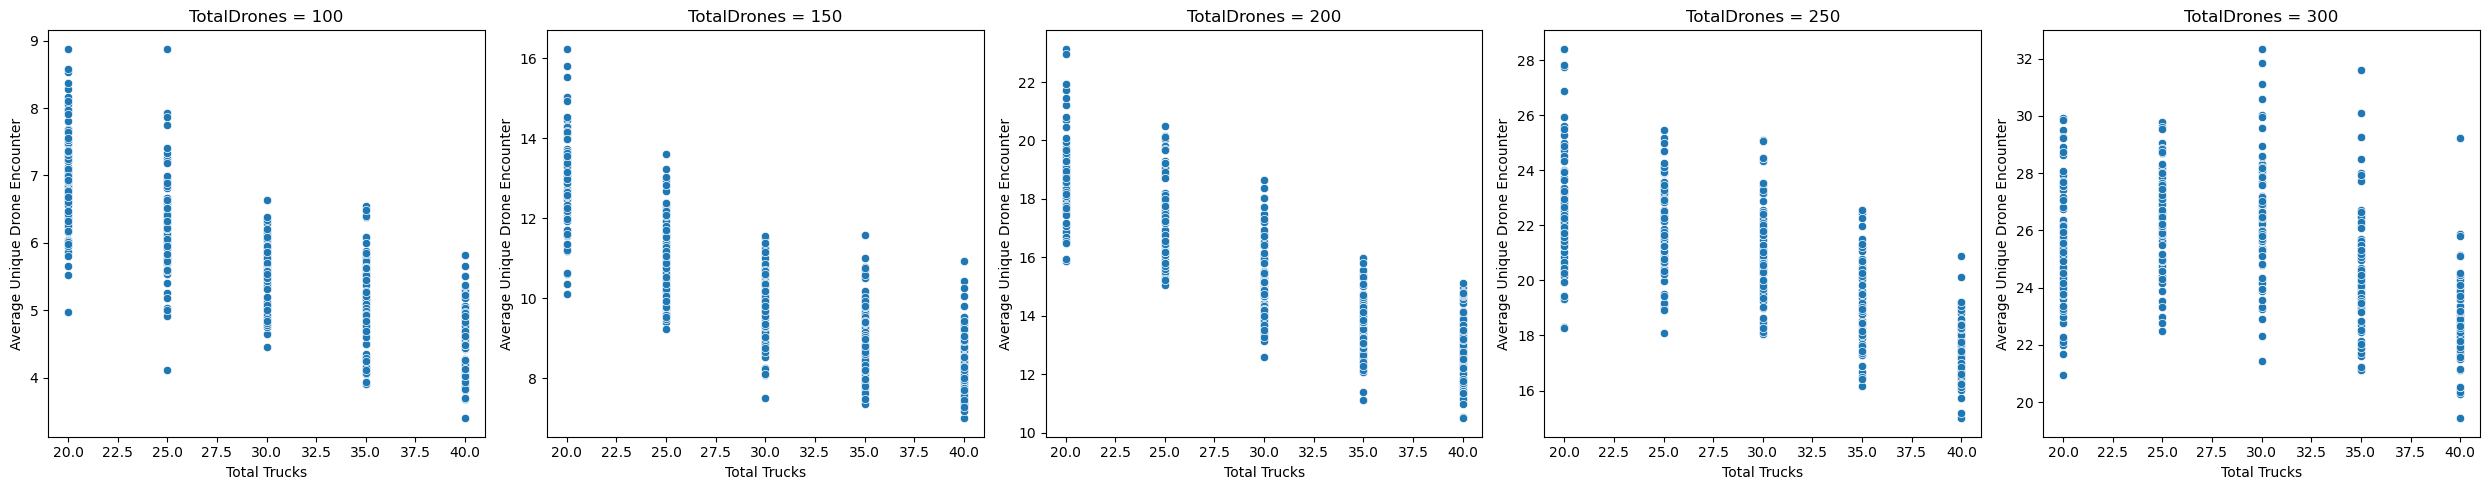

In [46]:
#scatterplot for total trucks vs. average unique drone encounter
scatter(simulation_results, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_AverageUniqueDroneEncounter', 
        'Method', 'Random', 'Total Trucks', 'Average Unique Drone Encounter', 'Images/Random/RScatterTrucksUniqueEncounters.png')

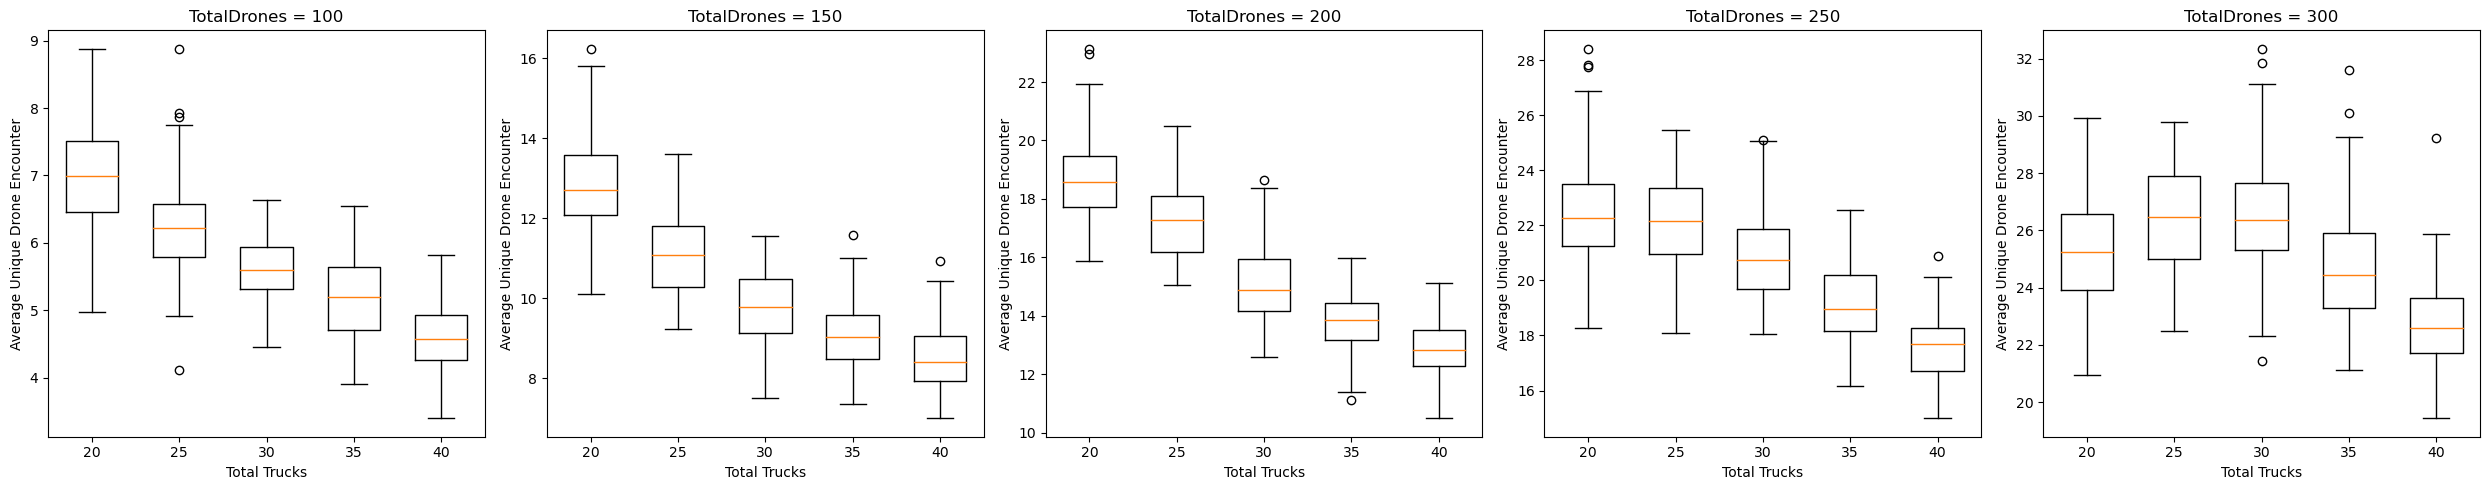

TotalDrones TotalTrucks        min        25%        50%        75%  \
0          100          20   4.979592   6.451399   6.990000   7.505051   
1          100          25   4.120000   5.791667   6.220000   6.581978   
2          100          30   4.450000   5.315000   5.597938   5.939085   
3          100          35   3.910000   4.710979   5.200000   5.639610   
4          100          40   3.397849   4.260417   4.570000   4.934082   
5          150          20  10.099291  12.087126  12.702128  13.586569   
6          150          25   9.226027  10.273288  11.082192  11.796656   
7          150          30   7.500000   9.129862   9.793103  10.489963   
8          150          35   7.369128   8.498066   9.040000   9.587248   
9          150          40   7.006757   7.942012   8.408451   9.050476   
10         200          20  15.860825  17.719932  18.575269  19.476287   
11         200          25  15.065327  16.194436  17.295000  18.085859   
12         200          30  12.585106  14.168718  14.901042  15.948906   
13         200          35  11.108247  13.158043  13.852041  14.440641   
14         200          40  10.497436  12.297436  12.827411  13.500000   
15         250          20  18.267490  21.242433  22.284000  23.504629   
16         250          25  18.108000  20.976606  22.148760  23.364380   
17         250          30  18.061983  19.702095  20.743802  21.852578   
18         250          35  16.174797  18.168095  18.979339  20.216508   
19         250          40  14.991968  16.720119  17.673729  18.280244   
20         300          20  20.960000  23.904466  25.236667  26.559326   
21         300          25  22.476510  24.991611  26.456667  27.899494   
22         300          30  21.454849  25.302030  26.371528  27.647355   
23         300          35  21.108772  23.306519  24.440141  25.898837   
24         300          40  19.439189  21.719178  22.586207  23.652397   

          max       mean      range       IQR  
0    8.880000   7.002114   3.900408  1.053651  
1    8.870000   6.259270   4.750000  0.790311  
2    6.642105   5.586238   2.192105  0.624085  
3    6.542553   5.149423   2.632553  0.928631  
4    5.820000   4.613984   2.422151  0.673665  
5   16.233333  12.854642   6.134043  1.499442  
6   13.616438  11.095688   4.390411  1.523368  
7   11.554795   9.786297   4.054795  1.360102  
8   11.576389   9.081731   4.207261  1.089182  
9   10.925170   8.541227   3.918413  1.108464  
10  23.136364  18.690251   7.275539  1.756355  
11  20.479592  17.327418   5.414265  1.891423  
12  18.637363  15.179100   6.052256  1.780188  
13  15.989950  13.815761   4.881702  1.282598  
14  15.135000  12.902092   4.637564  1.202564  
15  28.419355  22.533336  10.151865  2.262196  
16  25.464000  22.112160   7.356000  2.387774  
17  25.097166  20.959569   7.035183  2.150483  
18  22.558704  19.181095   6.383908  2.048414  
19  20.876033  17.579037   5.884065  1.560125  
20  29.942446  25.381412   8.982446  2.654860  
21  29.795139  26.439051   7.318629  2.907883  
22  32.343750  26.408416  10.888901  2.345325  
23  31.604167  24.672518  10.495395  2.592317  
24  29.226027  22.755410   9.786838  1.933219

In [47]:
#boxplot for total drones vs. average unique drone encounter
boxplot(dataframe=simulation_results, control='TotalDrones', independent='TotalTrucks', dependent='SuccessfulNoBottlenecks_AverageUniqueDroneEncounter', 
                           filter_column='Method', filter_value='Random', xlabel='Total Trucks', ylabel='Average Unique Drone Encounter', filepath='Images/Random/RBoxTrucksUniqueEncounters')

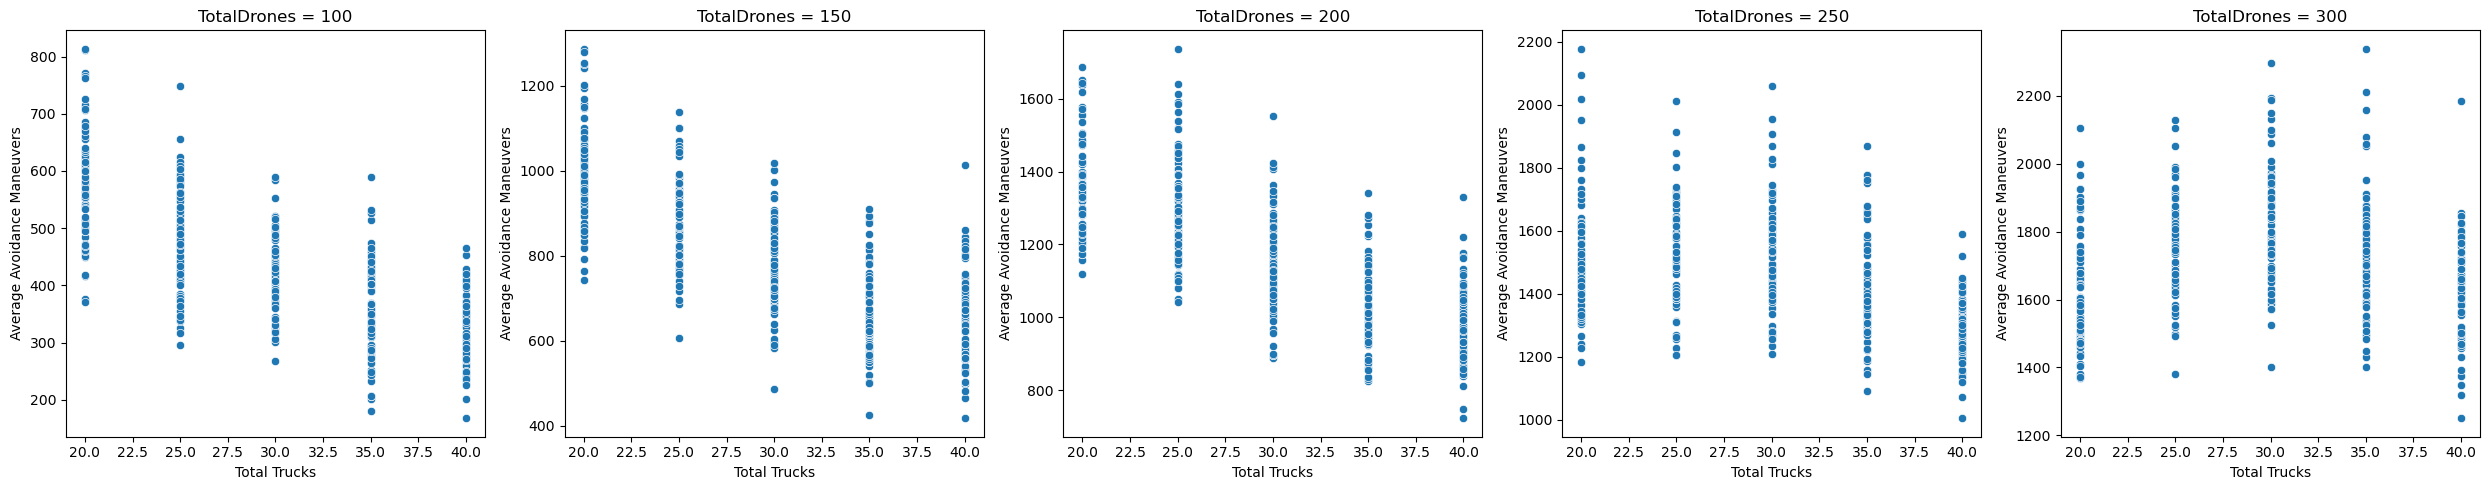

In [48]:
#scatterplot for total trucks vs. average avoidance maneuvers
scatter(simulation_results, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_AverageAvoidanceManeuvers', 
        'Method', 'Random', 'Total Trucks', 'Average Avoidance Maneuvers', 'Images/Random/RScatterTrucksAvoidance.png')

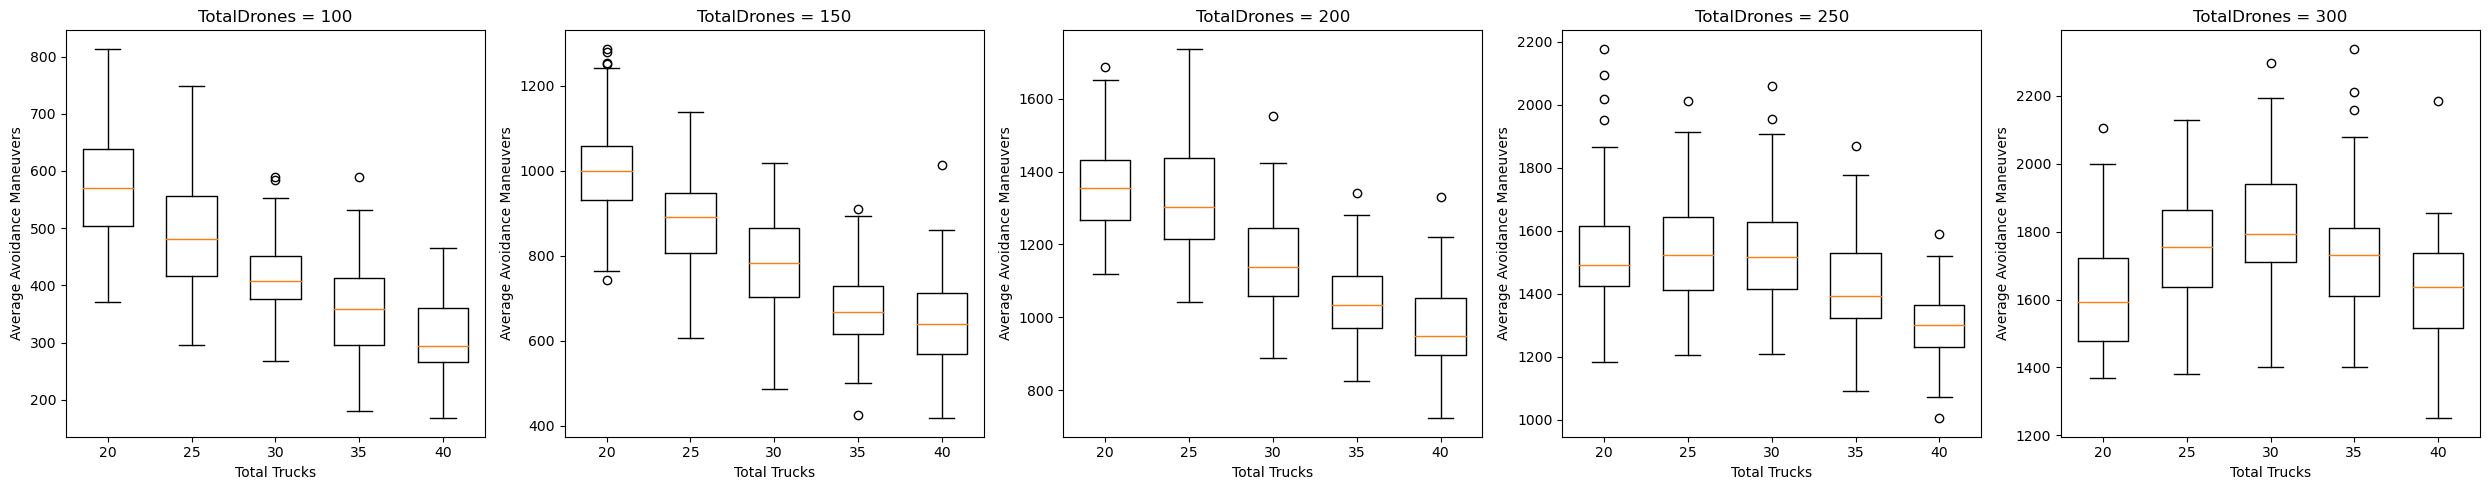

TotalDrones TotalTrucks          min          25%          50%  \
0          100          20   370.907216   503.257732   570.767677   
1          100          25   296.000000   416.536959   481.156250   
2          100          30   267.510417   375.712121   407.830000   
3          100          35   181.360000   295.409039   358.298969   
4          100          40   167.826531   266.230825   294.500000   
5          150          20   743.283688   932.451145   999.840000   
6          150          25   606.554054   806.197987   890.358621   
7          150          30   486.452703   702.933050   783.421429   
8          150          35   426.355705   615.326469   668.866667   
9          150          40   417.849315   569.345638   640.633333   
10         200          20  1119.420513  1267.746194  1355.326531   
11         200          25  1043.214286  1215.932323  1302.610000   
12         200          30   887.505000  1059.468449  1137.453125   
13         200          35   824.200000   971.653910  1032.649215   
14         200          40   722.793478   895.708436   949.290155   
15         250          20  1181.683128  1423.379439  1490.028112   
16         250          25  1205.396000  1413.134594  1522.280000   
17         250          30  1208.886555  1414.494874  1517.880851   
18         250          35  1091.808943  1324.240898  1391.634855   
19         250          40  1004.493827  1230.637943  1300.843220   
20         300          20  1368.605351  1479.170159  1592.430000   
21         300          25  1381.683099  1638.319978  1754.582492   
22         300          30  1400.142373  1710.303318  1794.298932   
23         300          35  1400.357388  1611.615772  1730.466443   
24         300          40  1250.237458  1517.597594  1636.904255   

            75%          max         mean       range         IQR  
0    638.410000   813.580000   575.383972  442.672784  135.152268  
1    555.967487   748.310000   482.769566  452.310000  139.430529  
2    451.892374   589.580000   414.311411  322.069583   76.180253  
3    412.400000   588.636364   355.543086  407.276364  116.990961  
4    360.200126   466.051546   312.420660  298.225016   93.969302  
5   1057.492215  1287.217687  1004.675848  543.933999  125.041069  
6    948.820476  1137.593333   885.364369  531.039279  142.622490  
7    865.226058  1019.527397   781.312525  533.074695  162.293008  
8    729.695638   910.846667   676.575496  484.490962  114.369169  
9    713.731036  1014.442953   649.684700  596.593638  144.385398  
10  1433.386237  1687.393782  1366.341968  567.973270  165.640043  
11  1438.148061  1737.424242  1320.915927  694.209957  222.215738  
12  1245.623037  1554.203209  1153.971128  666.698209  186.154588  
13  1114.311108  1342.155779  1042.678054  517.955779  142.657198  
14  1051.995393  1329.815000   972.242892  607.021522  156.286956  
15  1613.661616  2177.604545  1523.727919  995.921418  190.282178  
16  1642.719979  2012.544355  1534.685118  807.148355  229.585385  
17  1628.195700  2059.068670  1535.158705  850.182115  213.700826  
18  1530.797763  1869.032922  1426.679393  777.223979  206.556865  
19  1364.430482  1589.225941  1296.842162  584.732114  133.792539  
20  1723.822725  2105.165468  1619.924503  736.560116  244.652566  
21  1863.609570  2128.975694  1754.269290  747.292596  225.289593  
22  1939.417859  2296.429066  1821.223899  896.286693  229.114541  
23  1809.503818  2338.986111  1733.555533  938.628723  197.888046  
24  1737.859492  2185.856164  1632.494626  935.618706  220.261898

In [49]:
#boxplot for total drones vs. average avoidance maneuvers
boxplot(dataframe=simulation_results, control='TotalDrones', independent='TotalTrucks', dependent='SuccessfulNoBottlenecks_AverageAvoidanceManeuvers', 
                           filter_column='Method', filter_value='Random', xlabel='Total Trucks', ylabel='Average Avoidance Maneuvers', filepath='Images/Random/RBoxTrucksAvoidance')

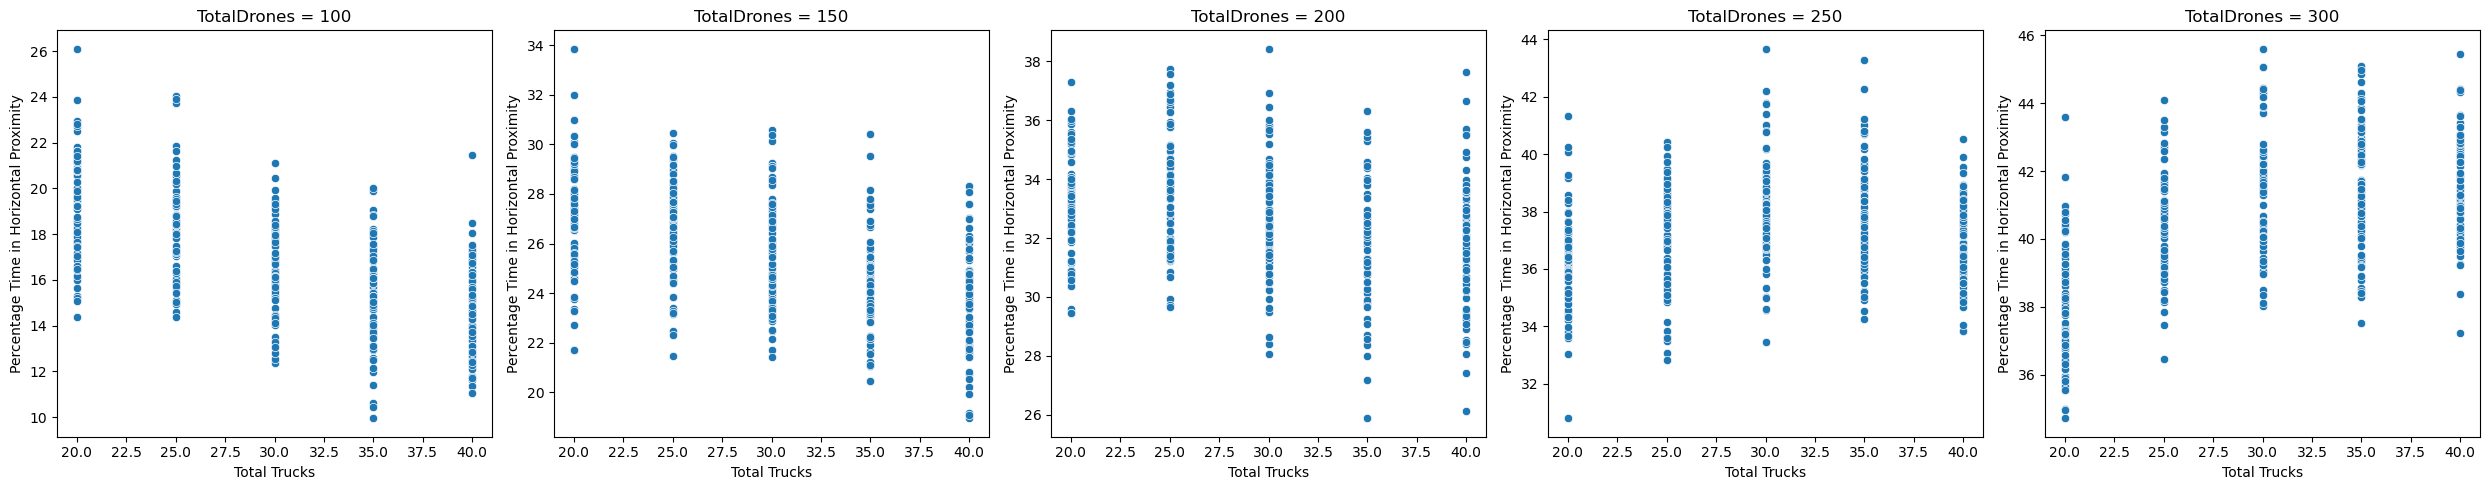

In [50]:
#scatterplot for total trucks vs. percentage time horizontal proximity
scatter(simulation_results, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity', 
        'Method', 'Random', 'Total Trucks', 'Percentage Time in Horizontal Proximity', 'Images/Random/RScatterTrucksHorizontalProximity.png')

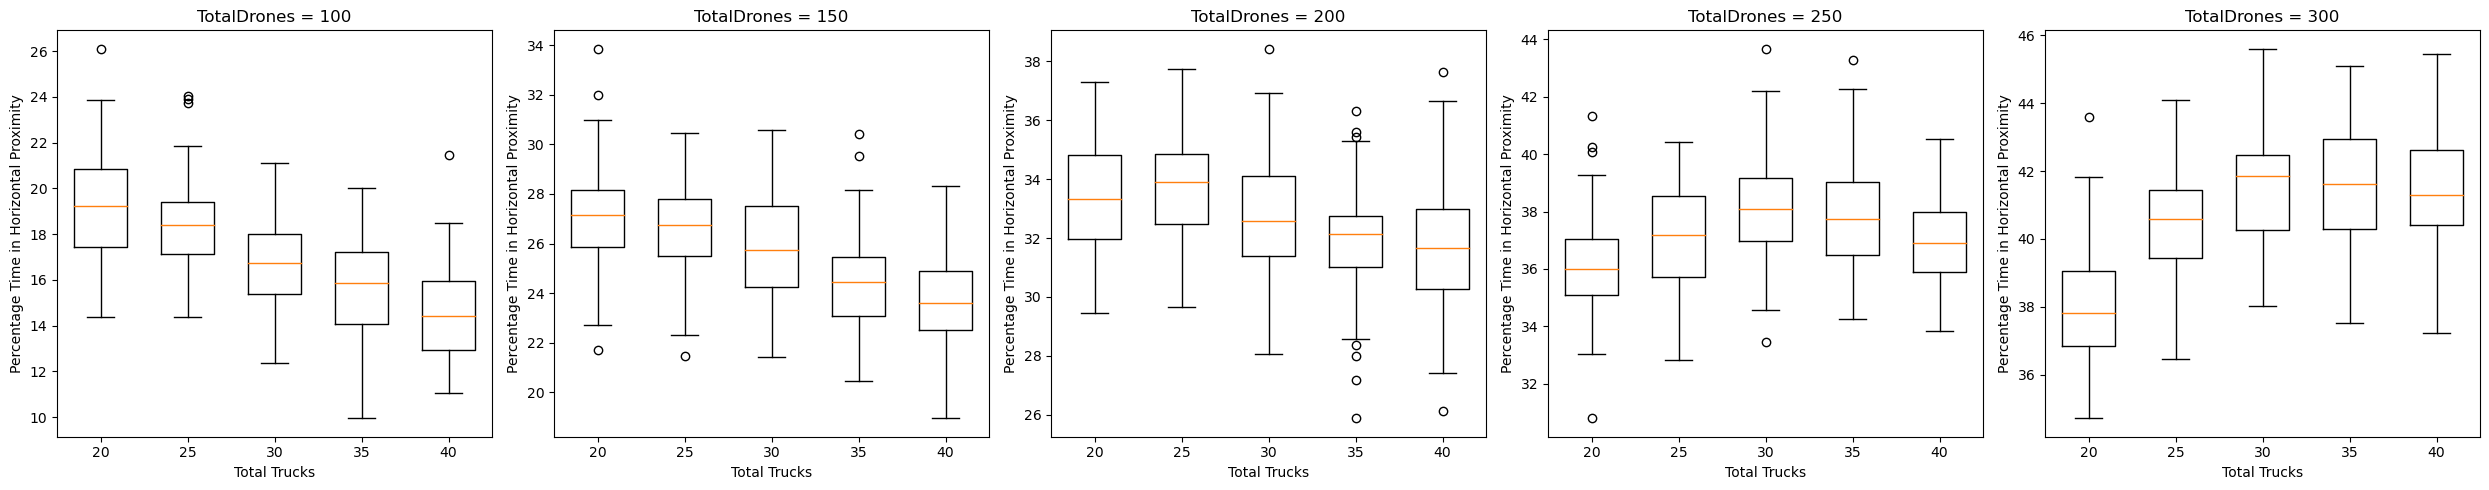

TotalDrones TotalTrucks        min        25%        50%        75%  \
0          100          20  14.387079  17.436536  19.217170  20.848645   
1          100          25  14.378535  17.131079  18.393934  19.417498   
2          100          30  12.366780  15.374106  16.742711  17.991443   
3          100          35   9.946261  14.055713  15.841430  17.202283   
4          100          40  11.063247  12.909208  14.408728  15.956669   
5          150          20  21.697128  25.868097  27.137420  28.178018   
6          150          25  21.476564  25.490477  26.765601  27.810192   
7          150          30  21.399200  24.262545  25.757602  27.517037   
8          150          35  20.450357  23.093644  24.454637  25.464318   
9          150          40  18.946550  22.488908  23.602661  24.885872   
10         200          20  29.441491  31.956755  33.331473  34.826042   
11         200          25  29.654534  32.489793  33.905587  34.846553   
12         200          30  28.067342  31.385340  32.576805  34.114536   
13         200          35  25.881383  31.031230  32.127309  32.739424   
14         200          40  26.119405  30.260511  31.655789  32.992335   
15         250          20  30.802816  35.081484  36.014039  37.051605   
16         250          25  32.829046  35.738418  37.193162  38.553218   
17         250          30  33.465584  36.983014  38.096403  39.163165   
18         250          35  34.264962  36.496251  37.740286  39.022137   
19         250          40  33.854358  35.900373  36.908568  37.974757   
20         300          20  34.715508  36.848397  37.803563  39.069225   
21         300          25  36.462401  39.446957  40.595192  41.437261   
22         300          30  38.012215  40.268223  41.854364  42.474341   
23         300          35  37.528945  40.301823  41.634760  42.935431   
24         300          40  37.230852  40.414923  41.285146  42.629558   

          max       mean      range       IQR  
0   26.098590  19.133625  11.711510  3.412110  
1   24.024022  18.299852   9.645486  2.286419  
2   21.110162  16.643664   8.743382  2.617337  
3   20.003517  15.521214  10.057256  3.146571  
4   21.436473  14.528744  10.373226  3.047461  
5   33.858675  27.171222  12.161547  2.309921  
6   30.464268  26.612950   8.987703  2.319716  
7   30.577666  25.786126   9.178466  3.254492  
8   30.405408  24.496804   9.955052  2.370674  
9   28.309770  23.669718   9.363219  2.396964  
10  37.280165  33.230429   7.838674  2.869287  
11  37.722591  33.801388   8.068057  2.356760  
12  38.422941  32.707074  10.355599  2.729196  
13  36.300319  31.840436  10.418937  1.708194  
14  37.645353  31.708610  11.525948  2.731824  
15  41.321026  36.160532  10.518210  1.970120  
16  40.405300  37.122441   7.576254  2.814800  
17  43.667429  38.173468  10.201845  2.180152  
18  43.285138  37.850182   9.020177  2.525886  
19  40.525239  36.938362   6.670881  2.074383  
20  43.587638  37.988336   8.872130  2.220828  
21  44.100466  40.453199   7.638065  1.990304  
22  45.605071  41.612218   7.592856  2.206118  
23  45.087558  41.649781   7.558613  2.633609  
24  45.439053  41.537168   8.208201  2.214635

In [51]:
#boxplot for total drones vs. percentage time horizontal proximity
boxplot(dataframe=simulation_results, control='TotalDrones', independent='TotalTrucks', dependent='SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity', 
                           filter_column='Method', filter_value='Random', xlabel='Total Trucks', ylabel='Percentage Time in Horizontal Proximity', filepath='Images/Random/RBoxTrucksHorizontalProximity')

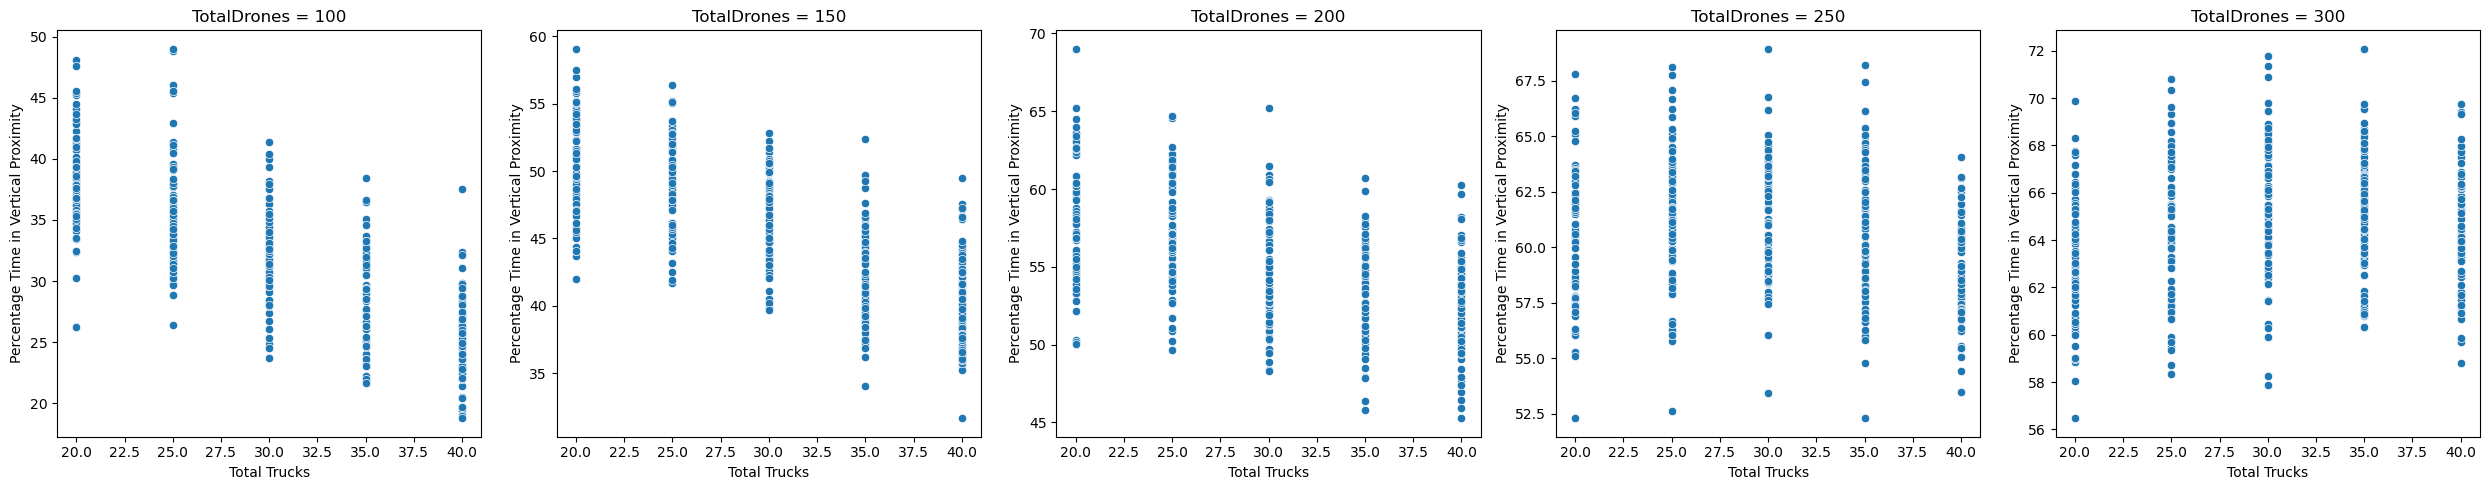

In [52]:
#scatterplot for total trucks vs. percentage time vertial proximity
scatter(simulation_results, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_PercentageTimeVerticalProximity', 
        'Method', 'Random', 'Total Trucks', 'Percentage Time in Vertical Proximity', 'Images/Random/RScatterTrucksVerticalProximity.png')

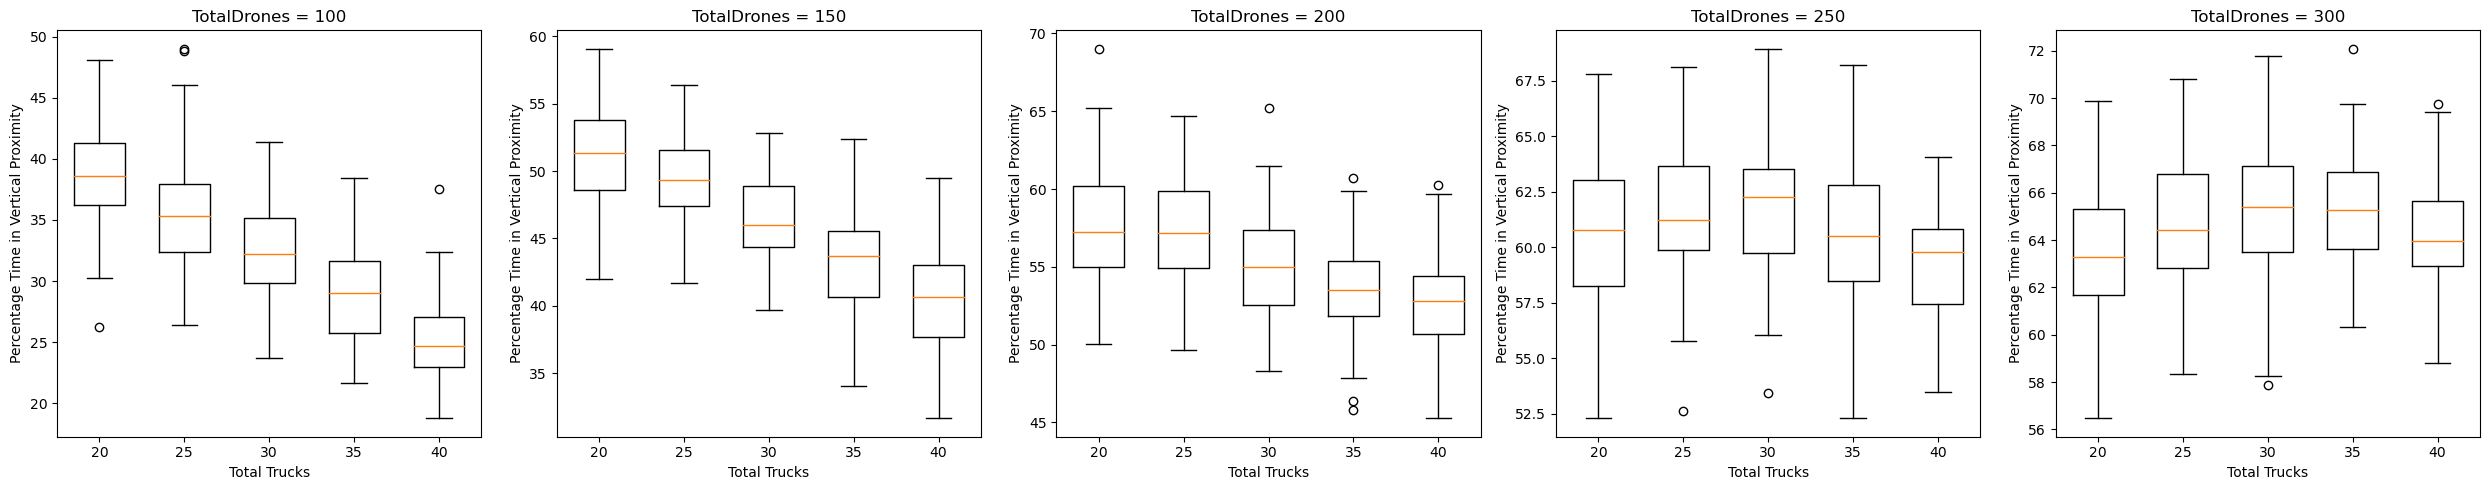

TotalDrones TotalTrucks        min        25%        50%        75%  \
0          100          20  26.231445  36.197218  38.589593  41.298400   
1          100          25  26.373141  32.378868  35.329820  37.942168   
2          100          30  23.741315  29.854779  32.218740  35.138236   
3          100          35  21.662151  25.720149  28.998434  31.647907   
4          100          40  18.774421  22.966776  24.670888  27.055227   
5          150          20  41.967594  48.616859  51.354136  53.820808   
6          150          25  41.731024  47.411051  49.330586  51.582413   
7          150          30  39.664867  44.398633  46.007246  48.903752   
8          150          35  34.077079  40.657589  43.668232  45.525697   
9          150          40  31.663795  37.724968  40.625176  43.007793   
10         200          20  50.037243  54.964382  57.234762  60.195545   
11         200          25  49.667389  54.932668  57.195431  59.842420   
12         200          30  48.292400  52.551016  55.015233  57.393702   
13         200          35  45.816291  51.851334  53.538760  55.356376   
14         200          40  45.268226  50.711168  52.826190  54.408794   
15         250          20  52.286920  58.228225  60.774773  63.025865   
16         250          25  52.594318  59.889805  61.242053  63.666670   
17         250          30  53.408069  59.738959  62.275596  63.522797   
18         250          35  52.306415  58.454825  60.498747  62.782854   
19         250          40  53.454310  57.447308  59.786124  60.797159   
20         300          20  56.470526  61.681429  63.293145  65.321729   
21         300          25  58.334663  62.840905  64.425033  66.814755   
22         300          30  57.863193  63.477858  65.386831  67.151831   
23         300          35  60.307751  63.622580  65.252233  66.881716   
24         300          40  58.816273  62.902517  63.960107  65.640613   

          max       mean      range       IQR  
0   48.071476  38.753518  21.840031  5.101183  
1   49.006882  35.628896  22.633740  5.563299  
2   41.350304  32.311417  17.608988  5.283457  
3   38.416945  28.760016  16.754794  5.927758  
4   37.495826  25.074437  18.721406  4.088452  
5   59.068736  50.933450  17.101142  5.203949  
6   56.357604  49.189189  14.626581  4.171362  
7   52.851193  46.467340  13.186327  4.505119  
8   52.383949  43.017025  18.306869  4.868108  
9   49.503452  40.589361  17.839657  5.282825  
10  69.010107  57.835343  18.972864  5.231162  
11  64.686947  57.332848  15.019558  4.909752  
12  65.196723  55.003768  16.904323  4.842686  
13  60.687183  53.465407  14.870893  3.505041  
14  60.237166  52.499658  14.968940  3.697626  
15  67.797681  60.710016  15.510761  4.797640  
16  68.142497  61.490724  15.548179  3.776865  
17  68.941280  61.709348  15.533211  3.783838  
18  68.194080  60.700470  15.887665  4.328029  
19  64.061506  59.196279  10.607197  3.349850  
20  69.897166  63.376847  13.426640  3.640300  
21  70.822789  64.572607  12.488126  3.973850  
22  71.798566  65.302370  13.935373  3.673973  
23  72.084952  65.278606  11.777202  3.259137  
24  69.765023  64.151711  10.948751  2.738096

In [53]:
#boxplot for total drones vs. percentage time vertical proximity
boxplot(dataframe=simulation_results, control='TotalDrones', independent='TotalTrucks', dependent='SuccessfulNoBottlenecks_PercentageTimeVerticalProximity', 
                           filter_column='Method', filter_value='Random', xlabel='Total Trucks', ylabel='Percentage Time in Vertical Proximity', filepath='Images/Random/RBoxTrucksVerticalProximity')

**4a. Heatmap (filter = KMeans)**

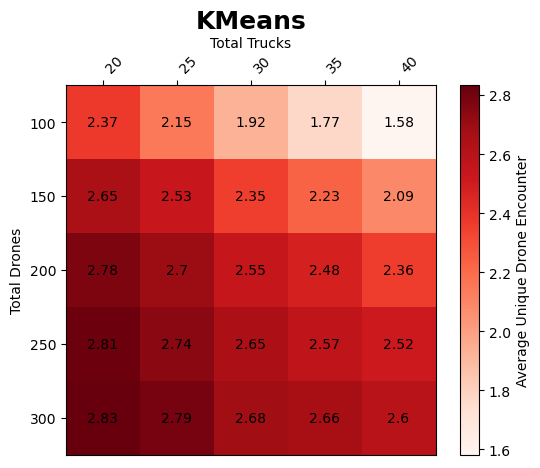

In [55]:
#average unique drone encounter
heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_AverageUniqueDroneEncounter', 'Method',
        'KMeans', 'Reds', 'nearest', 'Total Trucks', 'Total Drones', 'Average Unique Drone Encounter', 'Images/KMeans/KHeatUniqueEncounters.png')

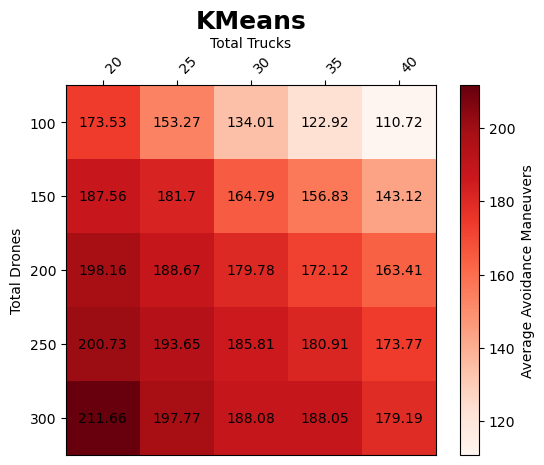

In [56]:
#average avoidance maneuvers
heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_AverageAvoidanceManeuvers', 'Method',
        'KMeans', 'Reds', 'nearest', 'Total Trucks', 'Total Drones', 'Average Avoidance Maneuvers', 'Images/KMeans/KHeatAvoidance.png')

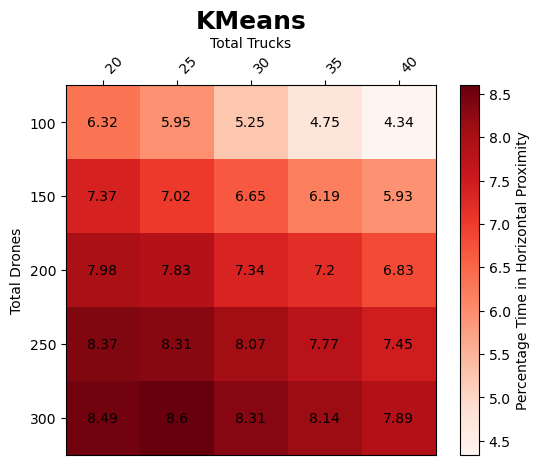

In [57]:
#percentage time horizontal proximity
heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity', 'Method',
        'KMeans', 'Reds', 'nearest', 'Total Trucks', 'Total Drones', 'Percentage Time in Horizontal Proximity', 'Images/KMeans/KHeatHorizontalProximity.png')

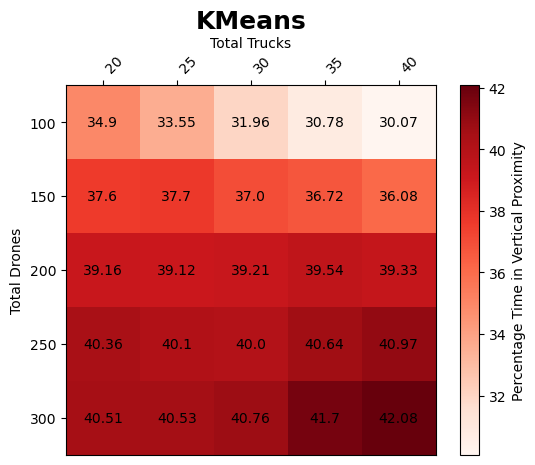

In [58]:
#percentage time vertical proximity
heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_PercentageTimeVerticalProximity', 'Method',
        'KMeans', 'Reds', 'nearest', 'Total Trucks', 'Total Drones', 'Percentage Time in Vertical Proximity', 'Images/KMeans/KHeatVerticalProximity.png')

**4b. Heatmap (filter = Random)**

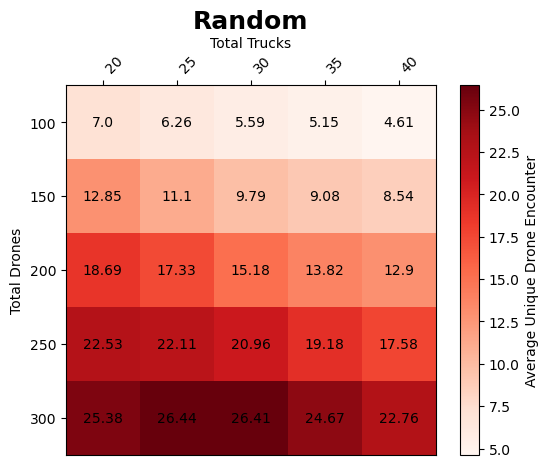

In [60]:
#average unique drone encounter
heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_AverageUniqueDroneEncounter', 'Method',
        'Random', 'Reds', 'nearest', 'Total Trucks', 'Total Drones', 'Average Unique Drone Encounter', 'Images/Random/RHeatUniqueEncounters.png')

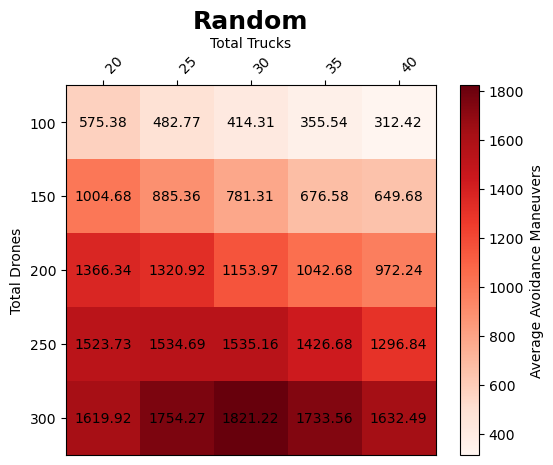

In [61]:
#average avoidance maneuvers
heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_AverageAvoidanceManeuvers', 'Method',
        'Random', 'Reds', 'nearest', 'Total Trucks', 'Total Drones', 'Average Avoidance Maneuvers', 'Images/Random/RHeatAvoidance.png')

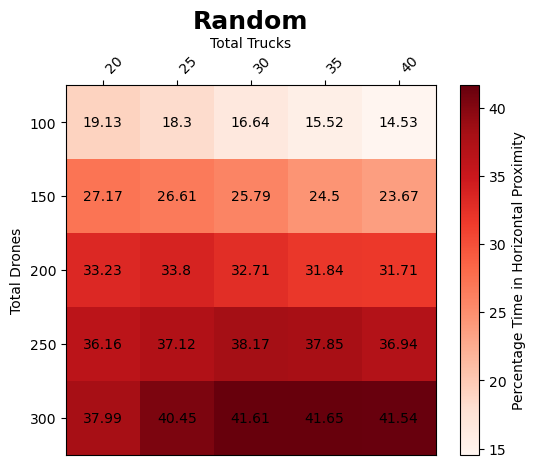

In [62]:
#percentage time horizontal proximity
heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity', 'Method',
        'Random', 'Reds', 'nearest', 'Total Trucks', 'Total Drones', 'Percentage Time in Horizontal Proximity', 'Images/Random/RHeatHorizontalProximity.png')

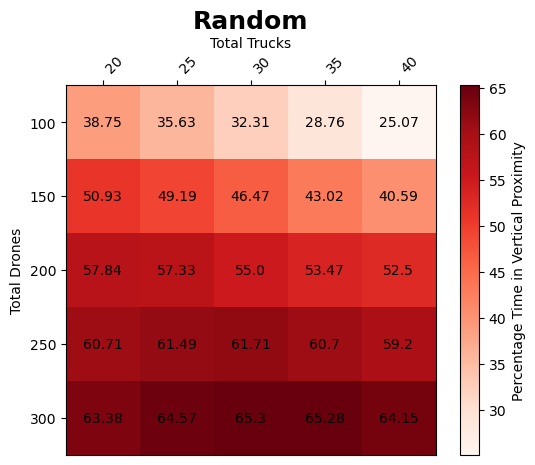

In [63]:
#percentage time vertical proximity
heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_PercentageTimeVerticalProximity', 'Method',
        'Random', 'Reds', 'nearest', 'Total Trucks', 'Total Drones', 'Percentage Time in Vertical Proximity', 'Images/Random/RHeatVerticalProximity.png')

**4c. Heatmap (Combined)**

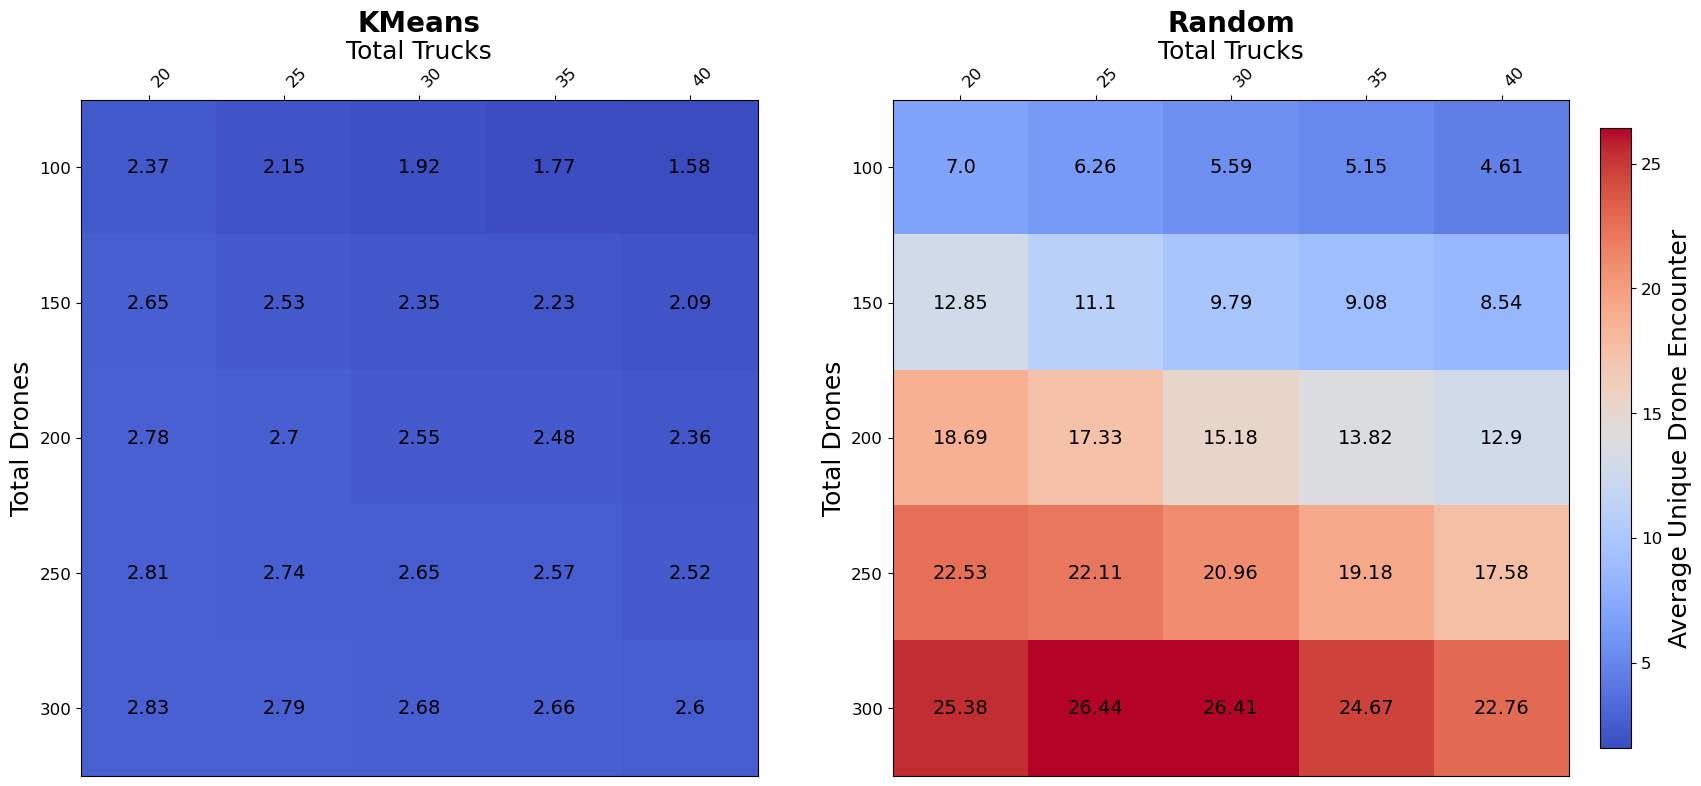

In [65]:
#average unique drone encounter
combined_heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_AverageUniqueDroneEncounter', 'Method',
                 'KMeans', 'Random', 'coolwarm', 'nearest', 'Total Trucks', 'Total Drones', 'Average Unique Drone Encounter', 'Images/Others/CombinedHeatUniqueEncounters.png')

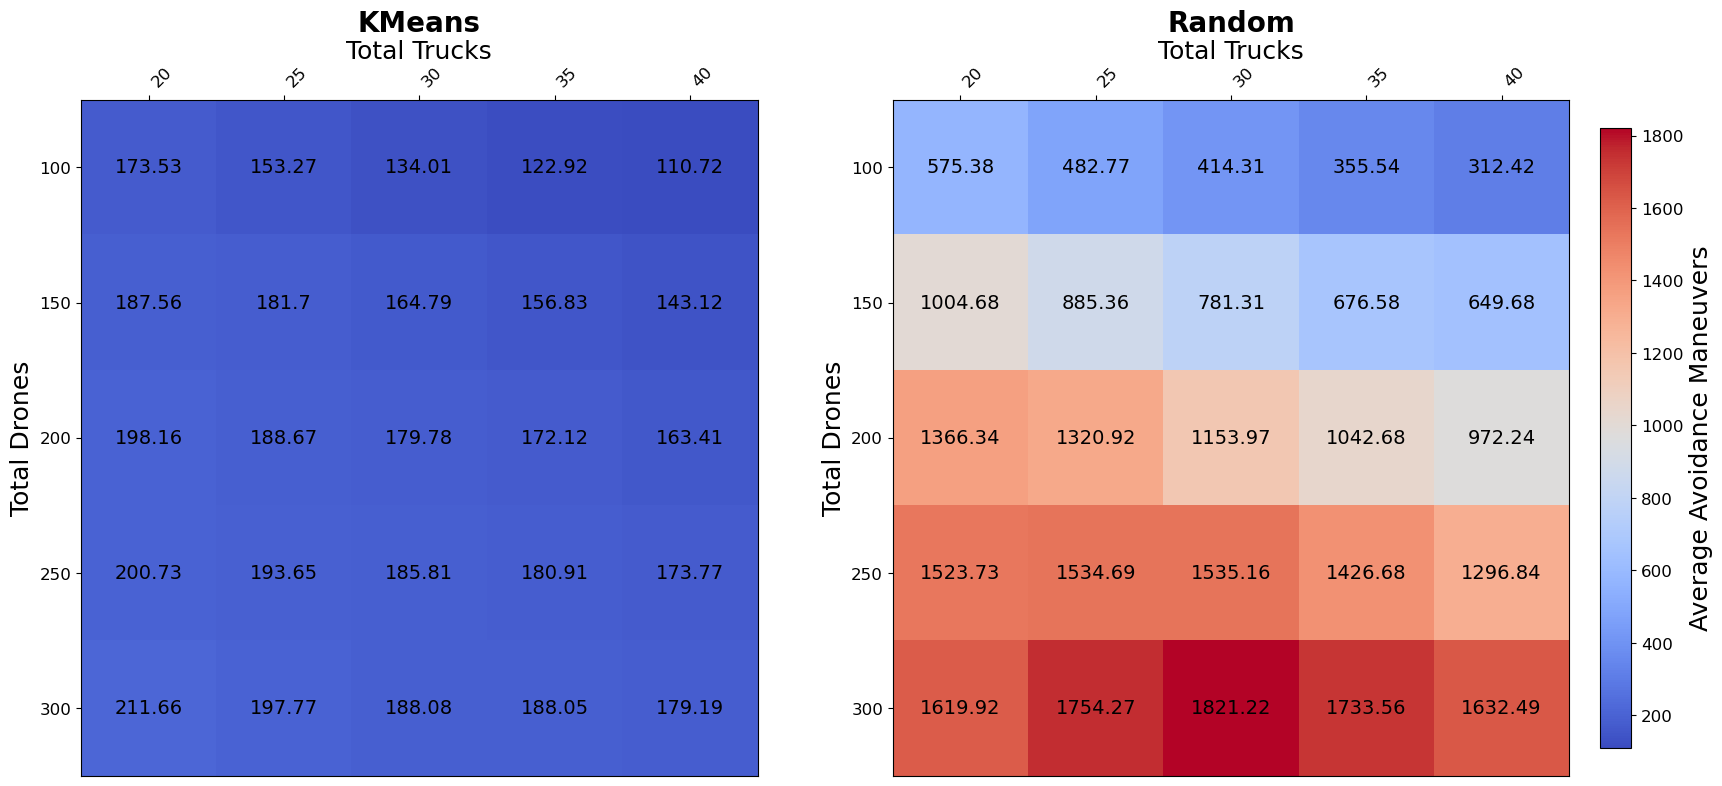

In [66]:
#average avoidance maneuvers
combined_heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_AverageAvoidanceManeuvers', 'Method',
                 'KMeans', 'Random', 'coolwarm', 'nearest', 'Total Trucks', 'Total Drones', 'Average Avoidance Maneuvers', 'Images/Others/CombinedHeatAvoidance.png')

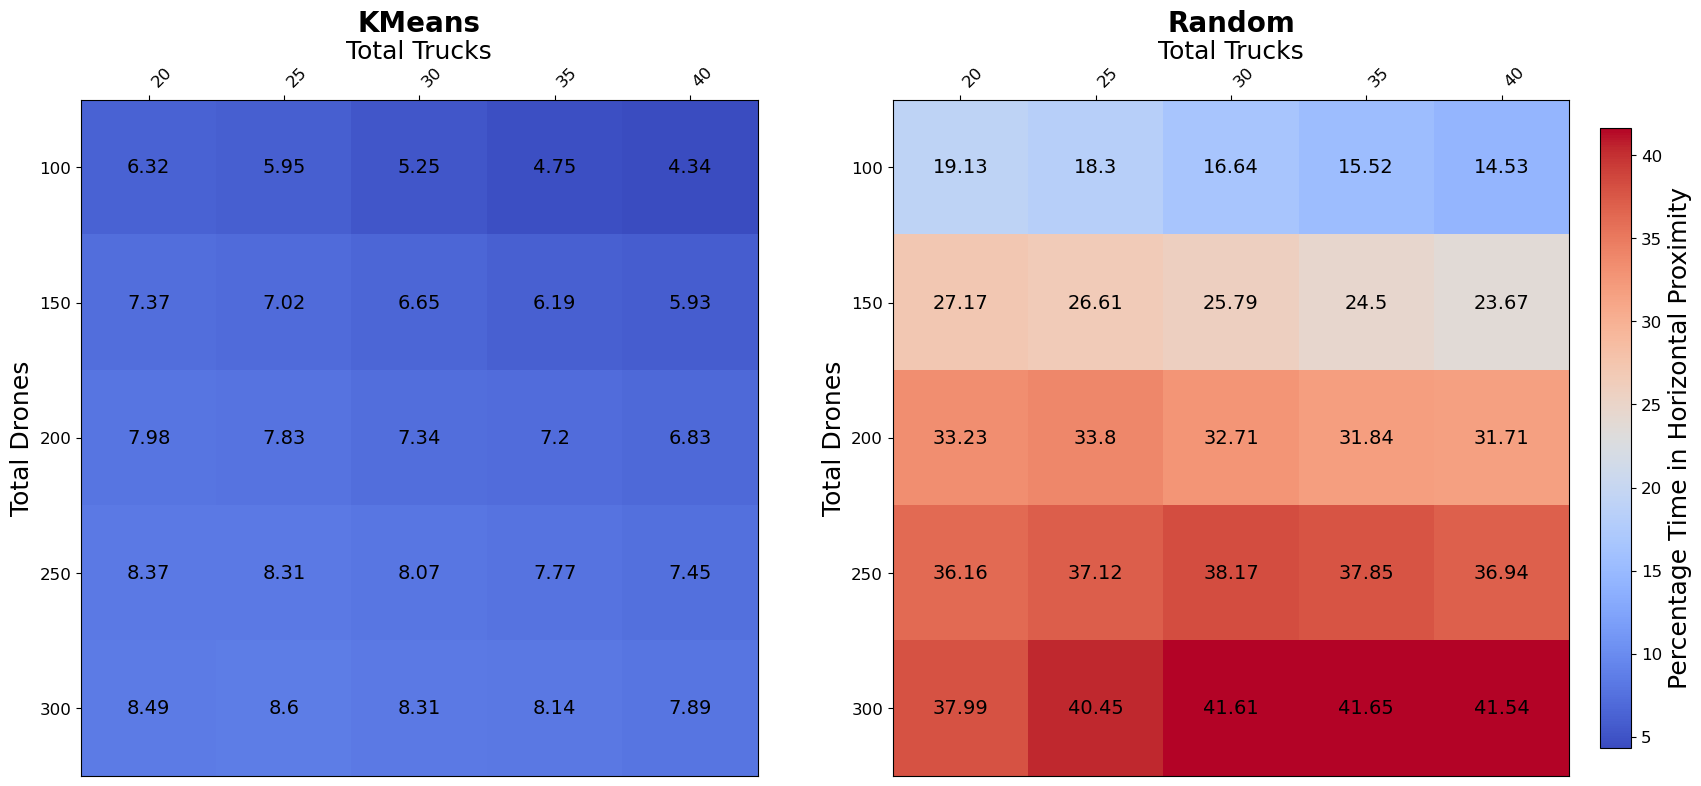

In [67]:
#percentage time horizontal proximity
combined_heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity', 'Method',
                 'KMeans', 'Random', 'coolwarm', 'nearest', 'Total Trucks', 'Total Drones', 'Percentage Time in Horizontal Proximity', 'Images/Others/CombinedHeatHorizontalProximity.png')

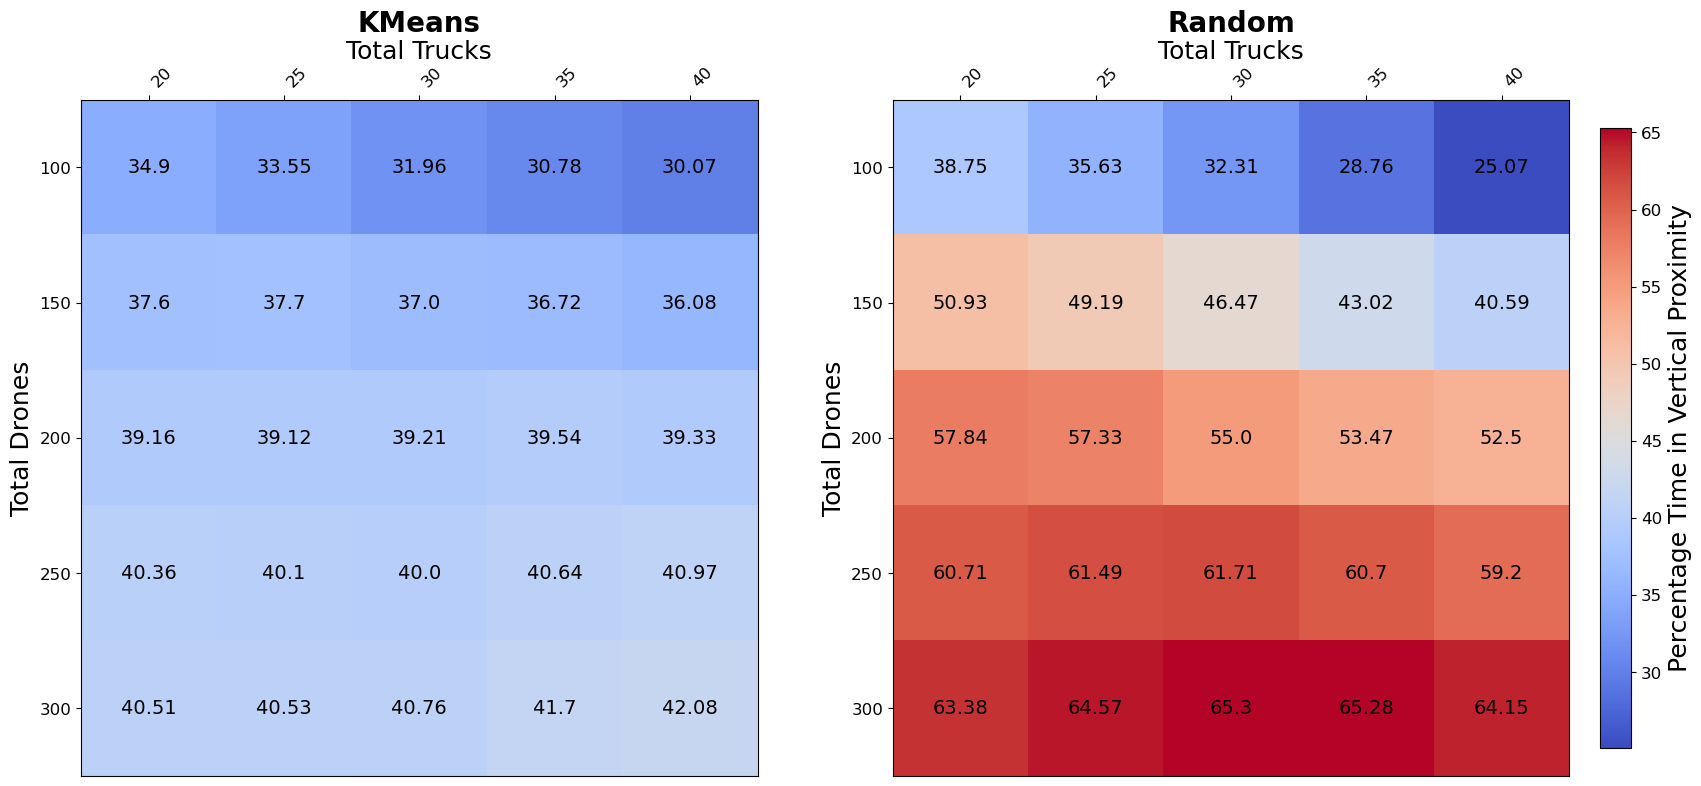

In [68]:
#percentage time vertical proximity
combined_heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_PercentageTimeVerticalProximity', 'Method',
                 'KMeans', 'Random', 'coolwarm', 'nearest', 'Total Trucks', 'Total Drones', 'Percentage Time in Vertical Proximity', 'Images/Others/CombinedHeatVerticalProximity.png')

**5. APF**

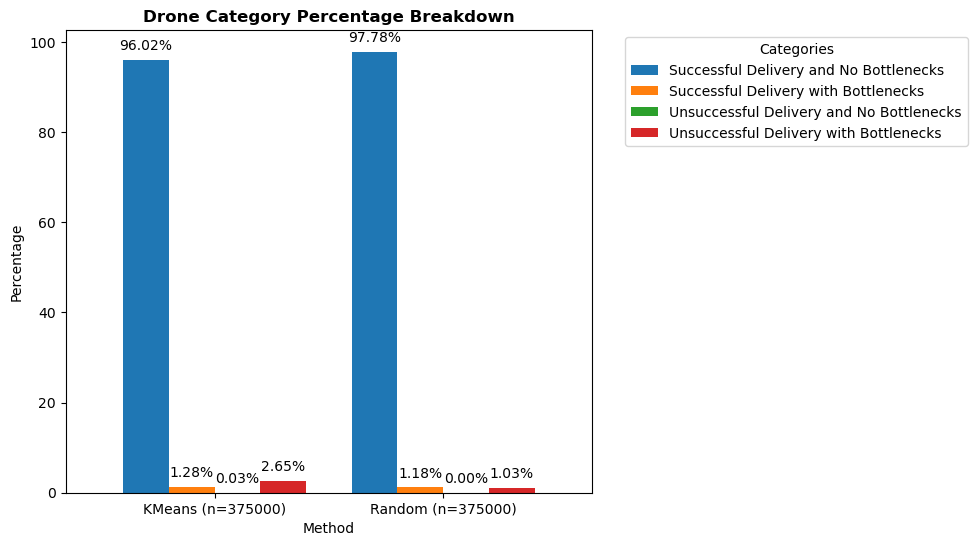

In [70]:
#filter the DataFrame for 'KMeans' or 'Random' methods
filtered_df = simulation_results[simulation_results['Method'].isin(['KMeans', 'Random'])]

#select the relevant columns for plotting
columns_to_plot = ['SuccessfulNoBottlenecks_Percentage', 'SuccessfulBottlenecks_Percentage',
                   'UnsuccessfulNoBottlenecks_Percentage', 'UnsuccessfulBottlenecks_Percentage']

#average the data
aggregated_df = filtered_df.groupby('Method')[columns_to_plot].mean().reset_index()

#rename the columns for better readability
renamed_columns = {
    'SuccessfulNoBottlenecks_Percentage': 'Successful Delivery and No Bottlenecks',
    'SuccessfulBottlenecks_Percentage': 'Successful Delivery with Bottlenecks',
    'UnsuccessfulNoBottlenecks_Percentage': 'Unsuccessful Delivery and No Bottlenecks',
    'UnsuccessfulBottlenecks_Percentage': 'Unsuccessful Delivery with Bottlenecks'
}
aggregated_df.rename(columns=renamed_columns, inplace=True)

#create the bar graph
bar_width = 0.8
fig, ax = plt.subplots(figsize=(10, 6))
aggregated_df.plot(kind='bar', x='Method', y=list(renamed_columns.values()), ax=ax, width=bar_width)

#customise the plot
plt.title('Drone Category Percentage Breakdown', fontweight="bold")
plt.xlabel('Method')
plt.ylabel('Percentage')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# set x-axis tick labels to be straight and manually include the counts
new_labels = ["KMeans (n=375000)", "Random (n=375000)"]
ax.set_xticklabels(new_labels, rotation=0)

#annotate each bar with the percentage value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

#save the plot
filepath = 'Images/Others/drone_category_percentage_breakdown.png'
plt.savefig(filepath, bbox_inches='tight')

#show the plot
plt.show()

**5a. APF (filter = KMeans)**

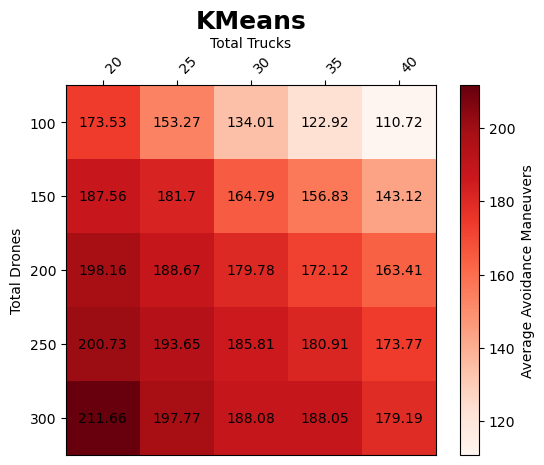

In [72]:
#average avoidance maneuvers
heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_AverageAvoidanceManeuvers', 'Method',
        'KMeans', 'Reds', 'nearest', 'Total Trucks', 'Total Drones', 'Average Avoidance Maneuvers', 'Images/KMeans/KHeatAvoidance.png')

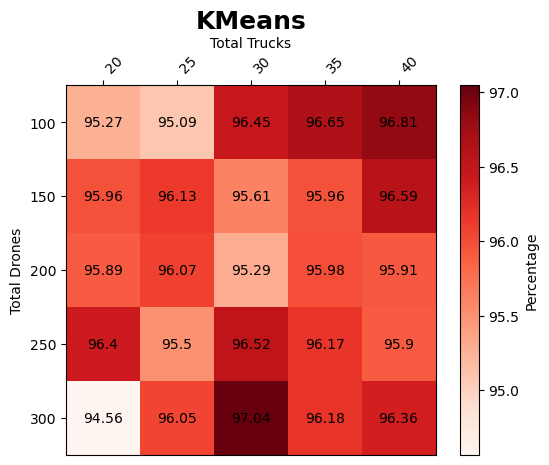

In [73]:
#successfulnobottleneck
heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_Percentage', 'Method',
        'KMeans', 'Reds', 'nearest', 'Total Trucks', 'Total Drones', 'Percentage', 'Images/KMeans/KHeatSuccessfulNoBottlenecks_Percentage.png')

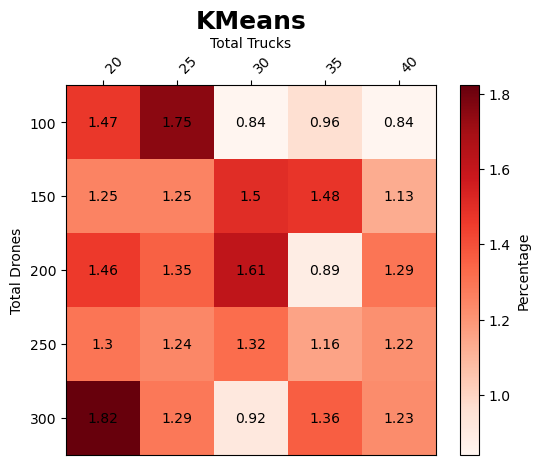

In [74]:
#successfulbottleneck
heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'SuccessfulBottlenecks_Percentage', 'Method',
        'KMeans', 'Reds', 'nearest', 'Total Trucks', 'Total Drones', 'Percentage', 'Images/KMeans/KHeatSuccessfulBottlenecks_Percentage.png')

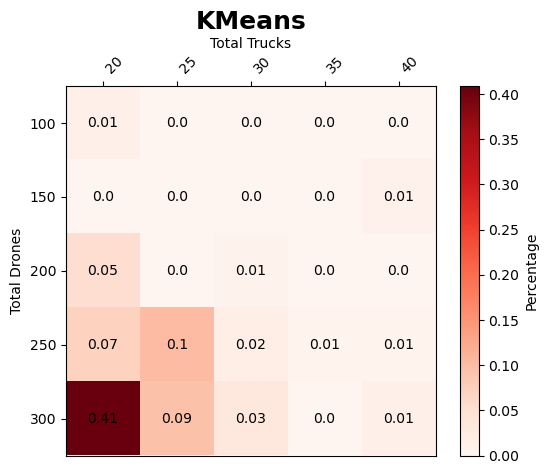

In [75]:
#unsuccessfulnobottleneck
heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'UnsuccessfulNoBottlenecks_Percentage', 'Method',
        'KMeans', 'Reds', 'nearest', 'Total Trucks', 'Total Drones', 'Percentage', 'Images/KMeans/KHeatUnsuccessfulNoBottlenecks_Percentage.png')

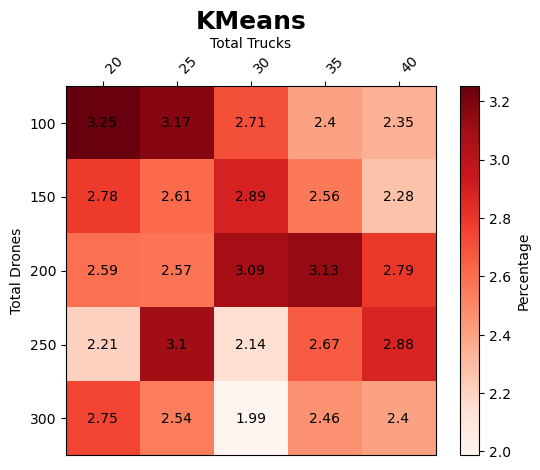

In [76]:
#unsuccessfulbottleneck
heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'UnsuccessfulBottlenecks_Percentage', 'Method',
        'KMeans', 'Reds', 'nearest', 'Total Trucks', 'Total Drones', 'Percentage', 'Images/KMeans/KHeatUnsuccessfulBottlenecks_Percentage.png')

**5b. APF (filter = Random)**

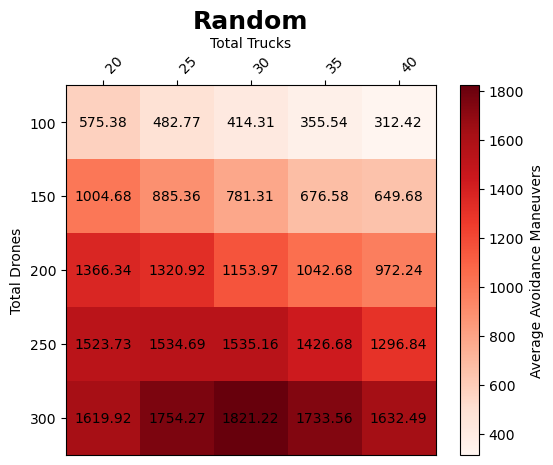

In [78]:
#average avoidance maneuvers
heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_AverageAvoidanceManeuvers', 'Method',
        'Random', 'Reds', 'nearest', 'Total Trucks', 'Total Drones', 'Average Avoidance Maneuvers', 'Images/Random/RHeatAvoidance.png')

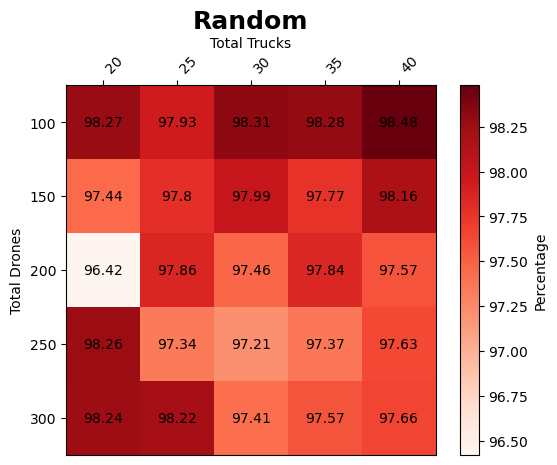

In [79]:
#successfulnobottleneck
heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'SuccessfulNoBottlenecks_Percentage', 'Method',
        'Random', 'Reds', 'nearest', 'Total Trucks', 'Total Drones', 'Percentage', 'Images/Random/RHeatSuccessfulNoBottlenecks_Percentage.png')

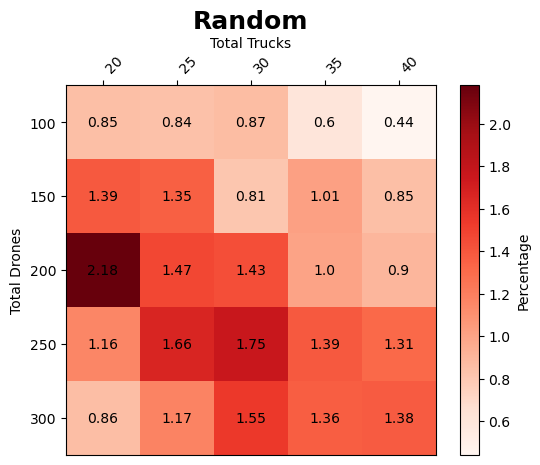

In [80]:
#successfulbottleneck
heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'SuccessfulBottlenecks_Percentage', 'Method',
        'Random', 'Reds', 'nearest', 'Total Trucks', 'Total Drones', 'Percentage', 'Images/Random/RHeatSuccessfulBottlenecks_Percentage.png')

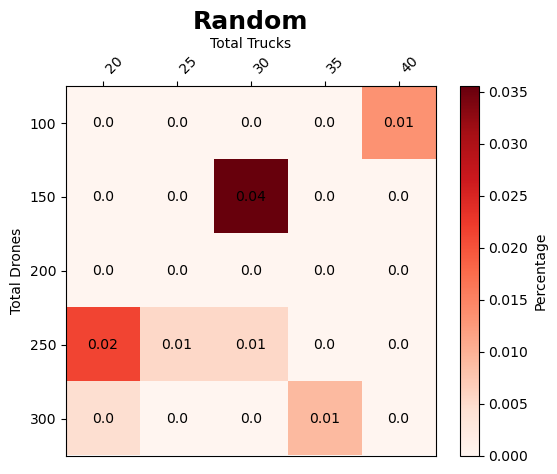

In [81]:
#unsuccessfulnobottleneck
heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'UnsuccessfulNoBottlenecks_Percentage', 'Method',
        'Random', 'Reds', 'nearest', 'Total Trucks', 'Total Drones', 'Percentage', 'Images/Random/RHeatUnsuccessfulNoBottlenecks_Percentage.png')

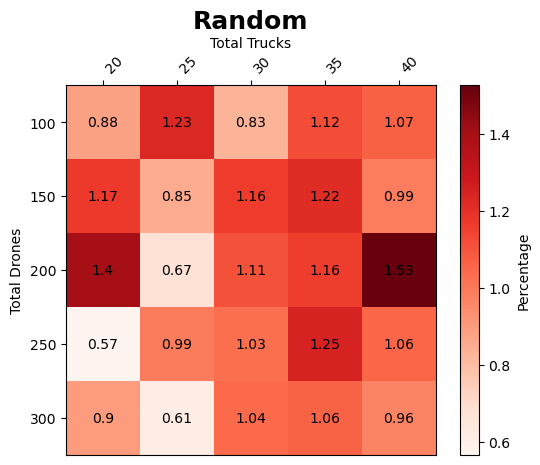

In [82]:
#unsuccessfulbottleneck
heatmap(simulation_results_avg, 'TotalDrones', 'TotalTrucks', 'UnsuccessfulBottlenecks_Percentage', 'Method',
        'Random', 'Reds', 'nearest', 'Total Trucks', 'Total Drones', 'Percentage', 'Images/Random/RHeatUnsuccessfulBottlenecks_Percentage.png')

**6a. Regression - VIF**

In [84]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

In [85]:
#list of columns to keep
columns_to_keep = [
    'SuccessfulNoBottlenecks_AverageUniqueDroneEncounter', 
    'SuccessfulNoBottlenecks_AverageAvoidanceManeuvers', 
    'SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity', 
    'SuccessfulNoBottlenecks_PercentageTimeVerticalProximity', 
    'TotalDrones', 
    'TotalTrucks', 
    'Method'
]

#filter the DataFrame to keep only the specified columns
filtered_df = simulation_results.filter(items=columns_to_keep)

#create variables_kmeans where Method='KMeans'
variables_kmeans = filtered_df[filtered_df['Method'] == 'KMeans']

#create variables_random where Method='Random'
variables_random = filtered_df[filtered_df['Method'] == 'Random']

#drop the 'Method' column as it's no longer needed
variables_kmeans = variables_kmeans.drop(columns=['Method'])
variables_random = variables_random.drop(columns=['Method'])

In [86]:
#rename variables
variables_kmeans = variables_kmeans.rename(columns={
    'SuccessfulNoBottlenecks_AverageUniqueDroneEncounter': 'Average Unique Drone Encounter',
    'SuccessfulNoBottlenecks_AverageAvoidanceManeuvers': 'Average Avoidance Maneuvers',
    'SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity': '% Time in Horizontal Proximity',
    'SuccessfulNoBottlenecks_PercentageTimeVerticalProximity': '% Time in Vertical Proximity',
    'TotalDrones': 'Total Drones',
    'TotalTrucks': 'Total Trucks'
})

variables_random = variables_random.rename(columns={
    'SuccessfulNoBottlenecks_AverageUniqueDroneEncounter': 'Average Unique Drone Encounter',
    'SuccessfulNoBottlenecks_AverageAvoidanceManeuvers': 'Average Avoidance Maneuvers',
    'SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity': '% Time in Horizontal Proximity',
    'SuccessfulNoBottlenecks_PercentageTimeVerticalProximity': '% Time in Vertical Proximity',
    'TotalDrones': 'Total Drones',
    'TotalTrucks': 'Total Trucks'
})

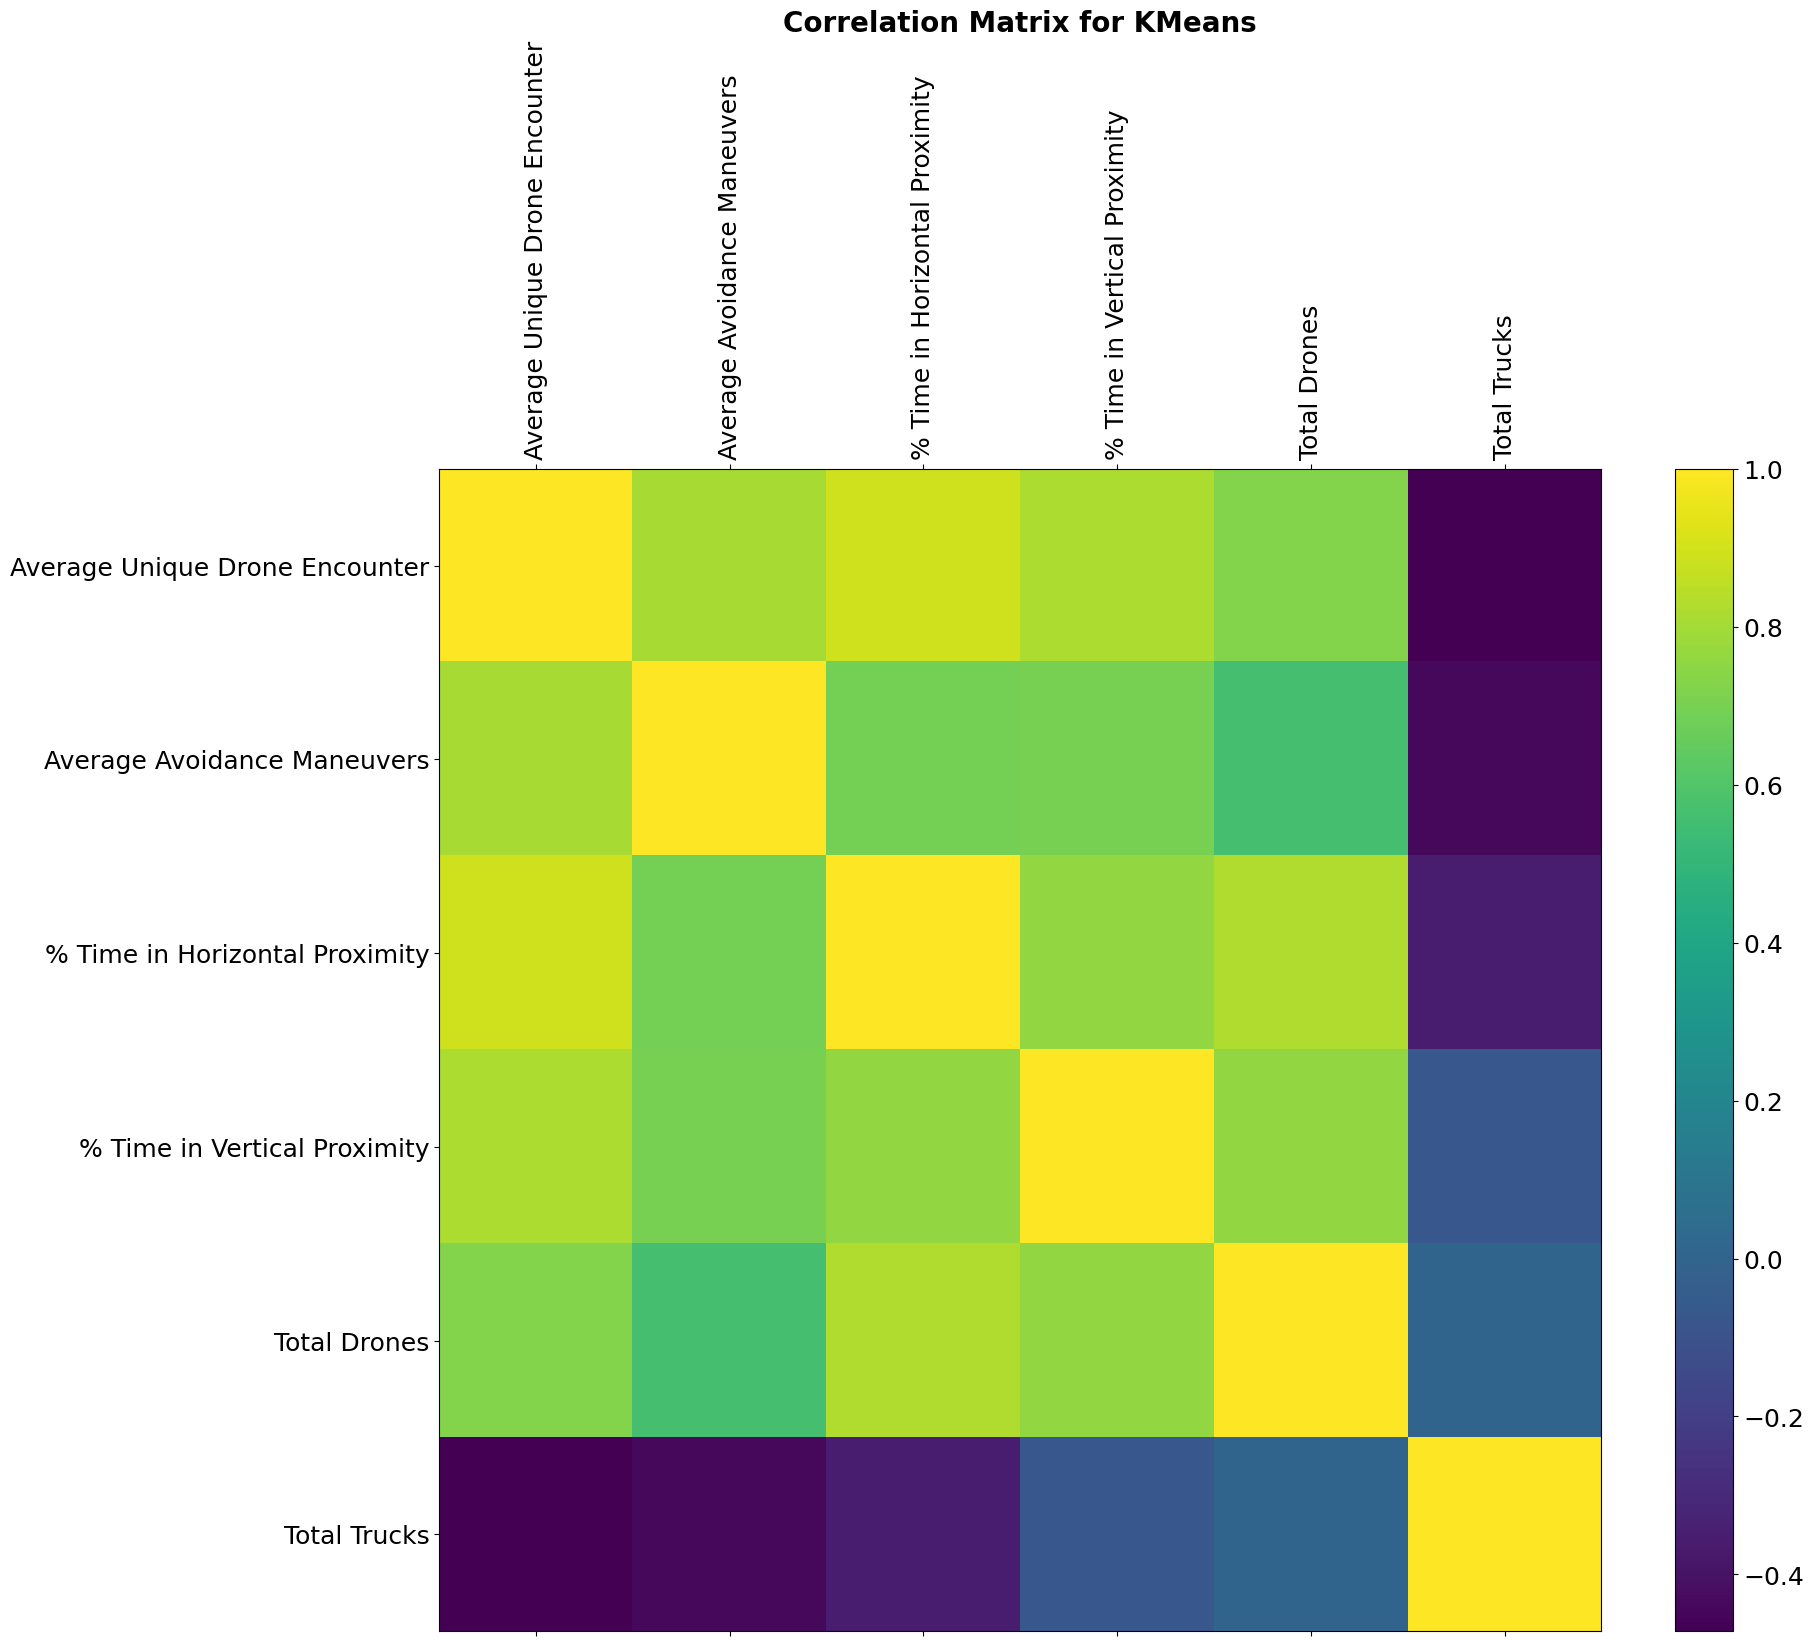

In [87]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(variables_kmeans.corr(), fignum=f.number)
plt.xticks(range(variables_kmeans.shape[1]), variables_kmeans.columns, fontsize=18, rotation=90)
plt.yticks(range(variables_kmeans.shape[1]), variables_kmeans.columns, fontsize=18)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
plt.title('Correlation Matrix for KMeans', fontsize=20, fontweight="bold")

#save the plot as a PNG file
plt.savefig('Images/KMeans/Kcorrelation_matrix.png', bbox_inches='tight')

#show the plot
plt.show()

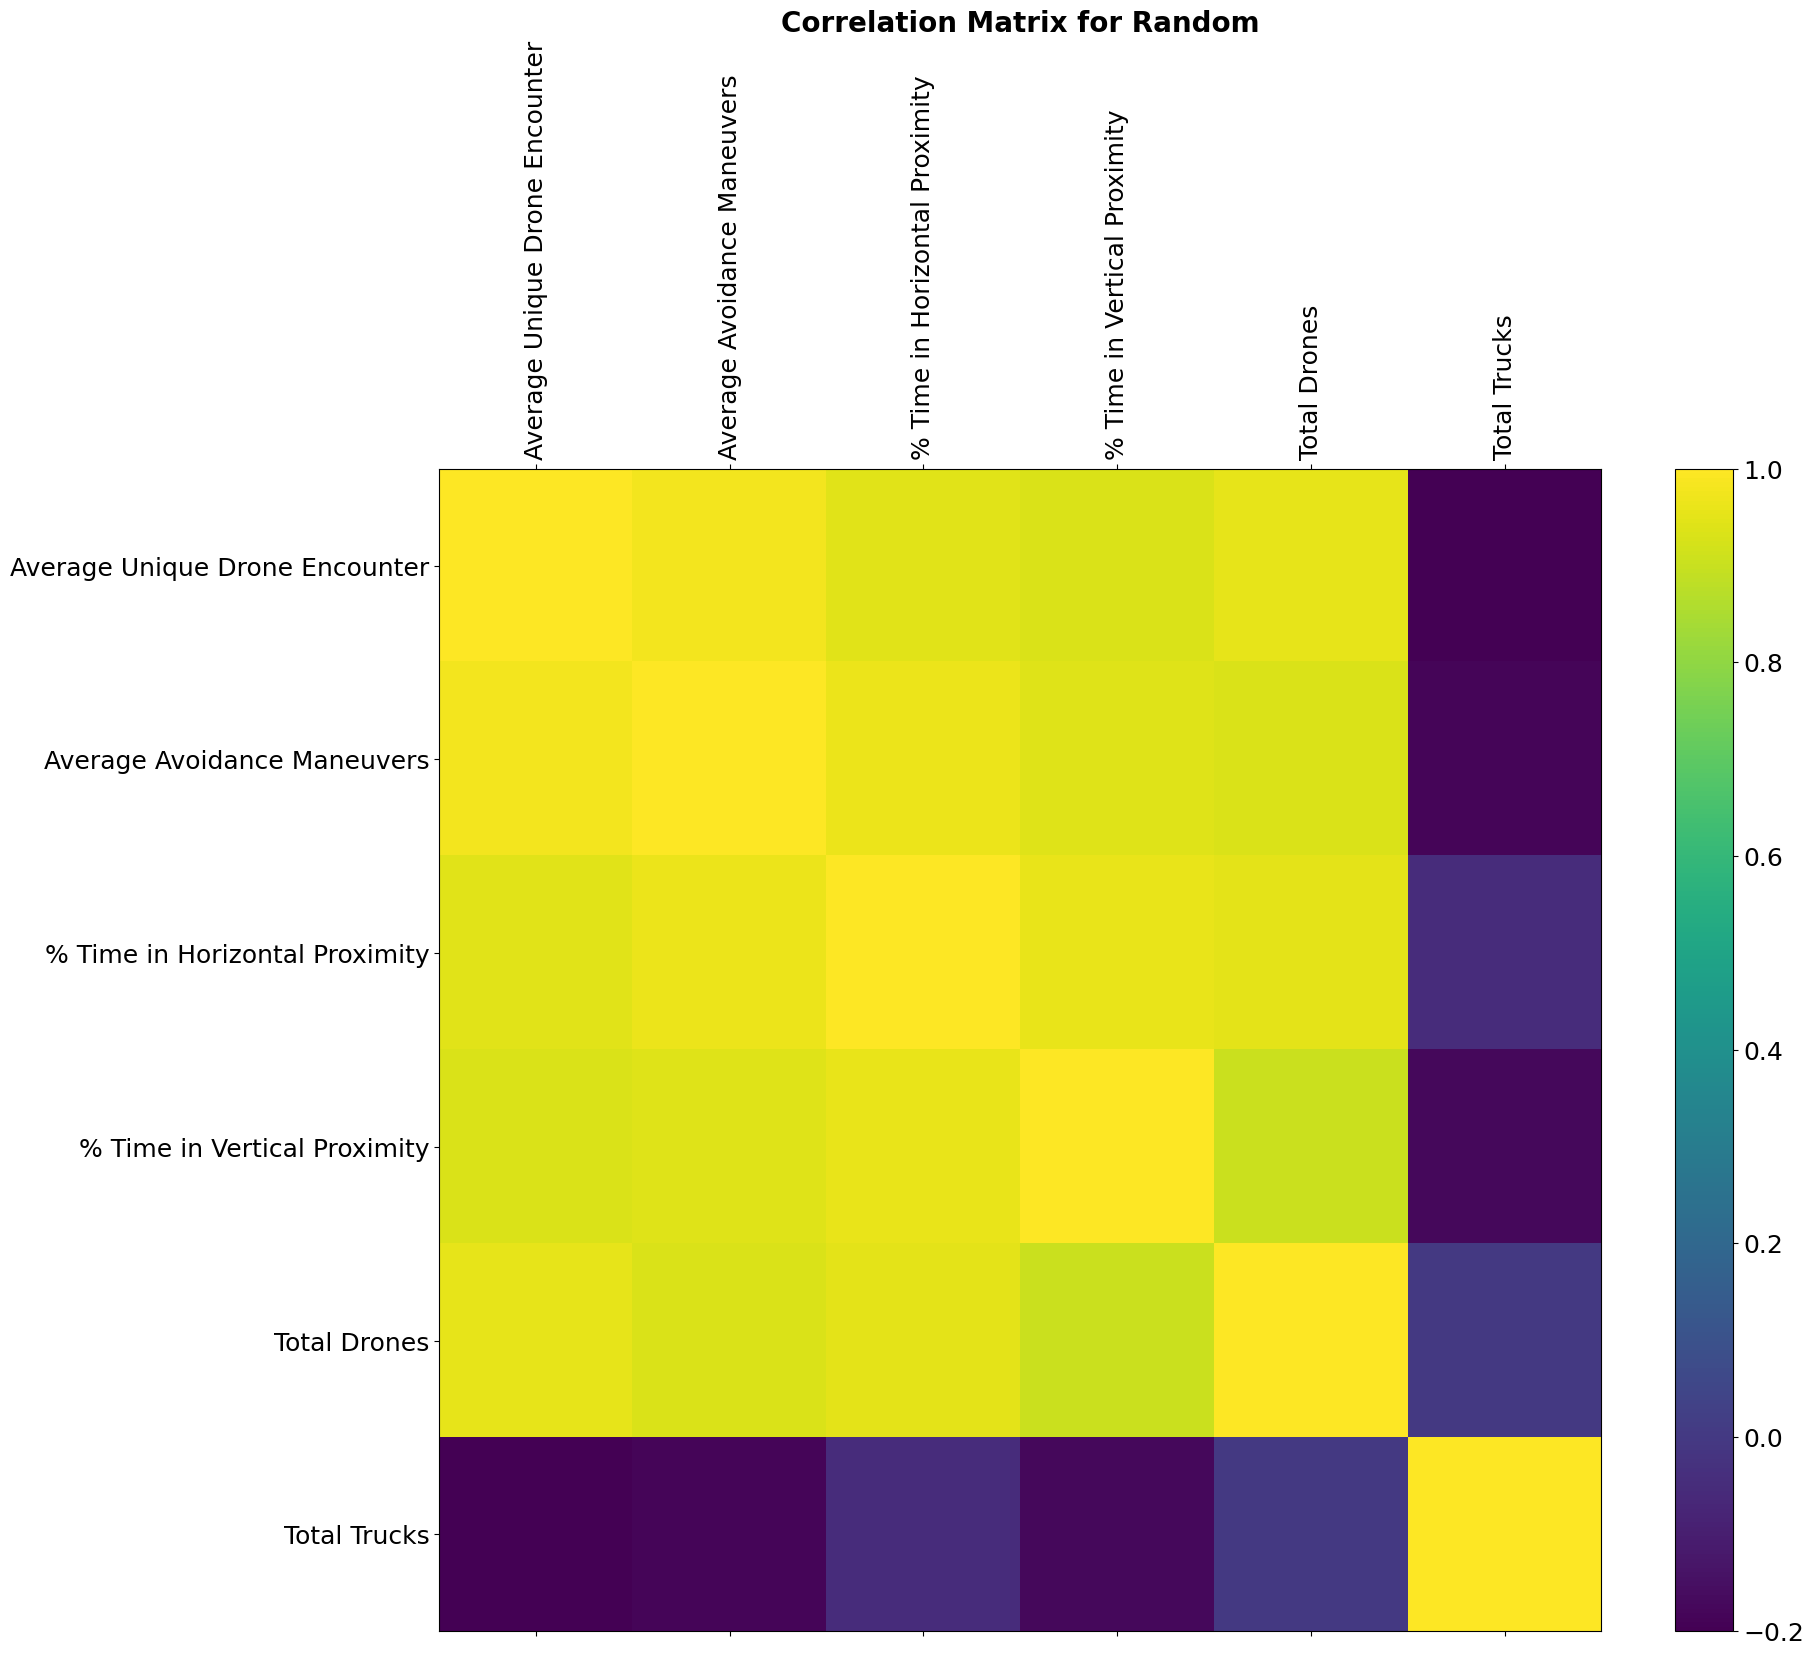

In [88]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(variables_random.corr(), fignum=f.number)
plt.xticks(range(variables_random.shape[1]), variables_random.columns, fontsize=18, rotation=90)
plt.yticks(range(variables_random.shape[1]), variables_random.columns, fontsize=18)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
plt.title('Correlation Matrix for Random', fontsize=20,fontweight="bold")

#save the plot as a PNG file
plt.savefig('Images/Random/Rcorrelation_matrix.png', bbox_inches='tight')

#show the plot
plt.show()

**6bi. Regression - Tables and Graphs (Average Unique Drone Encounter)**

In [90]:
#create average unique drone encounter regression tables
kmeans_encounter = ols('SuccessfulNoBottlenecks_AverageUniqueDroneEncounter ~ TotalDrones + TotalTrucks', 
             data = simulation_results[simulation_results['Method']=='KMeans']).fit()
random_encounter = ols('SuccessfulNoBottlenecks_AverageUniqueDroneEncounter ~ TotalDrones + TotalTrucks', 
             data = simulation_results[simulation_results['Method']=='Random']).fit()

table1=summary_col( # create a regression table 
    [kmeans_encounter,random_encounter], # pass the models to the summary_col function
    stars=True, # add stars denoting the p-values of the coefficient to the table; * p<0.05, ** p<0.01, *** p<0.001
    float_format='%0.3f', # set the decimal places to 3
    model_names=['KMeans_Encounter','Random_Encounter'], # set the name of the model
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))}) # add the number of observations to the table

print(table1)


               KMeans_Encounter Random_Encounter
------------------------------------------------
Intercept      2.432***         2.005***        
               (0.021)          (0.185)         
TotalDrones    0.004***         0.098***        
               (0.000)          (0.001)         
TotalTrucks    -0.023***        -0.206***       
               (0.001)          (0.005)         
R-squared      0.755            0.955           
R-squared Adj. 0.755            0.955           
N              1875             1875            
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


C:\Users\HP\AppData\Local\Temp\ipykernel_12648\3939986652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['FittedValues'] = kmeans_encounter.fittedvalues
C:\Users\HP\AppData\Local\Temp\ipykernel_12648\3939986652.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['Residuals'] = kmeans_encounter.resid


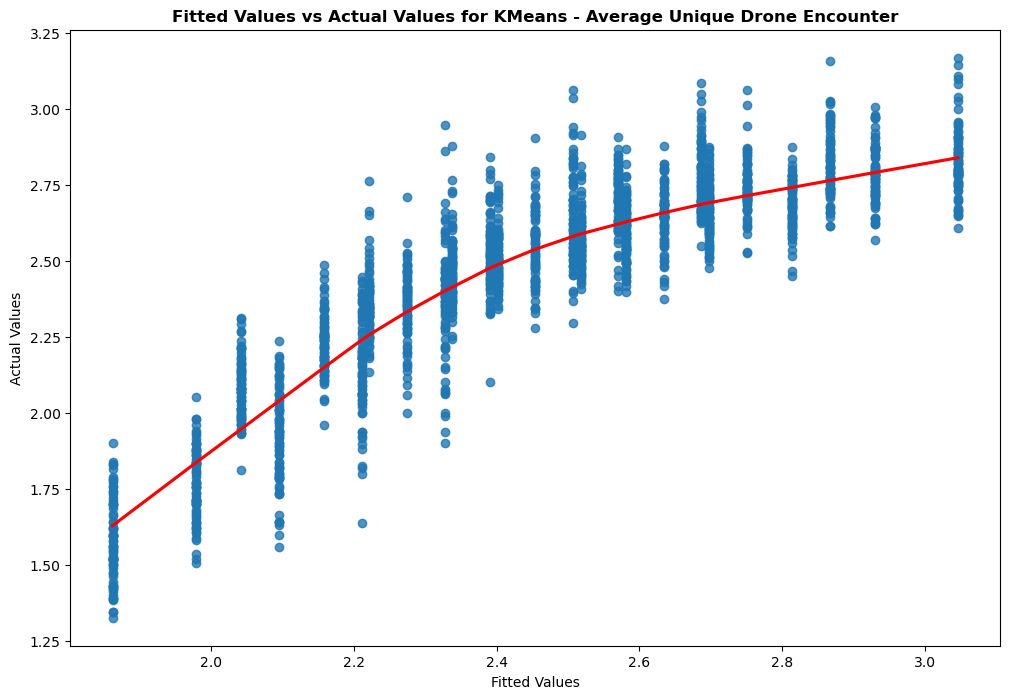

In [264]:
#generate predictions for KMeans_Encounter
filtered_df1 = simulation_results[simulation_results['Method'] == 'KMeans']
filtered_df1['FittedValues'] = kmeans_encounter.fittedvalues
filtered_df1['Residuals'] = kmeans_encounter.resid

#plot fitted values vs actual values
fig, ax = plt.subplots(figsize=(12, 8))
sn.regplot(x=filtered_df1['FittedValues'], y=filtered_df1['SuccessfulNoBottlenecks_AverageUniqueDroneEncounter'], 
           lowess=True, line_kws={'color': 'red'}, ax=ax)

#add labels and title
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.title('Fitted Values vs Actual Values for KMeans - Average Unique Drone Encounter', fontweight="bold")

#save the plot as a PNG file
plt.savefig('Images/KMeans/KRegression_Encounter.png', bbox_inches='tight')

#show the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12648\2006943460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['FittedValues'] = random_encounter.fittedvalues
C:\Users\HP\AppData\Local\Temp\ipykernel_12648\2006943460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['Residuals'] = random_encounter.resid


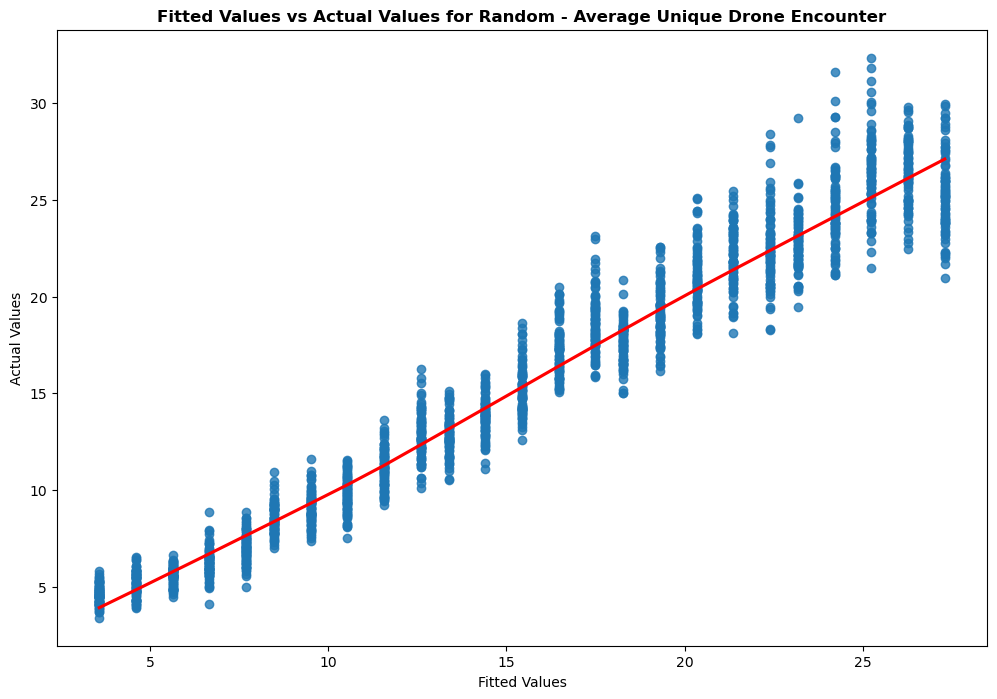

In [266]:
#generate predictions for Random_Encounter
filtered_df2 = simulation_results[simulation_results['Method'] == 'Random']
filtered_df2['FittedValues'] = random_encounter.fittedvalues
filtered_df2['Residuals'] = random_encounter.resid

#plot fitted values vs actual values
fig, ax = plt.subplots(figsize=(12, 8))
sn.regplot(x=filtered_df2['FittedValues'], y=filtered_df2['SuccessfulNoBottlenecks_AverageUniqueDroneEncounter'], 
           lowess=True, line_kws={'color': 'red'}, ax=ax)

# Add labels and title
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.title('Fitted Values vs Actual Values for Random - Average Unique Drone Encounter', fontweight="bold")

#save the plot as a PNG file
plt.savefig('Images/Random/RRegression_Encounter.png', bbox_inches='tight')

#show the plot
plt.show()

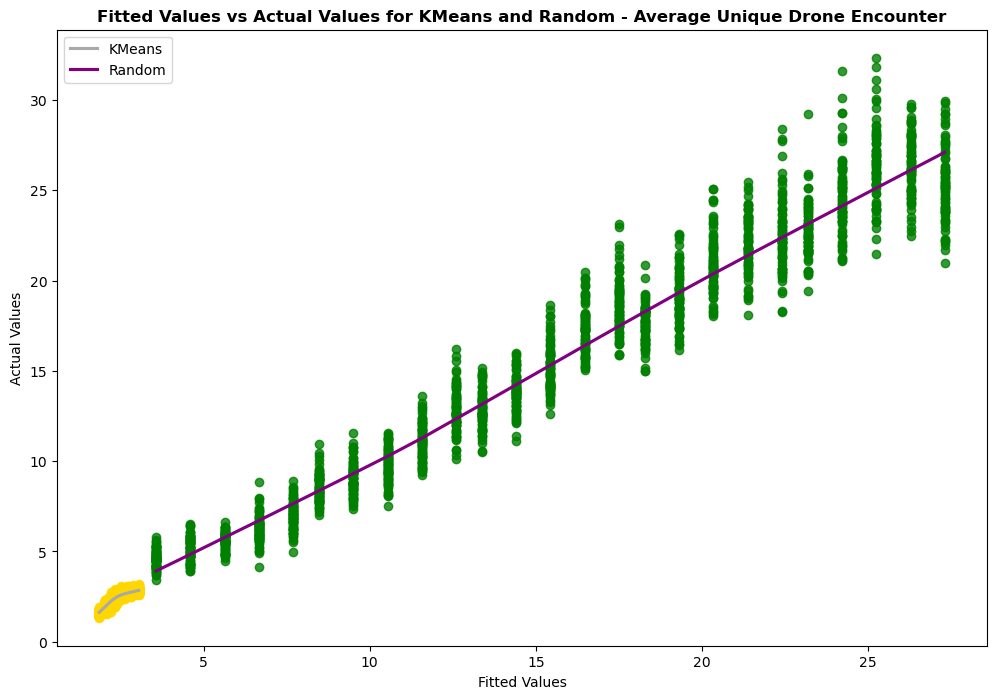

In [256]:
# Combine the data into one DataFrame
combined_df1 = pd.concat([filtered_df1, filtered_df2])

# Plot fitted values vs actual values
fig, ax = plt.subplots(figsize=(12, 8))
sn.regplot(data=combined_df1[combined_df1['Method'] == 'KMeans'], 
           x='FittedValues', 
           y='SuccessfulNoBottlenecks_AverageUniqueDroneEncounter', 
           lowess=True, 
           line_kws={'color': 'darkgrey', 'label': 'KMeans'},
           scatter_kws={'color': 'gold'}, 
           ax=ax)
sn.regplot(data=combined_df1[combined_df1['Method'] == 'Random'], 
           x='FittedValues', 
           y='SuccessfulNoBottlenecks_AverageUniqueDroneEncounter', 
           lowess=True, 
           line_kws={'color': 'purple', 'label': 'Random'}, 
           scatter_kws={'color': 'green'},
           ax=ax)

# Add labels, title, and legend
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.title('Fitted Values vs Actual Values for KMeans and Random - Average Unique Drone Encounter', fontweight="bold")
plt.legend()

# Save the plot as a PNG file
plt.savefig('Images/Others/CombinedRegression_Encounter.png', bbox_inches='tight')

# Show the plot
plt.show()

**6bii. Regression - Tables and Graphs (Average Avoidance Maneuvers)**

In [95]:
#create average avoidance maneuvers regression tables
kmeans_avoidance = ols('SuccessfulNoBottlenecks_AverageAvoidanceManeuvers ~ TotalDrones + TotalTrucks', 
             data = simulation_results[simulation_results['Method']=='KMeans']).fit()
random_avoidance = ols('SuccessfulNoBottlenecks_AverageAvoidanceManeuvers ~ TotalDrones + TotalTrucks', 
             data = simulation_results[simulation_results['Method']=='Random']).fit()

table2=summary_col( # create a regression table 
    [kmeans_avoidance,random_avoidance], # pass the models to the summary_col function
    stars=True, # add stars denoting the p-values of the coefficient to the table; * p<0.05, ** p<0.01, *** p<0.001
    float_format='%0.3f', # set the decimal places to 3
    model_names=['KMeans_Avoidance','Random_Avoidance'], # set the name of the model
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))}) # add the number of observations to the table

print(table2)


               KMeans_Avoidance Random_Avoidance
------------------------------------------------
Intercept      181.543***       205.471***      
               (2.686)          (18.437)        
TotalDrones    0.257***         6.465***        
               (0.007)          (0.050)         
TotalTrucks    -1.988***        -12.783***      
               (0.073)          (0.502)         
R-squared      0.513            0.902           
R-squared Adj. 0.512            0.902           
N              1875             1875            
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


C:\Users\HP\AppData\Local\Temp\ipykernel_12648\3234053398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3['FittedValues'] = kmeans_avoidance.fittedvalues
C:\Users\HP\AppData\Local\Temp\ipykernel_12648\3234053398.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3['Residuals'] = kmeans_avoidance.resid


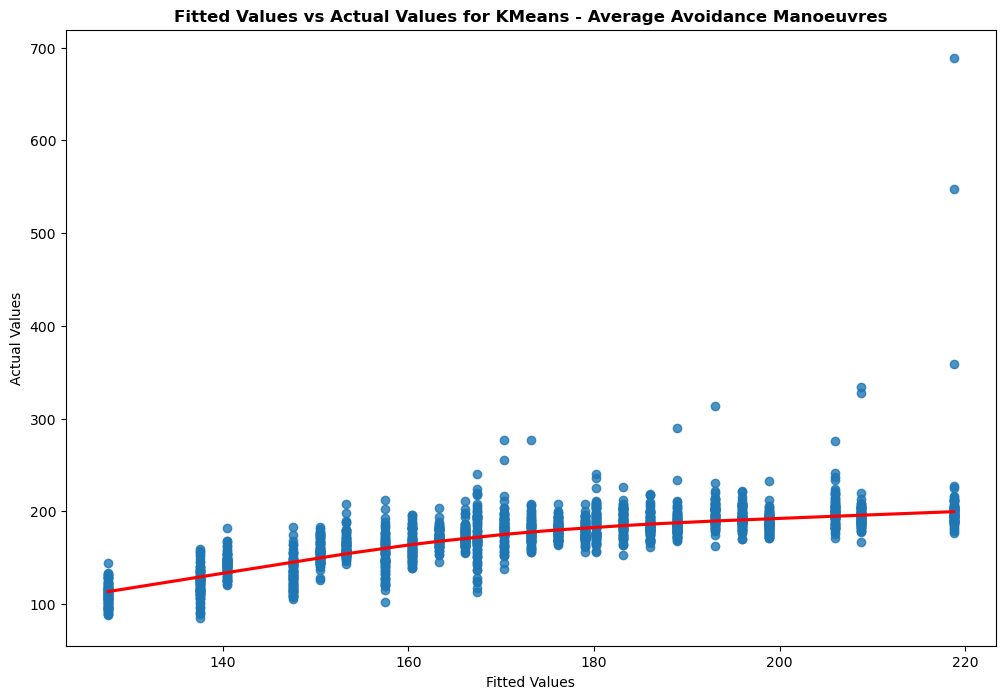

In [286]:
#generate predictions for KMeans_Avoidance
filtered_df3 = simulation_results[simulation_results['Method'] == 'KMeans']
filtered_df3['FittedValues'] = kmeans_avoidance.fittedvalues
filtered_df3['Residuals'] = kmeans_avoidance.resid

#plot fitted values vs actual values
fig, ax = plt.subplots(figsize=(12, 8))
sn.regplot(x=filtered_df3['FittedValues'], y=filtered_df3['SuccessfulNoBottlenecks_AverageAvoidanceManeuvers'], 
           lowess=True, line_kws={'color': 'red'}, ax=ax)

#add labels and title
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.title('Fitted Values vs Actual Values for KMeans - Average Avoidance Manoeuvres', fontweight="bold")

#save the plot as a PNG file
plt.savefig('Images/KMeans/KRegression_Avoidance.png', bbox_inches='tight')

#show the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12648\1902740750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df4['FittedValues'] = random_avoidance.fittedvalues
C:\Users\HP\AppData\Local\Temp\ipykernel_12648\1902740750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df4['Residuals'] = random_avoidance.resid


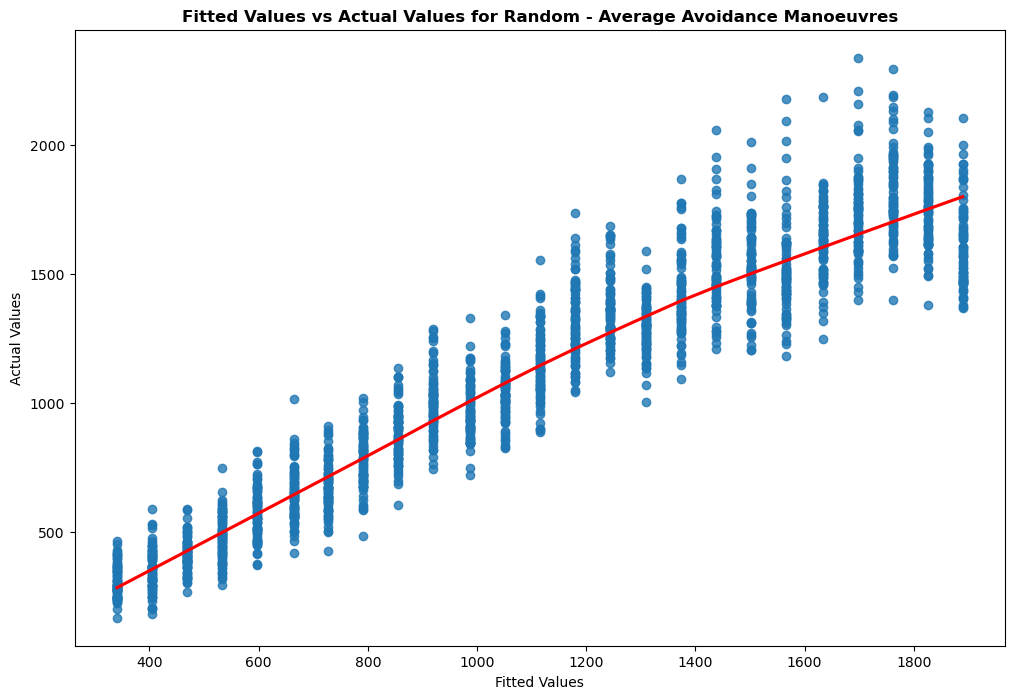

In [284]:
#generate predictions for Random_Avoidance
filtered_df4 = simulation_results[simulation_results['Method'] == 'Random']
filtered_df4['FittedValues'] = random_avoidance.fittedvalues
filtered_df4['Residuals'] = random_avoidance.resid

#plot fitted values vs actual values
fig, ax = plt.subplots(figsize=(12, 8))
sn.regplot(x=filtered_df4['FittedValues'], y=filtered_df4['SuccessfulNoBottlenecks_AverageAvoidanceManeuvers'], 
           lowess=True, line_kws={'color': 'red'}, ax=ax)

#add labels and title
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.title('Fitted Values vs Actual Values for Random - Average Avoidance Manoeuvres', fontweight="bold")

#save the plot as a PNG file
plt.savefig('Images/Random/RRegression_Avoidance.png', bbox_inches='tight')

#show the plot
plt.show()

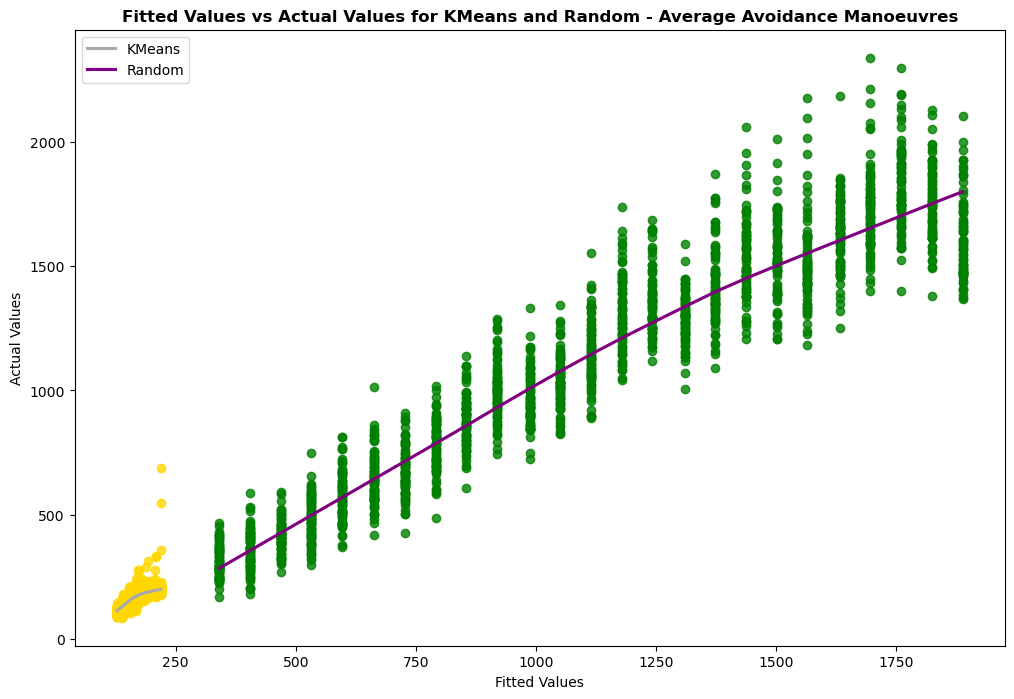

In [282]:
# Combine the data into one DataFrame
combined_df2 = pd.concat([filtered_df3, filtered_df4])

# Plot fitted values vs actual values
fig, ax = plt.subplots(figsize=(12, 8))
sn.regplot(data=combined_df2[combined_df2['Method'] == 'KMeans'], 
           x='FittedValues', 
           y='SuccessfulNoBottlenecks_AverageAvoidanceManeuvers', 
           lowess=True, 
           line_kws={'color': 'darkgrey', 'label': 'KMeans'},
           scatter_kws={'color': 'gold'}, 
           ax=ax)
sn.regplot(data=combined_df2[combined_df2['Method'] == 'Random'], 
           x='FittedValues', 
           y='SuccessfulNoBottlenecks_AverageAvoidanceManeuvers', 
           lowess=True, 
           line_kws={'color': 'purple', 'label': 'Random'},
           scatter_kws={'color': 'green'},
           ax=ax)

# Add labels, title, and legend
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.title('Fitted Values vs Actual Values for KMeans and Random - Average Avoidance Manoeuvres', fontweight="bold")
plt.legend()

# Save the plot as a PNG file
plt.savefig('Images/Others/CombinedRegression_Avoidance.png', bbox_inches='tight')

# Show the plot
plt.show()

**6biii. Regression - Tables and Graphs (Percentage Time Horizontal Proximity)**

In [100]:
#create percentage time horizontal proximity regression table
kmeans_horizontal = ols('SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity ~ TotalDrones + TotalTrucks', 
             data = simulation_results[simulation_results['Method']=='KMeans']).fit()
random_horizontal = ols('SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity ~ TotalDrones + TotalTrucks', 
             data = simulation_results[simulation_results['Method']=='Random']).fit()

table3=summary_col( # create a regression table 
    [kmeans_horizontal,random_horizontal], # pass the models to the summary_col function
    stars=True, # add stars denoting the p-values of the coefficient to the table; * p<0.05, ** p<0.01, *** p<0.001
    float_format='%0.3f', # set the decimal places to 3
    model_names=['KMeans_Horizontal','Random_Horizontal'], # set the name of the model
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))}) # add the number of observations to the table

print(table3)


               KMeans_Horizontal Random_Horizontal
--------------------------------------------------
Intercept      6.118***          8.711***         
               (0.066)           (0.329)          
TotalDrones    0.015***          0.119***         
               (0.000)           (0.001)          
TotalTrucks    -0.063***         -0.062***        
               (0.002)           (0.009)          
R-squared      0.809             0.904            
R-squared Adj. 0.809             0.904            
N              1875              1875             
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


C:\Users\HP\AppData\Local\Temp\ipykernel_12648\2377660473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df5['FittedValues'] = kmeans_horizontal.fittedvalues
C:\Users\HP\AppData\Local\Temp\ipykernel_12648\2377660473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df5['Residuals'] = kmeans_horizontal.resid


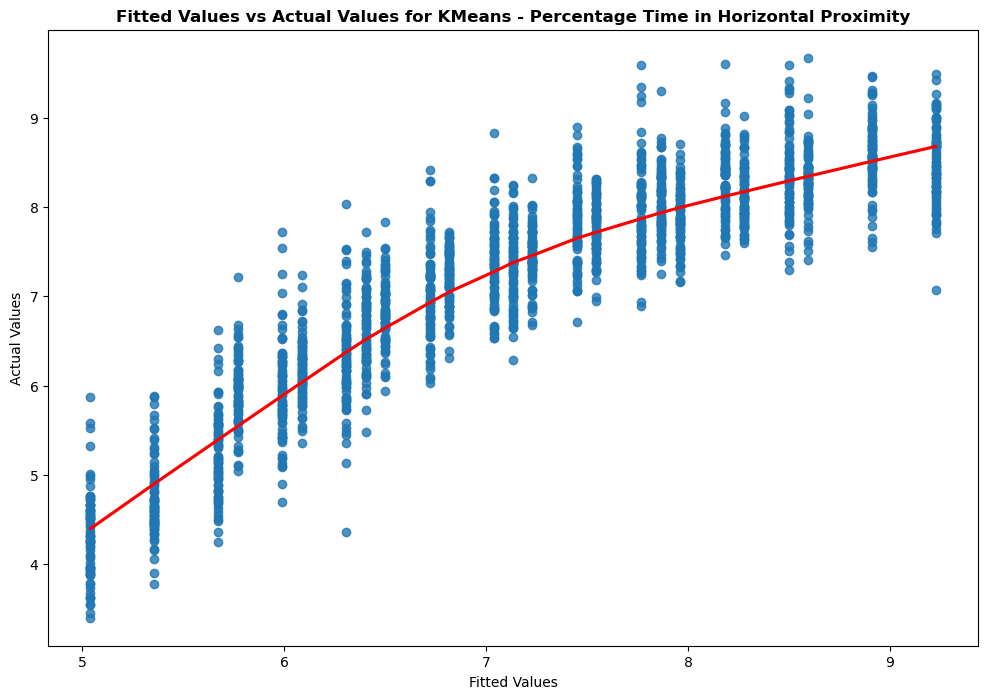

In [288]:
#generate predictions for KMeans_Horizontal
filtered_df5 = simulation_results[simulation_results['Method'] == 'KMeans']
filtered_df5['FittedValues'] = kmeans_horizontal.fittedvalues
filtered_df5['Residuals'] = kmeans_horizontal.resid

#plot fitted values vs actual values
fig, ax = plt.subplots(figsize=(12, 8))
sn.regplot(x=filtered_df5['FittedValues'], y=filtered_df5['SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity'], 
           lowess=True, line_kws={'color': 'red'}, ax=ax)

#add labels and title
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.title('Fitted Values vs Actual Values for KMeans - Percentage Time in Horizontal Proximity', fontweight="bold")

#save the plot as a PNG file
plt.savefig('Images/KMeans/KRegression_Horizontal.png', bbox_inches='tight')

#show the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12648\3965104266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df6['FittedValues'] = random_horizontal.fittedvalues
C:\Users\HP\AppData\Local\Temp\ipykernel_12648\3965104266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df6['Residuals'] = random_horizontal.resid


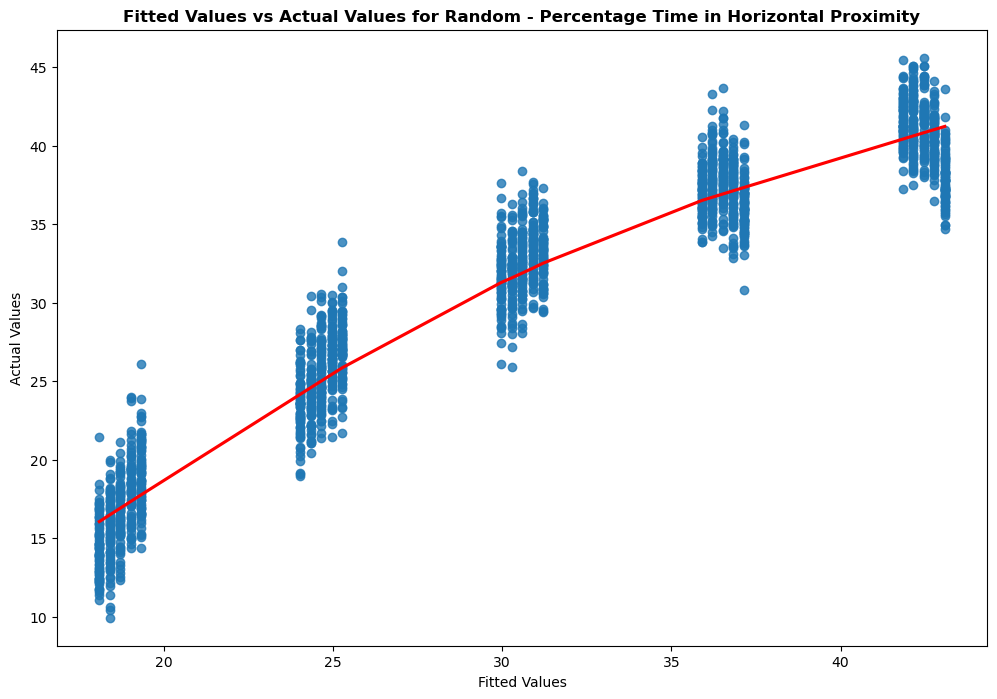

In [292]:
#generate predictions for Random_Horizontal
filtered_df6 = simulation_results[simulation_results['Method'] == 'Random']
filtered_df6['FittedValues'] = random_horizontal.fittedvalues
filtered_df6['Residuals'] = random_horizontal.resid

#plot fitted values vs actual values
fig, ax = plt.subplots(figsize=(12, 8))
sn.regplot(x=filtered_df6['FittedValues'], y=filtered_df6['SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity'], 
           lowess=True, line_kws={'color': 'red'}, ax=ax)

#add labels and title
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.title('Fitted Values vs Actual Values for Random - Percentage Time in Horizontal Proximity', fontweight="bold")

#save the plot as a PNG file
plt.savefig('Images/Random/RRegression_Horizontal.png', bbox_inches='tight')

#show the plot
plt.show()

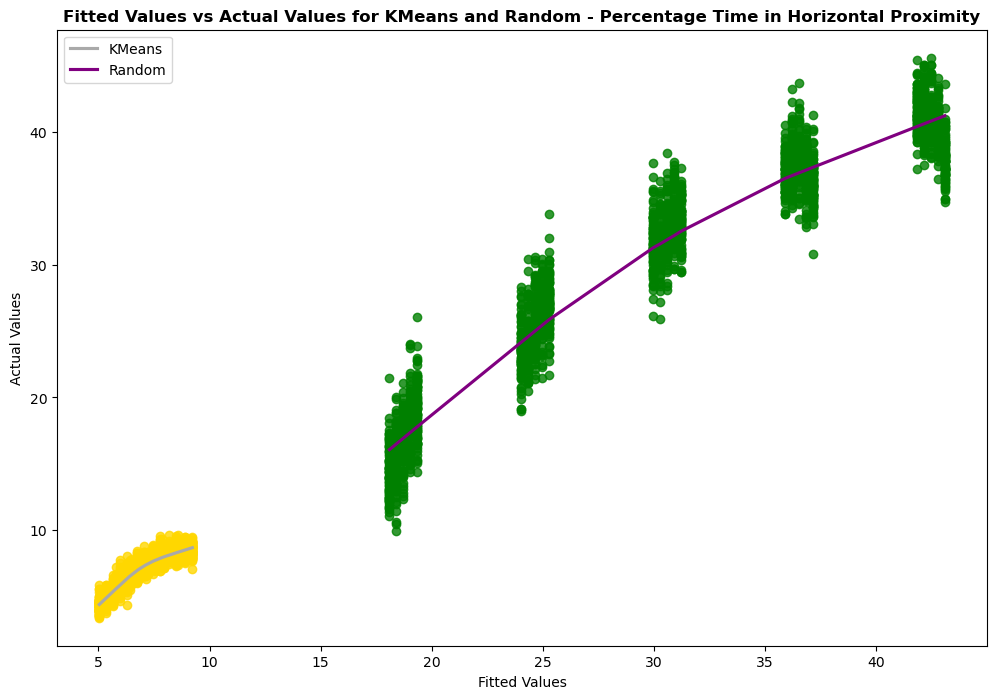

In [294]:
# Combine the data into one DataFrame
combined_df3 = pd.concat([filtered_df5, filtered_df6])

# Plot fitted values vs actual values
fig, ax = plt.subplots(figsize=(12, 8))
sn.regplot(data=combined_df3[combined_df3['Method'] == 'KMeans'], 
           x='FittedValues', 
           y='SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity', 
           lowess=True, 
           line_kws={'color': 'darkgrey', 'label': 'KMeans'},
           scatter_kws={'color': 'gold'}, 
           ax=ax)
sn.regplot(data=combined_df3[combined_df3['Method'] == 'Random'], 
           x='FittedValues', 
           y='SuccessfulNoBottlenecks_PercentageTimeHorizontalProximity', 
           lowess=True, 
           line_kws={'color': 'purple', 'label': 'Random'},
           scatter_kws={'color': 'green'},
           ax=ax)

# Add labels, title, and legend
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.title('Fitted Values vs Actual Values for KMeans and Random - Percentage Time in Horizontal Proximity', fontweight="bold")
plt.legend()

# Save the plot as a PNG file
plt.savefig('Images/Others/CombinedRegression_Horizontal.png', bbox_inches='tight')

# Show the plot
plt.show()

**6biv. Regression - Tables and Graphs (Percentage Time Vertical Proximity)**

In [105]:
#create percentage time vertical proximity regression table
kmeans_vertical = ols('SuccessfulNoBottlenecks_PercentageTimeVerticalProximity ~ TotalDrones + TotalTrucks', 
             data = simulation_results[simulation_results['Method']=='KMeans']).fit()
random_vertical = ols('SuccessfulNoBottlenecks_PercentageTimeVerticalProximity ~ TotalDrones + TotalTrucks', 
             data = simulation_results[simulation_results['Method']=='Random']).fit()

table4=summary_col( # create a regression table 
    [kmeans_vertical,random_vertical], # pass the models to the summary_col function
    stars=True, # add stars denoting the p-values of the coefficient to the table; * p<0.05, ** p<0.01, *** p<0.001
    float_format='%0.3f', # set the decimal places to 3
    model_names=['KMeans_Vertical','Random_Vertical'], # set the name of the model
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))}) # add the number of observations to the table

print(table4)


               KMeans_Vertical Random_Vertical
----------------------------------------------
Intercept      30.723***       29.163***      
               (0.304)         (0.575)        
TotalDrones    0.042***        0.159***       
               (0.001)         (0.002)        
TotalTrucks    -0.039***       -0.309***      
               (0.008)         (0.016)        
R-squared      0.584           0.852          
R-squared Adj. 0.584           0.851          
N              1875            1875           
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


C:\Users\HP\AppData\Local\Temp\ipykernel_12648\771236953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df7['FittedValues'] = kmeans_vertical.fittedvalues
C:\Users\HP\AppData\Local\Temp\ipykernel_12648\771236953.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df7['Residuals'] = kmeans_vertical.resid


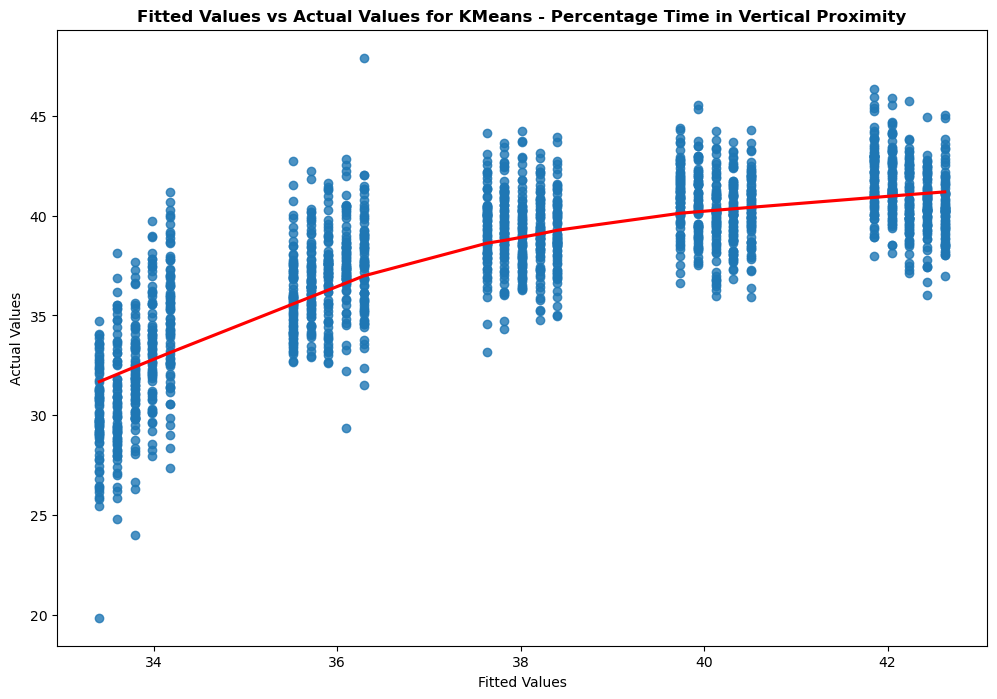

In [296]:
#generate predictions for KMeans_Vertical
filtered_df7 = simulation_results[simulation_results['Method'] == 'KMeans']
filtered_df7['FittedValues'] = kmeans_vertical.fittedvalues
filtered_df7['Residuals'] = kmeans_vertical.resid

#plot fitted values vs actual values
fig, ax = plt.subplots(figsize=(12, 8))
sn.regplot(x=filtered_df7['FittedValues'], y=filtered_df7['SuccessfulNoBottlenecks_PercentageTimeVerticalProximity'], 
           lowess=True, line_kws={'color': 'red'}, ax=ax)

#add labels and title
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.title('Fitted Values vs Actual Values for KMeans - Percentage Time in Vertical Proximity', fontweight="bold")

#save the plot as a PNG file
plt.savefig('Images/KMeans/KRegression_Vertical.png', bbox_inches='tight')

#show the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12648\2274613905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df8['FittedValues'] = random_vertical.fittedvalues
C:\Users\HP\AppData\Local\Temp\ipykernel_12648\2274613905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df8['Residuals'] = random_vertical.resid


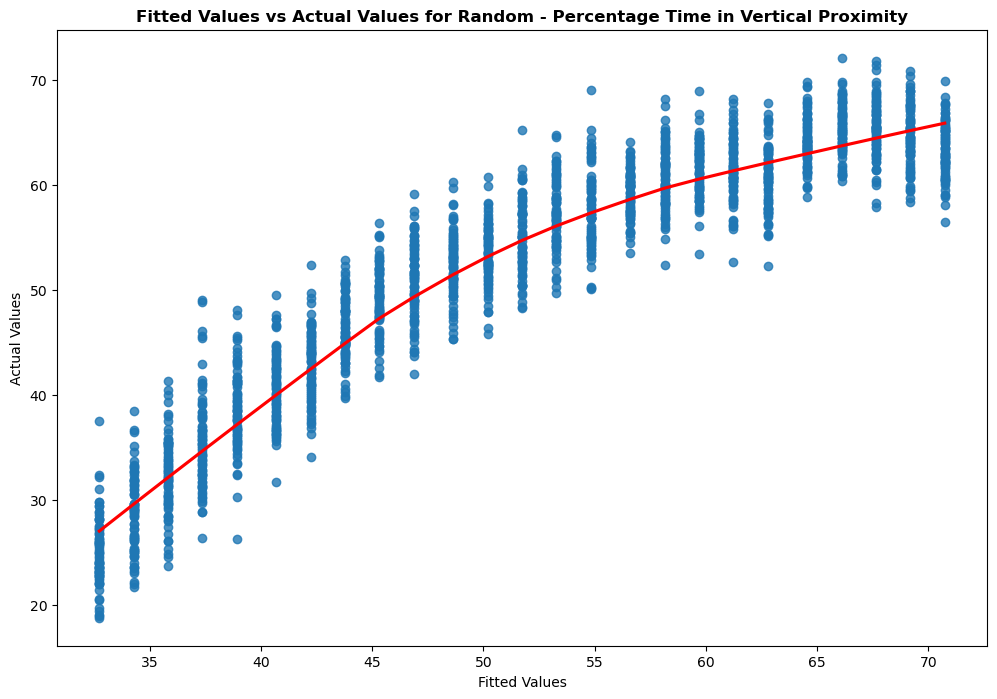

In [298]:
#generate predictions for Random_Horizontal
filtered_df8 = simulation_results[simulation_results['Method'] == 'Random']
filtered_df8['FittedValues'] = random_vertical.fittedvalues
filtered_df8['Residuals'] = random_vertical.resid

#plot fitted values vs actual values
fig, ax = plt.subplots(figsize=(12, 8))
sn.regplot(x=filtered_df8['FittedValues'], y=filtered_df8['SuccessfulNoBottlenecks_PercentageTimeVerticalProximity'], 
           lowess=True, line_kws={'color': 'red'}, ax=ax)

#add labels and title
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.title('Fitted Values vs Actual Values for Random - Percentage Time in Vertical Proximity', fontweight="bold")

#save the plot as a PNG file
plt.savefig('Images/Random/RRegression_Vertical.png', bbox_inches='tight')

#show the plot
plt.show()

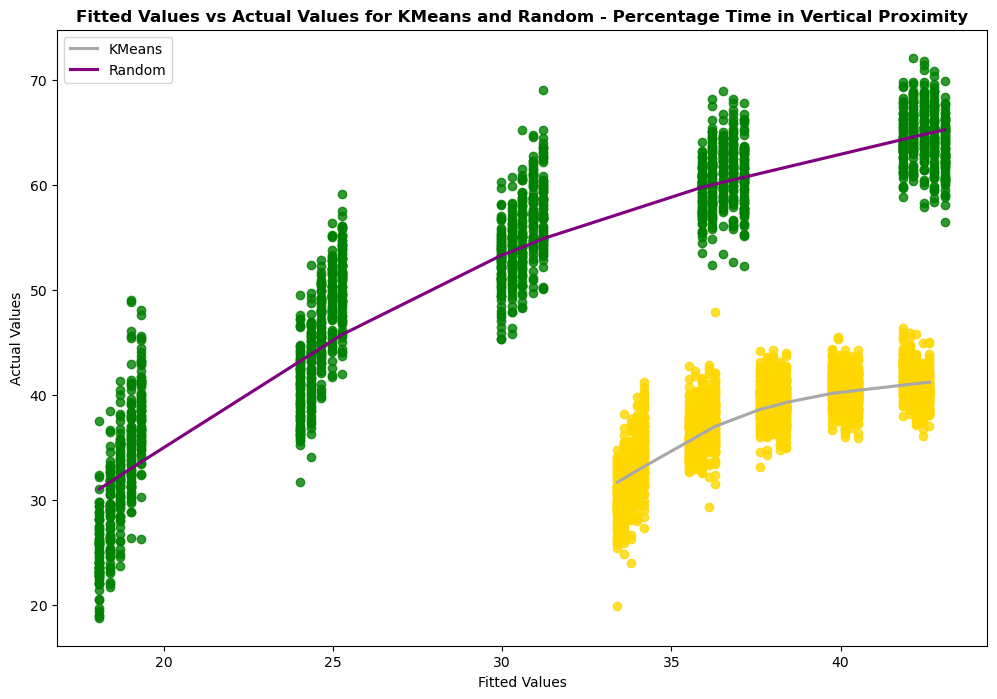

In [300]:
# Combine the data into one DataFrame
combined_df4 = pd.concat([filtered_df7, filtered_df8])

# Plot fitted values vs actual values
fig, ax = plt.subplots(figsize=(12, 8))
sn.regplot(data=combined_df4[combined_df4['Method'] == 'KMeans'], 
           x='FittedValues', 
           y='SuccessfulNoBottlenecks_PercentageTimeVerticalProximity', 
           lowess=True, 
           line_kws={'color': 'darkgrey', 'label': 'KMeans'},
           scatter_kws={'color': 'gold'}, 
           ax=ax)
sn.regplot(data=combined_df3[combined_df3['Method'] == 'Random'], 
           x='FittedValues', 
           y='SuccessfulNoBottlenecks_PercentageTimeVerticalProximity', 
           lowess=True, 
           line_kws={'color': 'purple', 'label': 'Random'},
           scatter_kws={'color': 'green'},
           ax=ax)

# Add labels, title, and legend
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.title('Fitted Values vs Actual Values for KMeans and Random - Percentage Time in Vertical Proximity', fontweight="bold")
plt.legend()

# Save the plot as a PNG file
plt.savefig('Images/Others/CombinedRegression_Vertical.png', bbox_inches='tight')

# Show the plot
plt.show()